In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# test 데이터 불러오기 및 전처리

## 부산 정박 + 닻끌림 데이터(test)

In [4]:
busan_acnh_drag_test = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/data/busan_anch_drag_test.csv', index_col = 0)

In [5]:

busan_acnh_drag_test = busan_acnh_drag_test.replace('"','')

In [6]:
busan_acnh_drag_test

,busan_anch_drag_test.area,busan_anch_drag_test.time,busan_anch_drag_test.num,busan_anch_drag_test.lat,busan_anch_drag_test.lon,busan_anch_drag_test.sog,busan_anch_drag_test.cog,busan_anch_drag_test.hdg
1,"""BUSAN""","""2022-08-14 00:55:06""",1001,"""N35.052557""","""E129.040953""",0.7,67.4,208
2,"""BUSAN""","""2022-08-14 00:55:16""",1001,"""N35.052587""","""E129.041017""",1.1,61.3,208
3,"""BUSAN""","""2022-08-14 00:55:24""",1001,"""N35.052625""","""E129.041087""",1.5,57.7,207
4,"""BUSAN""","""2022-08-14 00:55:36""",1001,"""N35.052680""","""E129.041187""",1.8,56.2,208
5,"""BUSAN""","""2022-08-14 00:55:45""",1001,"""N35.052732""","""E129.041275""",2.0,55.6,209
...,...,...,...,...,...,...,...,...
153295,"""BUSAN""","""2023-03-08 11:01:43""",1116,"""N35.021717""","""E129.065633""",0.4,157.0,220
153296,"""BUSAN""","""2023-03-08 11:02:04""",1116,"""N35.021667""","""E129.065650""",0.4,153.0,219
153297,"""BUSAN""","""2023-03-08 11:02:12""",1116,"""N35.021650""","""E129.065667""",0.4,150.0,219
153298,"""BUSAN""","""2023-03-08 11:02:22""",1116,"""N35.021617""","""E129.065683""",0.4,148.0,218


## 한글명 변경

In [7]:
busan_acnh_drag_test = busan_acnh_drag_test.rename(columns={
    'busan_anch_drag_test.area': '지역',
    'busan_anch_drag_test.time': '시간',
    'busan_anch_drag_test.num': '번호',
    'busan_anch_drag_test.lat': '위도',
    'busan_anch_drag_test.lon': '경도',
    'busan_anch_drag_test.sog': '대지속도',
    'busan_anch_drag_test.cog': '실침로',
    'busan_anch_drag_test.hdg': '선수미선'
})

In [8]:
busan_acnh_drag_test

,지역,시간,번호,위도,경도,대지속도,실침로,선수미선
1,"""BUSAN""","""2022-08-14 00:55:06""",1001,"""N35.052557""","""E129.040953""",0.7,67.4,208
2,"""BUSAN""","""2022-08-14 00:55:16""",1001,"""N35.052587""","""E129.041017""",1.1,61.3,208
3,"""BUSAN""","""2022-08-14 00:55:24""",1001,"""N35.052625""","""E129.041087""",1.5,57.7,207
4,"""BUSAN""","""2022-08-14 00:55:36""",1001,"""N35.052680""","""E129.041187""",1.8,56.2,208
5,"""BUSAN""","""2022-08-14 00:55:45""",1001,"""N35.052732""","""E129.041275""",2.0,55.6,209
...,...,...,...,...,...,...,...,...
153295,"""BUSAN""","""2023-03-08 11:01:43""",1116,"""N35.021717""","""E129.065633""",0.4,157.0,220
153296,"""BUSAN""","""2023-03-08 11:02:04""",1116,"""N35.021667""","""E129.065650""",0.4,153.0,219
153297,"""BUSAN""","""2023-03-08 11:02:12""",1116,"""N35.021650""","""E129.065667""",0.4,150.0,219
153298,"""BUSAN""","""2023-03-08 11:02:22""",1116,"""N35.021617""","""E129.065683""",0.4,148.0,218


## 따옴표 제거

In [9]:
busan_acnh_drag_test['지역'] = busan_acnh_drag_test['지역'].str.strip('"')
busan_acnh_drag_test['시간'] = busan_acnh_drag_test['시간'].str.strip('"')
busan_acnh_drag_test['위도'] = busan_acnh_drag_test['위도'].str.strip('"')
busan_acnh_drag_test['경도'] = busan_acnh_drag_test['경도'].str.strip('"')

In [10]:
busan_acnh_drag_test['위도'] = busan_acnh_drag_test['위도'].str.replace('N', '')
busan_acnh_drag_test['경도'] = busan_acnh_drag_test['경도'].str.replace('E', '')

In [11]:
busan_acnh_drag_test

,지역,시간,번호,위도,경도,대지속도,실침로,선수미선
1,BUSAN,2022-08-14 00:55:06,1001,35.052557,129.040953,0.7,67.4,208
2,BUSAN,2022-08-14 00:55:16,1001,35.052587,129.041017,1.1,61.3,208
3,BUSAN,2022-08-14 00:55:24,1001,35.052625,129.041087,1.5,57.7,207
4,BUSAN,2022-08-14 00:55:36,1001,35.052680,129.041187,1.8,56.2,208
5,BUSAN,2022-08-14 00:55:45,1001,35.052732,129.041275,2.0,55.6,209
...,...,...,...,...,...,...,...,...
153295,BUSAN,2023-03-08 11:01:43,1116,35.021717,129.065633,0.4,157.0,220
153296,BUSAN,2023-03-08 11:02:04,1116,35.021667,129.065650,0.4,153.0,219
153297,BUSAN,2023-03-08 11:02:12,1116,35.021650,129.065667,0.4,150.0,219
153298,BUSAN,2023-03-08 11:02:22,1116,35.021617,129.065683,0.4,148.0,218


In [12]:
busan_acnh_drag_test['지역'] = busan_acnh_drag_test['지역'].str.replace('BUSAN', '부산')

In [13]:
busan_acnh_drag_test

,지역,시간,번호,위도,경도,대지속도,실침로,선수미선
1,부산,2022-08-14 00:55:06,1001,35.052557,129.040953,0.7,67.4,208
2,부산,2022-08-14 00:55:16,1001,35.052587,129.041017,1.1,61.3,208
3,부산,2022-08-14 00:55:24,1001,35.052625,129.041087,1.5,57.7,207
4,부산,2022-08-14 00:55:36,1001,35.052680,129.041187,1.8,56.2,208
5,부산,2022-08-14 00:55:45,1001,35.052732,129.041275,2.0,55.6,209
...,...,...,...,...,...,...,...,...
153295,부산,2023-03-08 11:01:43,1116,35.021717,129.065633,0.4,157.0,220
153296,부산,2023-03-08 11:02:04,1116,35.021667,129.065650,0.4,153.0,219
153297,부산,2023-03-08 11:02:12,1116,35.021650,129.065667,0.4,150.0,219
153298,부산,2023-03-08 11:02:22,1116,35.021617,129.065683,0.4,148.0,218




```
# 코드로 형식 지정됨
```

## 울산 정박 + 닻끌림 데이터(test)

In [14]:

ulsan_anch_drag_test = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/data/ulsan_anch_drag_test.csv', index_col = 0)

In [15]:
ulsan_anch_drag_test

,ulsan_anch_drag_test.area,ulsan_anch_drag_test.time,ulsan_anch_drag_test.num,ulsan_anch_drag_test.lat,ulsan_anch_drag_test.lon,ulsan_anch_drag_test.sog,ulsan_anch_drag_test.cog,ulsan_anch_drag_test.hdg
1,"""ULSAN""","""2022-08-24 14:41:34""",1001,"""N35.442767""","""E129.415550""",0.6,231.0,116
2,"""ULSAN""","""2022-08-24 14:41:44""",1001,"""N35.442767""","""E129.415500""",0.8,240.0,115
3,"""ULSAN""","""2022-08-24 14:41:53""",1001,"""N35.442750""","""E129.415467""",0.7,258.0,116
4,"""ULSAN""","""2022-08-24 14:42:04""",1001,"""N35.442750""","""E129.415417""",0.8,254.0,116
5,"""ULSAN""","""2022-08-24 14:42:14""",1001,"""N35.442733""","""E129.415367""",1.0,253.0,117
...,...,...,...,...,...,...,...,...
186509,"""ULSAN""","""2023-01-17 19:44:27""",1117,"""N35.456302""","""E129.424155""",0.1,325.8,312
186510,"""ULSAN""","""2023-01-17 19:50:27""",1117,"""N35.456108""","""E129.424060""",0.3,71.3,338
186511,"""ULSAN""","""2023-01-17 19:56:27""",1117,"""N35.456153""","""E129.424177""",0.1,195.9,325
186512,"""ULSAN""","""2023-01-17 19:59:24""",1117,"""N35.456200""","""E129.424007""",0.1,274.4,324


## 한글명 변경

In [16]:
ulsan_anch_drag_test = ulsan_anch_drag_test.rename(columns={
    'ulsan_anch_drag_test.area': '지역',
    'ulsan_anch_drag_test.time': '시간',
    'ulsan_anch_drag_test.num': '번호',
    'ulsan_anch_drag_test.lat': '위도',
    'ulsan_anch_drag_test.lon': '경도',
    'ulsan_anch_drag_test.sog': '대지속도',
    'ulsan_anch_drag_test.cog': '실침로',
    'ulsan_anch_drag_test.hdg': '선수미선'
})

In [17]:
ulsan_anch_drag_test

,지역,시간,번호,위도,경도,대지속도,실침로,선수미선
1,"""ULSAN""","""2022-08-24 14:41:34""",1001,"""N35.442767""","""E129.415550""",0.6,231.0,116
2,"""ULSAN""","""2022-08-24 14:41:44""",1001,"""N35.442767""","""E129.415500""",0.8,240.0,115
3,"""ULSAN""","""2022-08-24 14:41:53""",1001,"""N35.442750""","""E129.415467""",0.7,258.0,116
4,"""ULSAN""","""2022-08-24 14:42:04""",1001,"""N35.442750""","""E129.415417""",0.8,254.0,116
5,"""ULSAN""","""2022-08-24 14:42:14""",1001,"""N35.442733""","""E129.415367""",1.0,253.0,117
...,...,...,...,...,...,...,...,...
186509,"""ULSAN""","""2023-01-17 19:44:27""",1117,"""N35.456302""","""E129.424155""",0.1,325.8,312
186510,"""ULSAN""","""2023-01-17 19:50:27""",1117,"""N35.456108""","""E129.424060""",0.3,71.3,338
186511,"""ULSAN""","""2023-01-17 19:56:27""",1117,"""N35.456153""","""E129.424177""",0.1,195.9,325
186512,"""ULSAN""","""2023-01-17 19:59:24""",1117,"""N35.456200""","""E129.424007""",0.1,274.4,324


## 따옴표제거

In [18]:
ulsan_anch_drag_test['지역'] = ulsan_anch_drag_test['지역'].str.strip('"')
ulsan_anch_drag_test['시간'] = ulsan_anch_drag_test['시간'].str.strip('"')
ulsan_anch_drag_test['위도'] = ulsan_anch_drag_test['위도'].str.strip('"')
ulsan_anch_drag_test['경도'] = ulsan_anch_drag_test['경도'].str.strip('"')

In [19]:
ulsan_anch_drag_test['위도'] = ulsan_anch_drag_test['위도'].str.replace('N', '')
ulsan_anch_drag_test['경도'] = ulsan_anch_drag_test['경도'].str.replace('E', '')

In [20]:
ulsan_anch_drag_test

,지역,시간,번호,위도,경도,대지속도,실침로,선수미선
1,ULSAN,2022-08-24 14:41:34,1001,35.442767,129.415550,0.6,231.0,116
2,ULSAN,2022-08-24 14:41:44,1001,35.442767,129.415500,0.8,240.0,115
3,ULSAN,2022-08-24 14:41:53,1001,35.442750,129.415467,0.7,258.0,116
4,ULSAN,2022-08-24 14:42:04,1001,35.442750,129.415417,0.8,254.0,116
5,ULSAN,2022-08-24 14:42:14,1001,35.442733,129.415367,1.0,253.0,117
...,...,...,...,...,...,...,...,...
186509,ULSAN,2023-01-17 19:44:27,1117,35.456302,129.424155,0.1,325.8,312
186510,ULSAN,2023-01-17 19:50:27,1117,35.456108,129.424060,0.3,71.3,338
186511,ULSAN,2023-01-17 19:56:27,1117,35.456153,129.424177,0.1,195.9,325
186512,ULSAN,2023-01-17 19:59:24,1117,35.456200,129.424007,0.1,274.4,324


In [21]:
ulsan_anch_drag_test['지역'] = ulsan_anch_drag_test['지역'].str.replace('ULSAN', '울산')

In [22]:
ulsan_anch_drag_test

,지역,시간,번호,위도,경도,대지속도,실침로,선수미선
1,울산,2022-08-24 14:41:34,1001,35.442767,129.415550,0.6,231.0,116
2,울산,2022-08-24 14:41:44,1001,35.442767,129.415500,0.8,240.0,115
3,울산,2022-08-24 14:41:53,1001,35.442750,129.415467,0.7,258.0,116
4,울산,2022-08-24 14:42:04,1001,35.442750,129.415417,0.8,254.0,116
5,울산,2022-08-24 14:42:14,1001,35.442733,129.415367,1.0,253.0,117
...,...,...,...,...,...,...,...,...
186509,울산,2023-01-17 19:44:27,1117,35.456302,129.424155,0.1,325.8,312
186510,울산,2023-01-17 19:50:27,1117,35.456108,129.424060,0.3,71.3,338
186511,울산,2023-01-17 19:56:27,1117,35.456153,129.424177,0.1,195.9,325
186512,울산,2023-01-17 19:59:24,1117,35.456200,129.424007,0.1,274.4,324


# train 데이터 불러오기 및 전처리

## 부산 정박 데이터(train)

In [23]:
busan_anch_train = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/data/busan_anch_train_final.csv', index_col = 0)

In [24]:
busan_anch_train

,busan_anch_train_final.num,busan_anch_train_final.time,busan_anch_train_final.latitude,busan_anch_train_final.longitude,busan_anch_train_final.sog,busan_anch_train_final.cog,busan_anch_train_final.hdg
1,1,"""2021-01-08 0:39""","""N35.063823""","""E129.053027""",0.1,-99.9,"""344"""
2,1,"""2021-01-08 0:39""","""N35.063828""","""E129.053030""",0.2,-99.9,"""342"""
3,1,"""2021-01-08 0:39""","""N35.063833""","""E129.053032""",0.2,-99.9,"""339"""
4,1,"""2021-01-08 0:39""","""N35.063847""","""E129.053033""",0.1,-99.9,"""337"""
5,1,"""2021-01-08 0:39""","""N35.063862""","""E129.053032""",0.2,-99.9,"""336"""
...,...,...,...,...,...,...,...
67743,160,"""2022-04-10 17:36:26""","""N35.048752""","""E129.042125""",0.1,125.3,"""222"""
67744,160,"""2022-04-10 17:39:26""","""N35.048738""","""E129.042160""",0.1,149.6,"""223"""
67745,160,"""2022-04-10 17:45:26""","""N35.048702""","""E129.042170""",0.1,152.4,"""223"""
67746,160,"""2022-04-10 17:48:26""","""N35.048752""","""E129.042160""",0.1,172.6,"""223"""


### 한글명 변경

In [25]:
busan_anch_train = busan_anch_train.rename(columns={
    'busan_anch_train_final.num': '번호',
    'busan_anch_train_final.time': '시간',
    'busan_anch_train_final.latitude': '위도',
    'busan_anch_train_final.longitude': '경도',
    'busan_anch_train_final.sog': '대지속도',
    'busan_anch_train_final.cog': '실침로',
    'busan_anch_train_final.hdg': '선수미선'
})

In [26]:
busan_anch_train

,번호,시간,위도,경도,대지속도,실침로,선수미선
1,1,"""2021-01-08 0:39""","""N35.063823""","""E129.053027""",0.1,-99.9,"""344"""
2,1,"""2021-01-08 0:39""","""N35.063828""","""E129.053030""",0.2,-99.9,"""342"""
3,1,"""2021-01-08 0:39""","""N35.063833""","""E129.053032""",0.2,-99.9,"""339"""
4,1,"""2021-01-08 0:39""","""N35.063847""","""E129.053033""",0.1,-99.9,"""337"""
5,1,"""2021-01-08 0:39""","""N35.063862""","""E129.053032""",0.2,-99.9,"""336"""
...,...,...,...,...,...,...,...
67743,160,"""2022-04-10 17:36:26""","""N35.048752""","""E129.042125""",0.1,125.3,"""222"""
67744,160,"""2022-04-10 17:39:26""","""N35.048738""","""E129.042160""",0.1,149.6,"""223"""
67745,160,"""2022-04-10 17:45:26""","""N35.048702""","""E129.042170""",0.1,152.4,"""223"""
67746,160,"""2022-04-10 17:48:26""","""N35.048752""","""E129.042160""",0.1,172.6,"""223"""


In [27]:
busan_anch_train['번호'] = busan_anch_train['번호'].astype(str).str.strip('"')
busan_anch_train['시간'] = busan_anch_train['시간'].astype(str).str.strip('"')
busan_anch_train['위도'] = busan_anch_train['위도'].astype(str).str.strip('"')
busan_anch_train['경도'] = busan_anch_train['경도'].astype(str).str.strip('"')
busan_anch_train['선수미선'] = busan_anch_train['선수미선'].astype(str).str.strip('"')

In [28]:
busan_anch_train['위도'] = busan_anch_train['위도'].str.replace('N', '')
busan_anch_train['경도'] = busan_anch_train['경도'].str.replace('E', '')

In [29]:
busan_anch_train

,번호,시간,위도,경도,대지속도,실침로,선수미선
1,1,2021-01-08 0:39,35.063823,129.053027,0.1,-99.9,344
2,1,2021-01-08 0:39,35.063828,129.053030,0.2,-99.9,342
3,1,2021-01-08 0:39,35.063833,129.053032,0.2,-99.9,339
4,1,2021-01-08 0:39,35.063847,129.053033,0.1,-99.9,337
5,1,2021-01-08 0:39,35.063862,129.053032,0.2,-99.9,336
...,...,...,...,...,...,...,...
67743,160,2022-04-10 17:36:26,35.048752,129.042125,0.1,125.3,222
67744,160,2022-04-10 17:39:26,35.048738,129.042160,0.1,149.6,223
67745,160,2022-04-10 17:45:26,35.048702,129.042170,0.1,152.4,223
67746,160,2022-04-10 17:48:26,35.048752,129.042160,0.1,172.6,223


## 울산 정박 데이터

In [122]:
ulsan_anch_train = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/data/ulsan_anch_train_final.csv', index_col = 0)

In [123]:
ulsan_anch_train

,ulsan_anch_train_final.num,ulsan_anch_train_final.time,ulsan_anch_train_final.latitude,ulsan_anch_train_final.longitude,ulsan_anch_train_final.sog,ulsan_anch_train_final.cog,ulsan_anch_train_final.hdg
1,1,"""2021-01-03 11:08:37""","""N35.461190""","""E129.438732""",0.6,102.9,343
2,1,"""2021-01-03 11:11:36""","""N35.461160""","""E129.439545""",0.9,70.6,299
3,1,"""2021-01-03 11:14:38""","""N35.461472""","""E129.439878""",0.4,9.6,273
4,1,"""2021-01-03 11:17:33""","""N35.461688""","""E129.439792""",0.2,328.0,267
5,1,"""2021-01-03 11:20:37""","""N35.461708""","""E129.439733""",0.2,260.1,265
...,...,...,...,...,...,...,...
169627,127,"""2022-02-06 23:00:59""","""N35.459582""","""E129.416498""",0.1,246.5,315
169628,127,"""2022-02-06 23:04:03""","""N35.459568""","""E129.416445""",0.0,301.3,322
169629,127,"""2022-02-06 23:07:00""","""N35.459557""","""E129.416562""",0.3,98.9,317
169630,127,"""2022-02-06 23:10:02""","""N35.459630""","""E129.416552""",0.2,322.3,305


### 한글명 변경

In [124]:
ulsan_anch_train = ulsan_anch_train.rename(columns={
    'ulsan_anch_train_final.num': '번호',
    'ulsan_anch_train_final.time': '시간',
    'ulsan_anch_train_final.latitude': '위도',
    'ulsan_anch_train_final.longitude': '경도',
    'ulsan_anch_train_final.sog': '대지속도',
    'ulsan_anch_train_final.cog': '실침로',
    'ulsan_anch_train_final.hdg': '선수미선'
})

### 따옴표 제거

In [125]:
ulsan_anch_train['번호'] = ulsan_anch_train['번호'].astype(str).str.strip('"')
ulsan_anch_train['시간'] = ulsan_anch_train['시간'].astype(str).str.strip('"')
ulsan_anch_train['위도'] = ulsan_anch_train['위도'].astype(str).str.strip('"')
ulsan_anch_train['경도'] = ulsan_anch_train['경도'].astype(str).str.strip('"')
ulsan_anch_train['선수미선'] = ulsan_anch_train['선수미선'].astype(str).str.strip('"')

In [126]:


ulsan_anch_train['위도'] = ulsan_anch_train['위도'].str.replace('N', '')
ulsan_anch_train['경도'] = ulsan_anch_train['경도'].str.replace('E', '')

In [127]:
ulsan_anch_train

,번호,시간,위도,경도,대지속도,실침로,선수미선
1,1,2021-01-03 11:08:37,35.461190,129.438732,0.6,102.9,343
2,1,2021-01-03 11:11:36,35.461160,129.439545,0.9,70.6,299
3,1,2021-01-03 11:14:38,35.461472,129.439878,0.4,9.6,273
4,1,2021-01-03 11:17:33,35.461688,129.439792,0.2,328.0,267
5,1,2021-01-03 11:20:37,35.461708,129.439733,0.2,260.1,265
...,...,...,...,...,...,...,...
169627,127,2022-02-06 23:00:59,35.459582,129.416498,0.1,246.5,315
169628,127,2022-02-06 23:04:03,35.459568,129.416445,0.0,301.3,322
169629,127,2022-02-06 23:07:00,35.459557,129.416562,0.3,98.9,317
169630,127,2022-02-06 23:10:02,35.459630,129.416552,0.2,322.3,305


## 부산 닻 끌림

In [36]:
busan_drag_train = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/data/busan_drag_train_final.csv', index_col = 0)

In [37]:
busan_drag_train

,busan_drag_train_final.num,busan_drag_train_final.time,busan_drag_train_final.latitude,busan_drag_train_final.longitude,busan_drag_train_final.sog,busan_drag_train_final.cog,busan_drag_train_final.hdg
1,1,"""2021-01-14 22:47""","""N35.049747""","""E129.072122""",0.5,123.8,-99
2,1,"""2021-01-14 22:50""","""N35.049485""","""E129.072438""",0.2,131.7,-99
3,1,"""2021-01-14 22:56""","""N35.049452""","""E129.072440""",0.2,255.9,-99
4,1,"""2021-01-14 23:02""","""N35.049402""","""E129.072257""",0.1,280.3,-99
5,1,"""2021-01-14 23:11""","""N35.049100""","""E129.072215""",0.1,157.6,-99
...,...,...,...,...,...,...,...
226482,87,"""2022-05-07 20:25""","""N35.053083""","""E129.061333""",1.3,26.0,97
226483,87,"""2022-05-07 20:25""","""N35.053083""","""E129.061333""",1.3,29.0,99
226484,87,"""2022-05-07 20:26""","""N35.053117""","""E129.061400""",1.2,48.0,106
226485,87,"""2022-05-07 20:26""","""N35.053117""","""E129.061417""",1.2,52.0,108


### 한글명 변경

In [38]:
busan_drag_train = busan_drag_train.rename(columns={
    'busan_drag_train_final.num': '번호',
    'busan_drag_train_final.time': '시간',
    'busan_drag_train_final.latitude': '위도',
    'busan_drag_train_final.longitude': '경도',
    'busan_drag_train_final.sog': '대지속도',
    'busan_drag_train_final.cog': '실침로',
    'busan_drag_train_final.hdg': '선수미선'
})

### 따옴표 제거

In [39]:
busan_drag_train['시간'] = busan_drag_train['시간'].str.strip('"')
busan_drag_train['위도'] = busan_drag_train['위도'].str.strip('"')
busan_drag_train['경도'] = busan_drag_train['경도'].str.strip('"')

In [40]:
busan_drag_train['위도'] = busan_drag_train['위도'].str.replace('N', '')
busan_drag_train['경도'] = busan_drag_train['경도'].str.replace('E', '')

In [41]:
busan_drag_train

,번호,시간,위도,경도,대지속도,실침로,선수미선
1,1,2021-01-14 22:47,35.049747,129.072122,0.5,123.8,-99
2,1,2021-01-14 22:50,35.049485,129.072438,0.2,131.7,-99
3,1,2021-01-14 22:56,35.049452,129.072440,0.2,255.9,-99
4,1,2021-01-14 23:02,35.049402,129.072257,0.1,280.3,-99
5,1,2021-01-14 23:11,35.049100,129.072215,0.1,157.6,-99
...,...,...,...,...,...,...,...
226482,87,2022-05-07 20:25,35.053083,129.061333,1.3,26.0,97
226483,87,2022-05-07 20:25,35.053083,129.061333,1.3,29.0,99
226484,87,2022-05-07 20:26,35.053117,129.061400,1.2,48.0,106
226485,87,2022-05-07 20:26,35.053117,129.061417,1.2,52.0,108


## 울산 닻끌림

In [42]:
ulsan_drag_train = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/data/ulsan_drag_train_final.csv', index_col = 0)

In [43]:
ulsan_drag_train

,ulsan_drag_train_final.num,ulsan_drag_train_final.time,ulsan_drag_train_final.latitude,ulsan_drag_train_final.longitude,ulsan_drag_train_final.sog,ulsan_drag_train_final.cog,ulsan_drag_train_final.hdg
1,1,"""2021-02-14 14:37:11""","""N35.433233""","""E129.458967""",0.2,60.0,204
2,1,"""2021-02-14 14:37:21""","""N35.433233""","""E129.458983""",0.2,53.0,204
3,1,"""2021-02-14 14:37:33""","""N35.433250""","""E129.459000""",0.2,45.0,203
4,1,"""2021-02-14 14:37:42""","""N35.433250""","""E129.459000""",0.2,44.0,203
5,1,"""2021-02-14 14:37:52""","""N35.433267""","""E129.459017""",0.2,41.0,203
...,...,...,...,...,...,...,...
218608,163,"""2022-06-24 6:44""","""N35.443755""","""E129.414917""",1.1,186.0,195
218609,163,"""2022-06-24 6:44""","""N35.443685""","""E129.414905""",1.4,187.5,195
218610,163,"""2022-06-24 6:44""","""N35.443608""","""E129.414883""",1.6,193.8,195
218611,163,"""2022-06-24 6:44""","""N35.443515""","""E129.414872""",1.8,188.1,195


### 한글명변경

In [44]:
ulsan_drag_train = ulsan_drag_train.rename(columns={
    'ulsan_drag_train_final.num': '번호',
    'ulsan_drag_train_final.time': '시간',
    'ulsan_drag_train_final.latitude': '위도',
    'ulsan_drag_train_final.longitude': '경도',
    'ulsan_drag_train_final.sog': '대지속도',
    'ulsan_drag_train_final.cog': '실침로',
    'ulsan_drag_train_final.hdg': '선수미선'
})

### 따옴표 제거

In [45]:
ulsan_drag_train['시간'] = ulsan_drag_train['시간'].str.strip('"')
ulsan_drag_train['위도'] = ulsan_drag_train['위도'].str.strip('"')
ulsan_drag_train['경도'] = ulsan_drag_train['경도'].str.strip('"')

In [46]:
ulsan_drag_train['위도'] = ulsan_drag_train['위도'].str.replace('N', '')
ulsan_drag_train['경도'] = ulsan_drag_train['경도'].str.replace('E', '')

In [47]:
ulsan_drag_train

,번호,시간,위도,경도,대지속도,실침로,선수미선
1,1,2021-02-14 14:37:11,35.433233,129.458967,0.2,60.0,204
2,1,2021-02-14 14:37:21,35.433233,129.458983,0.2,53.0,204
3,1,2021-02-14 14:37:33,35.433250,129.459000,0.2,45.0,203
4,1,2021-02-14 14:37:42,35.433250,129.459000,0.2,44.0,203
5,1,2021-02-14 14:37:52,35.433267,129.459017,0.2,41.0,203
...,...,...,...,...,...,...,...
218608,163,2022-06-24 6:44,35.443755,129.414917,1.1,186.0,195
218609,163,2022-06-24 6:44,35.443685,129.414905,1.4,187.5,195
218610,163,2022-06-24 6:44,35.443608,129.414883,1.6,193.8,195
218611,163,2022-06-24 6:44,35.443515,129.414872,1.8,188.1,195


# 정답 데이터 불러오기 및 전처리

## 부산 정답

In [48]:
busan_a = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/data/busan_answer.csv', index_col = 0)

In [49]:
busan_a

,busan_answer.area,busan_answer.year,busan_answer.num,busan_answer.mon,busan_answer.day,busan_answer.hour,busan_answer.min,busan_answer.lat,busan_answer.lon
1,BUSAN,2021,1,1,17,2,4,N35.045368,E129.071012
2,BUSAN,2021,2,1,17,4,16,N35.017088,E129.058798
3,BUSAN,2021,3,1,17,4,56,N35.005498,E129.067475
4,BUSAN,2021,4,1,23,14,3,N35.016828,E129.040488
5,BUSAN,2021,5,1,23,15,18,N35.034230,E129.061905
...,...,...,...,...,...,...,...,...,...
83,BUSAN,2022,83,4,13,2,17,N35.051660,E129.042837
84,BUSAN,2022,84,4,22,13,53,N35.076538,E129.036248
85,BUSAN,2022,85,4,28,22,35,N35.052402,E129.044198
86,BUSAN,2022,86,5,7,19,53,N35.055955,E129.054688


In [50]:

busan_a = busan_a.rename(columns={
    'busan_answer.area': '지역',
    'busan_answer.year': '년도',
    'busan_answer.num': '번호',
    'busan_answer.mon': '월',
    'busan_answer.day': '일',
    'busan_answer.hour': '시간',
    'busan_answer.min': '분',
    'busan_answer.lat': '위도',
    'busan_answer.lon': '경도'
})

In [51]:
busan_a['지역'] = busan_a['지역'].str.replace('BUSAN', '부산')

In [52]:
busan_a['위도'] = busan_a['위도'].str.replace('N', '')
busan_a['경도'] = busan_a['경도'].str.replace('E', '')

In [53]:
busan_a

,지역,년도,번호,월,일,시간,분,위도,경도
1,부산,2021,1,1,17,2,4,35.045368,129.071012
2,부산,2021,2,1,17,4,16,35.017088,129.058798
3,부산,2021,3,1,17,4,56,35.005498,129.067475
4,부산,2021,4,1,23,14,3,35.016828,129.040488
5,부산,2021,5,1,23,15,18,35.034230,129.061905
...,...,...,...,...,...,...,...,...,...
83,부산,2022,83,4,13,2,17,35.051660,129.042837
84,부산,2022,84,4,22,13,53,35.076538,129.036248
85,부산,2022,85,4,28,22,35,35.052402,129.044198
86,부산,2022,86,5,7,19,53,35.055955,129.054688


In [54]:
busan_a['날짜시간'] = busan_a['년도'].astype(str) + '-' + busan_a['월'].astype(str).str.zfill(2) + '-' + busan_a['일'].astype(str).str.zfill(2) + ' ' + busan_a['시간'].astype(str).str.zfill(2) + ':' + busan_a['분'].astype(str).str.zfill(2)

In [55]:
busan_a.drop(['년도','월','일','시간','분'], axis=1, inplace = True)

In [56]:
busan_a

,지역,번호,위도,경도,날짜시간
1,부산,1,35.045368,129.071012,2021-01-17 02:04
2,부산,2,35.017088,129.058798,2021-01-17 04:16
3,부산,3,35.005498,129.067475,2021-01-17 04:56
4,부산,4,35.016828,129.040488,2021-01-23 14:03
5,부산,5,35.034230,129.061905,2021-01-23 15:18
...,...,...,...,...,...
83,부산,83,35.051660,129.042837,2022-04-13 02:17
84,부산,84,35.076538,129.036248,2022-04-22 13:53
85,부산,85,35.052402,129.044198,2022-04-28 22:35
86,부산,86,35.055955,129.054688,2022-05-07 19:53


In [57]:
busan_drag_train

,번호,시간,위도,경도,대지속도,실침로,선수미선
1,1,2021-01-14 22:47,35.049747,129.072122,0.5,123.8,-99
2,1,2021-01-14 22:50,35.049485,129.072438,0.2,131.7,-99
3,1,2021-01-14 22:56,35.049452,129.072440,0.2,255.9,-99
4,1,2021-01-14 23:02,35.049402,129.072257,0.1,280.3,-99
5,1,2021-01-14 23:11,35.049100,129.072215,0.1,157.6,-99
...,...,...,...,...,...,...,...
226482,87,2022-05-07 20:25,35.053083,129.061333,1.3,26.0,97
226483,87,2022-05-07 20:25,35.053083,129.061333,1.3,29.0,99
226484,87,2022-05-07 20:26,35.053117,129.061400,1.2,48.0,106
226485,87,2022-05-07 20:26,35.053117,129.061417,1.2,52.0,108


In [58]:
import numpy as np

## 울산 정답

In [59]:
ulsan_a = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/data/ulsan_answer.csv', index_col = 0)

In [60]:
ulsan_a

,ulsan_answer.area,ulsan_answer.year,ulsan_answer.num,ulsan_answer.mon,ulsan_answer.day,ulsan_answer.hour,ulsan_answer.min,ulsan_answer.lat,ulsan_answer.lon
1,ULSAN,2021,1,2,15,18,41,N35.431217,E129.463167
2,ULSAN,2021,2,2,21,14,59,N35.453320,E129.460868
3,ULSAN,2021,3,2,21,21,58,N35.450960,E129.451685
4,ULSAN,2021,4,2,26,10,5,N35.464458,E129.437290
5,ULSAN,2021,5,2,26,14,29,N35.427322,E129.438455
...,...,...,...,...,...,...,...,...,...
159,ULSAN,2022,159,6,24,5,0,N35.402315,E129.445585
160,ULSAN,2022,160,6,24,5,2,N35.457910,E129.423162
161,ULSAN,2022,161,6,24,5,48,N35.449315,E129.438187
162,ULSAN,2022,162,6,24,5,26,N35.400015,E129.464617


In [61]:
ulsan_a = ulsan_a.rename(columns={
    'ulsan_answer.area': '지역',
    'ulsan_answer.year': '년도',
    'ulsan_answer.num': '번호',
    'ulsan_answer.mon': '월',
    'ulsan_answer.day': '일',
    'ulsan_answer.hour': '시간',
    'ulsan_answer.min': '분',
    'ulsan_answer.lat': '위도',
    'ulsan_answer.lon': '경도'
})

In [62]:
ulsan_a['지역'] = ulsan_a['지역'].str.replace('ULSAN', '울산')

In [63]:
ulsan_a['위도'] = ulsan_a['위도'].str.replace('N', '')
ulsan_a['경도'] = ulsan_a['경도'].str.replace('E', '')

In [64]:
ulsan_a

,지역,년도,번호,월,일,시간,분,위도,경도
1,울산,2021,1,2,15,18,41,35.431217,129.463167
2,울산,2021,2,2,21,14,59,35.453320,129.460868
3,울산,2021,3,2,21,21,58,35.450960,129.451685
4,울산,2021,4,2,26,10,5,35.464458,129.437290
5,울산,2021,5,2,26,14,29,35.427322,129.438455
...,...,...,...,...,...,...,...,...,...
159,울산,2022,159,6,24,5,0,35.402315,129.445585
160,울산,2022,160,6,24,5,2,35.457910,129.423162
161,울산,2022,161,6,24,5,48,35.449315,129.438187
162,울산,2022,162,6,24,5,26,35.400015,129.464617


In [65]:
ulsan_a['날짜시간'] = ulsan_a['년도'].astype(str) + '-' + ulsan_a['월'].astype(str).str.zfill(2) + '-' + ulsan_a['일'].astype(str).str.zfill(2) + ' ' + ulsan_a['시간'].astype(str).str.zfill(2) + ':' + ulsan_a['분'].astype(str).str.zfill(2)

In [66]:
ulsan_a.drop(['년도','월','일','시간','분'], axis=1, inplace = True)

In [67]:
ulsan_a

,지역,번호,위도,경도,날짜시간
1,울산,1,35.431217,129.463167,2021-02-15 18:41
2,울산,2,35.453320,129.460868,2021-02-21 14:59
3,울산,3,35.450960,129.451685,2021-02-21 21:58
4,울산,4,35.464458,129.437290,2021-02-26 10:05
5,울산,5,35.427322,129.438455,2021-02-26 14:29
...,...,...,...,...,...
159,울산,159,35.402315,129.445585,2022-06-24 05:00
160,울산,160,35.457910,129.423162,2022-06-24 05:02
161,울산,161,35.449315,129.438187,2022-06-24 05:48
162,울산,162,35.400015,129.464617,2022-06-24 05:26


# 기타 데이터

## 기상청 파고부이_train

In [ ]:
kma_train = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/data/KMA_PagoBuoy_train.csv', index_col = 0)
kma_train

,kma_pagobuoy_train.yyyymmddhhmi,kma_pagobuoy_train.stn,kma_pagobuoy_train.stn_name,kma_pagobuoy_train.max_wh,kma_pagobuoy_train.sig_wh,kma_pagobuoy_train.mean_wh
1,2021010100,22454,장안,0.7,0.5,0.3
2,2021010101,22454,장안,0.6,0.5,0.4
3,2021010102,22454,장안,0.8,0.6,0.4
4,2021010103,22454,장안,0.6,0.5,0.3
5,2021010104,22454,장안,0.6,0.4,0.3
...,...,...,...,...,...,...
69629,2022063019,22518,당사,0.7,0.6,0.4
69630,2022063020,22518,당사,0.7,0.6,0.3
69631,2022063021,22518,당사,0.6,0.5,0.3
69632,2022063022,22518,당사,0.6,0.4,0.2


In [ ]:
kma_train = kma_train.rename(columns={
    'kma_pagobuoy_train.yyyymmddhhmi': '날짜시간',
    'kma_pagobuoy_train.stn': '관측소',
    'kma_pagobuoy_train.stn_name': '관측소명',
    'kma_pagobuoy_train.max_wh': '최대 파고',
    'kma_pagobuoy_train.sig_wh': '유의 파고',
    'kma_pagobuoy_train.mean_wh': '평균 파고'
})

In [ ]:
kma_train['날짜시간'] = kma_train['날짜시간'].astype(str)
kma_train['연도'] = kma_train['날짜시간'].str[:4]
kma_train['월'] = kma_train['날짜시간'].str[4:6]
kma_train['일'] = kma_train['날짜시간'].str[6:8]
kma_train['시간'] = kma_train['날짜시간'].str[8:10]
kma_train['날짜시간'] = kma_train['연도'] + '-' + kma_train['월'] + '-' + kma_train['일'] + ' ' + kma_train['시간']

# 불필요한 열 삭제
kma_train = kma_train.drop(columns=['연도', '월', '일', '시간'])

In [ ]:
kma_train['관측소명'].unique()

array(['장안', '오륙도', '다대포', '간절곶', '기장', '당사'], dtype=object)

In [ ]:
kma_train[kma_train['최대 파고'] == -99.9]

,날짜시간,관측소,관측소명,최대 파고,유의 파고,평균 파고
4898,2021-07-25 00,22454,장안,-99.9,-99.9,-99.9
8129,2021-12-14 16,22454,장안,-99.9,0.4,0.3
14406,2021-09-07 14,22459,오륙도,-99.9,-99.9,-99.9
14639,2021-09-17 16,22459,오륙도,-99.9,-99.9,-99.9
15755,2021-11-03 16,22459,오륙도,-99.9,-99.9,-99.9
15840,2021-11-07 05,22459,오륙도,-99.9,-99.9,-99.9
15841,2021-11-07 06,22459,오륙도,-99.9,-99.9,-99.9
15842,2021-11-07 07,22459,오륙도,-99.9,-99.9,-99.9
15843,2021-11-07 08,22459,오륙도,-99.9,-99.9,-99.9
15844,2021-11-07 09,22459,오륙도,-99.9,-99.9,-99.9


In [ ]:
# 지역 컬럼 추가
kma_train.insert(3, '지역', 0)

In [ ]:
kma_train['지역'].loc[kma_train['관측소명'] == '장안'] = '부산'
kma_train['지역'].loc[kma_train['관측소명'] == '오륙도'] = '부산'
kma_train['지역'].loc[kma_train['관측소명'] == '다대포'] = '부산'
kma_train['지역'].loc[kma_train['관측소명'] == '간절곶'] = '울산'
kma_train['지역'].loc[kma_train['관측소명'] == '기장'] = '부산'
kma_train['지역'].loc[kma_train['관측소명'] == '당사'] = '울산'

In [ ]:
kma_train = kma_train.drop(columns=['관측소', '관측소명'])

In [ ]:
import numpy as np

In [ ]:
# -99.9인 경우 중앙값으로 보간
missing_columns = ['최대 파고', '유의 파고', '평균 파고']

def fill_median(group):
    group[missing_columns] = group[missing_columns].replace(-99.9, np.nan)
    median_values = group[missing_columns].median()
    group[missing_columns] = group[missing_columns].fillna(median_values.round(1))
    return group

kma_train = kma_train.groupby(['날짜시간', '지역']).apply(fill_median)

print(kma_train)

<ipython-input-85-d1175127b5c2>:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  kma_train = kma_train.groupby(['날짜시간', '지역']).apply(fill_median)


                날짜시간    관측소 관측소명  지역  최대 파고  유의 파고  평균 파고
1      2021-01-01 00  22454   장안  부산    0.7    0.5    0.3
2      2021-01-01 01  22454   장안  부산    0.6    0.5    0.4
3      2021-01-01 02  22454   장안  부산    0.8    0.6    0.4
4      2021-01-01 03  22454   장안  부산    0.6    0.5    0.3
5      2021-01-01 04  22454   장안  부산    0.6    0.4    0.3
...              ...    ...  ...  ..    ...    ...    ...
69629  2022-06-30 19  22518   당사  울산    0.7    0.6    0.4
69630  2022-06-30 20  22518   당사  울산    0.7    0.6    0.3
69631  2022-06-30 21  22518   당사  울산    0.6    0.5    0.3
69632  2022-06-30 22  22518   당사  울산    0.6    0.4    0.2
69633  2022-06-30 23  22518   당사  울산    0.8    0.5    0.3

[69633 rows x 7 columns]


In [ ]:
kma_train.isnull().sum()

날짜시간     0
관측소      0
관측소명     0
지역       0
최대 파고    0
유의 파고    0
평균 파고    0
dtype: int64

## 기상청 파고부이_test

In [ ]:
kma_test = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/data/KMA_PagoBuoy_test.csv', index_col = 0)
kma_test

,kma_pagobuoy_test.yyyymmddhhmi,kma_pagobuoy_test.stn,kma_pagobuoy_test.stn_name,kma_pagobuoy_test.max_wh,kma_pagobuoy_test.sig_wh,kma_pagobuoy_test.mean_wh
1,2022070100,22454,장안,0.4,0.3,0.2
2,2022070101,22454,장안,0.3,0.2,0.2
3,2022070102,22454,장안,0.3,0.2,0.1
4,2022070103,22454,장안,0.3,0.2,0.1
5,2022070104,22454,장안,0.3,0.2,0.1
...,...,...,...,...,...,...
34936,2023033118,22518,당사,0.3,0.2,0.1
34937,2023033119,22518,당사,0.2,0.2,0.1
34938,2023033120,22518,당사,0.2,0.2,0.1
34939,2023033121,22518,당사,0.2,0.2,0.1


In [ ]:
kma_test = kma_test.rename(columns={
    'kma_pagobuoy_test.yyyymmddhhmi': '날짜시간',
    'kma_pagobuoy_test.stn': '관측소',
    'kma_pagobuoy_test.stn_name': '관측소명',
    'kma_pagobuoy_test.max_wh': '최대 파고',
    'kma_pagobuoy_test.sig_wh': '유의 파고',
    'kma_pagobuoy_test.mean_wh': '평균 파고'
})

In [ ]:
kma_test

,날짜시간,관측소,관측소명,최대 파고,유의 파고,평균 파고
1,2022070100,22454,장안,0.4,0.3,0.2
2,2022070101,22454,장안,0.3,0.2,0.2
3,2022070102,22454,장안,0.3,0.2,0.1
4,2022070103,22454,장안,0.3,0.2,0.1
5,2022070104,22454,장안,0.3,0.2,0.1
...,...,...,...,...,...,...
34936,2023033118,22518,당사,0.3,0.2,0.1
34937,2023033119,22518,당사,0.2,0.2,0.1
34938,2023033120,22518,당사,0.2,0.2,0.1
34939,2023033121,22518,당사,0.2,0.2,0.1


In [ ]:
kma_test['날짜시간'] = kma_test['날짜시간'].astype(str)
kma_test['연도'] = kma_test['날짜시간'].str[:4]
kma_test['월'] = kma_test['날짜시간'].str[4:6]
kma_test['일'] = kma_test['날짜시간'].str[6:8]
kma_test['시간'] = kma_test['날짜시간'].str[8:10]
kma_test['날짜시간'] = kma_test['연도'] + '-' + kma_test['월'] + '-' + kma_test['일'] + ' ' + kma_test['시간']

# 불필요한 열 삭제
kma_test = kma_test.drop(columns=['연도', '월', '일', '시간'])

In [ ]:
kma_test.insert(3, '지역', 0)

In [ ]:
kma_test['지역'].loc[kma_test['관측소명'] == '장안'] = '부산'
kma_test['지역'].loc[kma_test['관측소명'] == '오륙도'] = '부산'
kma_test['지역'].loc[kma_test['관측소명'] == '다대포'] = '부산'
kma_test['지역'].loc[kma_test['관측소명'] == '간절곶'] = '울산'
kma_test['지역'].loc[kma_test['관측소명'] == '기장'] = '부산'
kma_test['지역'].loc[kma_test['관측소명'] == '당사'] = '울산'

<ipython-input-94-8de7a4be5eb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kma_test['지역'].loc[kma_test['관측소명'] == '장안'] = '부산'


In [ ]:
kma_test = kma_test.drop(columns=['관측소', '관측소명'])

In [ ]:
# -99.9 인 경우 중앙값으로 보
missing_columns = ['최대 파고', '유의 파고', '평균 파고']

def fill_median(group):
    group[missing_columns] = group[missing_columns].replace(-99.9, np.nan)
    median_values = group[missing_columns].median()
    group[missing_columns] = group[missing_columns].fillna(median_values.round(1))
    return group

kma_test = kma_test.groupby(['날짜시간', '지역']).apply(fill_median)

print(kma_test)

<ipython-input-96-f7be27226d23>:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  kma_test = kma_test.groupby(['날짜시간', '지역']).apply(fill_median)
<ipython-input-96-f7be27226d23>:19: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  kma_test = kma_test.groupby(['날짜시간', '지역']).apply(fill_median)


                날짜시간  지역  최대 파고  유의 파고  평균 파고
1      2022-07-01 00  부산    0.4    0.3    0.2
2      2022-07-01 01  부산    0.3    0.2    0.2
3      2022-07-01 02  부산    0.3    0.2    0.1
4      2022-07-01 03  부산    0.3    0.2    0.1
5      2022-07-01 04  부산    0.3    0.2    0.1
...              ...  ..    ...    ...    ...
34936  2023-03-31 18  울산    0.3    0.2    0.1
34937  2023-03-31 19  울산    0.2    0.2    0.1
34938  2023-03-31 20  울산    0.2    0.2    0.1
34939  2023-03-31 21  울산    0.2    0.2    0.1
34940  2023-03-31 22  울산    0.3    0.2    0.1

[34940 rows x 5 columns]


In [ ]:
kma_test.isnull().sum()

날짜시간     0
지역       0
최대 파고    1
유의 파고    0
평균 파고    0
dtype: int64

In [ ]:
median_values = kma_test['최대 파고'].mean()
kma_test['최대 파고'] = kma_test['최대 파고'].fillna(median_values.round(1))

In [ ]:
kma_test.isnull().sum()

날짜시간     0
지역       0
최대 파고    0
유의 파고    0
평균 파고    0
dtype: int64

## 해양조사원 파고부이_train

In [ ]:
khoa_train = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/data/KHOA_Buoy_train.csv', index_col = 0)

In [ ]:
khoa_train

,khoa_buoy_train.yyyymmddhhmi,khoa_buoy_train.stn_name,khoa_buoy_train.ws,khoa_buoy_train.wd_point,khoa_buoy_train.wd
1,202101010000,SongJeong,45.3,NE,49.0
2,202101010005,SongJeong,43.0,NE,48.0
3,202101010010,SongJeong,45.0,NE,50.0
4,202101010015,SongJeong,44.8,NE,48.0
5,202101010020,SongJeong,43.2,NE,49.0
...,...,...,...,...,...
943484,202206302355,Haeundae,32.3,E,90.0
943485,202206302356,Haeundae,32.3,E,89.0
943486,202206302357,Haeundae,31.4,E,86.0
943487,202206302358,Haeundae,31.7,E,90.0


In [ ]:
khoa_train = khoa_train.rename(columns={
    'khoa_buoy_train.yyyymmddhhmi': '날짜시간',
    'khoa_buoy_train.stn_name': '관측소명',
    'khoa_buoy_train.ws': '유속',
    'khoa_buoy_train.wd_point': '유향_방향',
    'khoa_buoy_train.wd': '유향'
})

In [ ]:
khoa_train['날짜시간'] = khoa_train['날짜시간'].astype(str)
khoa_train['연도'] = khoa_train['날짜시간'].str[:4]
khoa_train['월'] = khoa_train['날짜시간'].str[4:6]
khoa_train['일'] = khoa_train['날짜시간'].str[6:8]
khoa_train['시간'] = khoa_train['날짜시간'].str[8:10]
khoa_train['분'] = khoa_train['날짜시간'].str[10:12]
khoa_train['날짜시간'] = khoa_train['연도'] + '-' + khoa_train['월'] + '-' + khoa_train['일'] + ' ' + khoa_train['시간'] + ':' + khoa_train['분']

# 불필요한 열 삭제
khoa_train = khoa_train.drop(columns=['연도', '월', '일', '시간', '분'])

In [ ]:
khoa_train

,날짜시간,관측소명,유속,유향_방향,유향
1,2021-01-01 00:00,SongJeong,45.3,NE,49.0
2,2021-01-01 00:05,SongJeong,43.0,NE,48.0
3,2021-01-01 00:10,SongJeong,45.0,NE,50.0
4,2021-01-01 00:15,SongJeong,44.8,NE,48.0
5,2021-01-01 00:20,SongJeong,43.2,NE,49.0
...,...,...,...,...,...
943484,2022-06-30 23:55,Haeundae,32.3,E,90.0
943485,2022-06-30 23:56,Haeundae,32.3,E,89.0
943486,2022-06-30 23:57,Haeundae,31.4,E,86.0
943487,2022-06-30 23:58,Haeundae,31.7,E,90.0


In [ ]:
khoa_train['관측소명'].value_counts()

Haeundae     786240
SongJeong    157248
Name: 관측소명, dtype: int64

In [ ]:
khoa_train['유향_방향'].value_counts()

E        232621
W        112033
ENE       86677
NE        85548
WSW       75948
ESE       63902
-99.9     50664
WNW       43076
SW        41932
NNE       29013
NW        24865
SE        22046
NNW       19139
N         18473
SSW       16845
SSE       10956
S          9750
Name: 유향_방향, dtype: int64

In [ ]:
khoa_train['관측소명'] = khoa_train['관측소명'].replace('SongJeong', '송정')

# "Haeundae"를 "해운대"로 변경
khoa_train['관측소명'] = khoa_train['관측소명'].replace('Haeundae', '해운대')

In [ ]:
khoa_train

,날짜시간,관측소명,유속,유향_방향,유향
1,2021-01-01 00:00,송정,45.3,NE,49.0
2,2021-01-01 00:05,송정,43.0,NE,48.0
3,2021-01-01 00:10,송정,45.0,NE,50.0
4,2021-01-01 00:15,송정,44.8,NE,48.0
5,2021-01-01 00:20,송정,43.2,NE,49.0
...,...,...,...,...,...
943484,2022-06-30 23:55,해운대,32.3,E,90.0
943485,2022-06-30 23:56,해운대,32.3,E,89.0
943486,2022-06-30 23:57,해운대,31.4,E,86.0
943487,2022-06-30 23:58,해운대,31.7,E,90.0


In [ ]:
col = {
    '송정':  22453,
    '해운대': 22451
}

khoa_train['관측소'] = khoa_train['관측소명'].replace(col)

In [ ]:
khoa_train.insert(2, '지역', 0)

In [ ]:
khoa_train['지역'].loc[khoa_train['관측소명'] == '송정'] = '부산'
khoa_train['지역'].loc[khoa_train['관측소명'] == '해운대'] = '부산'

<ipython-input-111-0c9dfadf3230>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khoa_train['지역'].loc[khoa_train['관측소명'] == '송정'] = '부산'


In [ ]:
khoa_train = khoa_train.drop(columns=['관측소', '관측소명'])

In [ ]:
khoa_train

,날짜시간,지역,유속,유향_방향,유향
1,2021-01-01 00:00,부산,45.3,NE,49.0
2,2021-01-01 00:05,부산,43.0,NE,48.0
3,2021-01-01 00:10,부산,45.0,NE,50.0
4,2021-01-01 00:15,부산,44.8,NE,48.0
5,2021-01-01 00:20,부산,43.2,NE,49.0
...,...,...,...,...,...
943484,2022-06-30 23:55,부산,32.3,E,90.0
943485,2022-06-30 23:56,부산,32.3,E,89.0
943486,2022-06-30 23:57,부산,31.4,E,86.0
943487,2022-06-30 23:58,부산,31.7,E,90.0


In [ ]:
missing_columns = ['유속', '유향']

def fill_median(group):
    group[missing_columns] = group[missing_columns].replace(-99.9, np.nan)
    median_values = group[missing_columns].median()
    group[missing_columns] = group[missing_columns].fillna(median_values.round(1))
    return group

khoa_train = khoa_train.groupby(['날짜시간', '지역']).apply(fill_median)

print(khoa_train)

<ipython-input-114-ea8a1afcdbd7>:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  khoa_train = khoa_train.groupby(['날짜시간', '지역']).apply(fill_median)


                    날짜시간  지역    유속 유향_방향    유향
1       2021-01-01 00:00  부산  45.3    NE  49.0
2       2021-01-01 00:05  부산  43.0    NE  48.0
3       2021-01-01 00:10  부산  45.0    NE  50.0
4       2021-01-01 00:15  부산  44.8    NE  48.0
5       2021-01-01 00:20  부산  43.2    NE  49.0
...                  ...  ..   ...   ...   ...
943484  2022-06-30 23:55  부산  32.3     E  90.0
943485  2022-06-30 23:56  부산  32.3     E  89.0
943486  2022-06-30 23:57  부산  31.4     E  86.0
943487  2022-06-30 23:58  부산  31.7     E  90.0
943488  2022-06-30 23:59  부산  35.0     E  87.0

[943488 rows x 5 columns]


In [ ]:
khoa_train.isnull().sum()

날짜시간         0
지역           0
유속       47579
유향_방향        0
유향       47528
dtype: int64

In [ ]:
median_values = khoa_train['유속'].mean()
khoa_train['유속'] = khoa_train['유속'].fillna(median_values.round(1))
median_values = khoa_train['유향'].mean()
khoa_train['유향'] = khoa_train['유향'].fillna(median_values.round(1))

In [ ]:
khoa_train.drop(['유향_방향'], axis=1, inplace=True)

In [ ]:
khoa_train.isnull().sum()

날짜시간    0
지역      0
유속      0
유향      0
dtype: int64

## 해양조사원 파고부이_test

In [ ]:
khoa_test = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/data/KHOA_Buoy_test.csv', index_col = 0)

In [ ]:
khoa_test = khoa_test.rename(columns={
    'khoa_buoy_test.yyyymmddhhmi': '날짜시간',
    'khoa_buoy_test.stn_name': '관측소명',
    'khoa_buoy_test.ws': '유속',
    'khoa_buoy_test.wd_point': '유향_방향',
    'khoa_buoy_test.wd': '유향'
})

In [ ]:
khoa_test['관측소명'].value_counts()

Haeundae     387360
SongJeong     77472
Name: 관측소명, dtype: int64

In [ ]:
khoa_test['관측소명'] = khoa_test['관측소명'].replace('SongJeong', '송정')

# "Haeundae"를 "해운대"로 변경
khoa_test['관측소명'] = khoa_test['관측소명'].replace('Haeundae', '해운대')

In [ ]:
khoa_test['관측소명'].unique()

array(['송정', '해운대'], dtype=object)

In [ ]:
col = {
    '송정':  22453,
    '해운대': 22451
}

khoa_test['관측소'] = khoa_test['관측소명'].replace(col)

In [ ]:
khoa_test['날짜시간'] = khoa_test['날짜시간'].astype(str)
khoa_test['연도'] = khoa_test['날짜시간'].str[:4]
khoa_test['월'] = khoa_test['날짜시간'].str[4:6]
khoa_test['일'] = khoa_test['날짜시간'].str[6:8]
khoa_test['시간'] = khoa_test['날짜시간'].str[8:10]
khoa_test['분'] = khoa_test['날짜시간'].str[10:12]
khoa_test['날짜시간'] = khoa_test['연도'] + '-' + khoa_test['월'] + '-' + khoa_test['일'] + ' ' + khoa_test['시간'] + ':' + khoa_test['분']

# 불필요한 열 삭제
khoa_test = khoa_test.drop(columns=['연도', '월', '일', '시간', '분'])

In [ ]:
khoa_test.insert(2, '지역', 0)

In [ ]:
khoa_test['지역'].loc[khoa_test['관측소명'] == '송정'] = '부산'
khoa_test['지역'].loc[khoa_test['관측소명'] == '해운대'] = '부산'

<ipython-input-128-e4d5785ab5fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khoa_test['지역'].loc[khoa_test['관측소명'] == '송정'] = '부산'


In [ ]:
khoa_test = khoa_test.drop(columns=['관측소', '관측소명'])

In [ ]:
# -99.9를 중앙값으로 보간
missing_columns = ['유속', '유향']

def fill_median(group):
    group[missing_columns] = group[missing_columns].replace(-99.9, np.nan)
    median_values = group[missing_columns].median()
    group[missing_columns] = group[missing_columns].fillna(median_values.round(1))
    return group

khoa_test = khoa_test.groupby(['날짜시간', '지역']).apply(fill_median)

print(khoa_test)

<ipython-input-130-3cb9a1b0f460>:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  khoa_test = khoa_test.groupby(['날짜시간', '지역']).apply(fill_median)


                    날짜시간  지역     유속  유향_방향     유향
1       2022-07-01 00:00  부산  102.7     NE   52.0
2       2022-07-01 00:05  부산  101.6     NE   52.0
3       2022-07-01 00:10  부산   98.9     NE   51.0
4       2022-07-01 00:15  부산   98.3     NE   53.0
5       2022-07-01 00:20  부산   96.3     NE   53.0
...                  ...  ..    ...    ...    ...
464828  2023-03-26 23:55  부산   21.9  -99.9   47.0
464829  2023-03-26 23:56  부산   23.6     SE  146.0
464830  2023-03-26 23:57  부산   23.2     SE  143.0
464831  2023-03-26 23:58  부산   23.4     SE  145.0
464832  2023-03-26 23:59  부산   23.9     SE  143.0

[464832 rows x 5 columns]


In [ ]:
khoa_test.isnull().sum()

날짜시간         0
지역           0
유속       65333
유향_방향        0
유향       65315
dtype: int64

In [ ]:
median_values = khoa_test['유속'].median()
khoa_test['유속'] = khoa_test['유속'].fillna(median_values.round(1))
median_values = khoa_test['유향'].median()
khoa_test['유향'] = khoa_test['유향'].fillna(median_values.round(1))

In [ ]:
khoa_test.drop(['유향_방향'], axis=1, inplace=True)

In [ ]:
khoa_test.isnull().sum()

날짜시간    0
지역      0
유속      0
유향      0
dtype: int64

## 한수원 파고부이(train, test)

In [ ]:
khnp_test = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/data/KHNP_Buoy_test.csv', index_col = 0)
khnp_train = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/data/KHNP_Buoy_train.csv', index_col = 0)

In [ ]:
khnp_train

,khnp_buoy_train.yyyymmddhhmi,khnp_buoy_train.stn_name,khnp_buoy_train.ws,khnp_buoy_train.wd
1,202101010000,Gori,37.0,84
2,202101010001,Gori,27.8,88
3,202101010002,Gori,39.3,84
4,202101010003,Gori,26.5,86
5,202101010004,Gori,36.6,85
...,...,...,...,...
786236,202206302355,Gori,56.8,47
786237,202206302356,Gori,60.9,53
786238,202206302357,Gori,59.0,42
786239,202206302358,Gori,65.2,47


In [ ]:
khnp_train = khnp_train.rename(columns={
    'khnp_buoy_train.yyyymmddhhmi': '날짜시간',
    'khnp_buoy_train.stn_name': '관측소명',
    'khnp_buoy_train.ws': '유속',
    'khnp_buoy_train.wd': '유향'
})

In [ ]:
khnp_test = khnp_test.rename(columns={
    'khnp_buoy_test.yyyymmddhhmi': '날짜시간',
    'khnp_buoy_test.stn_name': '관측소명',
    'khnp_buoy_test.ws': '유속',
    'khnp_buoy_test.wd': '유향'
})

In [ ]:
khnp_train['관측소명'].value_counts()

Gori    786240
Name: 관측소명, dtype: int64

In [ ]:
khnp_test['관측소명'].value_counts()

Gori    394560
Name: 관측소명, dtype: int64

In [ ]:
khnp_train['관측소명'] = khnp_train['관측소명'].replace('Gori', '고리')
khnp_test['관측소명'] = khnp_test['관측소명'].replace('Gori', '고리')

In [ ]:
khnp_train['관측소명'].unique()

array(['고리'], dtype=object)

In [ ]:
col = {
    '고리':  22452
}

khnp_train['관측소'] = khnp_train['관측소명'].replace(col)

In [ ]:
# train 날짜 전처리
khnp_train['날짜시간'] = khnp_train['날짜시간'].astype(str)
khnp_train['연도'] = khnp_train['날짜시간'].str[:4]
khnp_train['월'] = khnp_train['날짜시간'].str[4:6]
khnp_train['일'] = khnp_train['날짜시간'].str[6:8]
khnp_train['시간'] = khnp_train['날짜시간'].str[8:10]
khnp_train['분'] = khnp_train['날짜시간'].str[10:12]
khnp_train['날짜시간'] = khnp_train['연도'] + '-' + khnp_train['월'] + '-' + khnp_train['일'] + ' ' + khnp_train['시간'] + ':' + khnp_train['분']

# 불필요한 열 삭제
khnp_train = khnp_train.drop(columns=['연도', '월', '일', '시간', '분'])

In [ ]:
# test 날짜 전처리
khnp_test['날짜시간'] = khnp_test['날짜시간'].astype(str)
khnp_test['연도'] = khnp_test['날짜시간'].str[:4]
khnp_test['월'] = khnp_test['날짜시간'].str[4:6]
khnp_test['일'] = khnp_test['날짜시간'].str[6:8]
khnp_test['시간'] = khnp_test['날짜시간'].str[8:10]
khnp_test['분'] = khnp_test['날짜시간'].str[10:12]
khnp_test['날짜시간'] = khnp_test['연도'] + '-' + khnp_test['월'] + '-' + khnp_test['일'] + ' ' + khnp_test['시간'] + ':' + khnp_test['분']

# 불필요한 열 삭제
khnp_test = khnp_test.drop(columns=['연도', '월', '일', '시간', '분'])

In [ ]:
khnp_test['관측소명'].unique()

array(['고리'], dtype=object)

In [ ]:
khnp_train.insert(2, '지역', 0)

In [ ]:
khnp_train['지역'].loc[khnp_train['관측소명'] == '고리'] = '부산'

<ipython-input-148-b16059d87e6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khnp_train['지역'].loc[khnp_train['관측소명'] == '고리'] = '부산'


In [ ]:
khnp_test.insert(2, '지역', 0)

In [ ]:
khnp_test['지역'].loc[khnp_test['관측소명'] == '고리'] = '부산'

<ipython-input-150-562548f9c59c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khnp_test['지역'].loc[khnp_test['관측소명'] == '고리'] = '부산'


In [ ]:
khnp_test

,날짜시간,관측소명,지역,유속,유향
1,2022-07-01 00:00,고리,부산,59.7,40
2,2022-07-01 00:01,고리,부산,67.4,48
3,2022-07-01 00:02,고리,부산,61.5,60
4,2022-07-01 00:03,고리,부산,62.3,51
5,2022-07-01 00:04,고리,부산,65.6,58
...,...,...,...,...,...
394556,2023-03-31 23:55,고리,부산,24.5,21
394557,2023-03-31 23:56,고리,부산,20.0,8
394558,2023-03-31 23:57,고리,부산,17.6,70
394559,2023-03-31 23:58,고리,부산,18.1,45


In [ ]:
khnp_train = khnp_train.drop(columns=['관측소', '관측소명'])
khnp_test = khnp_test.drop(columns=['관측소명'])

In [ ]:
# -99.9 중앙값으로 보간
missing_columns = ['유속', '유향']

def fill_median(group):
    group[missing_columns] = group[missing_columns].replace(-99.9, np.nan)
    median_values = group[missing_columns].median()
    group[missing_columns] = group[missing_columns].fillna(median_values.round(1))
    return group

khnp_train = khnp_train.groupby(['날짜시간', '지역']).apply(fill_median)

print(khnp_train)

KeyboardInterrupt: ignored

In [ ]:
khnp_train.isnull().sum()

In [ ]:
# -99.9 중앙값으로 보간
missing_columns = ['유속', '유향']

def fill_median(group):
    group[missing_columns] = group[missing_columns].replace(-99.9, np.nan)
    median_values = group[missing_columns].median()
    group[missing_columns] = group[missing_columns].fillna(median_values.round(1))
    return group

khnp_test = khnp_test.groupby(['날짜시간', '지역']).apply(fill_median)

print(khnp_test)

In [ ]:
khnp_test.isnull().sum()

## 기상청 등표

In [68]:
light_train = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/전처리할 데이터/light_trian.csv', index_col = 0)
light_test = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/전처리할 데이터/light_test (1).csv', index_col = 0)

### 관측소명을 지역으로 변환

In [69]:
light_train.loc[light_train['지점'] == 963, '관측소명'] = '울산'
light_train.loc[light_train['지점'] == 984, '관측소명'] = '부산'

light_test.loc[light_test['지점'] == 963, '관측소명'] = '울산'
light_test.loc[light_test['지점'] == 984, '관측소명'] = '부산'

### 한글명 변경

In [70]:
light_train = light_train.rename(columns={
    '지점': '지점',
    '일시': '날짜시간',
    '풍속(m/s)': '풍속',
    '풍향(deg)': '풍향',
    '최대순간풍향(deg)': '최대순간풍향',
    '최대순간풍속(m/s)': '최대순간풍속',
    '관측소명': '지역'
})

In [71]:
light_test = light_test.rename(columns={
    '지점': '지점',
    '일시': '날짜시간',
    '풍속(m/s)': '풍속',
    '풍향(deg)': '풍향',
    '최대순간풍향(deg)': '최대순간풍향',
    '최대순간풍속(m/s)': '최대순간풍속',
    '관측소명': '지역'
})

# 데이터 전처리(Test 데이터)

## -99 및 결측치 중앙값으로 보간

In [72]:
ulsan_anch_drag_test

,지역,시간,번호,위도,경도,대지속도,실침로,선수미선
1,울산,2022-08-24 14:41:34,1001,35.442767,129.415550,0.6,231.0,116
2,울산,2022-08-24 14:41:44,1001,35.442767,129.415500,0.8,240.0,115
3,울산,2022-08-24 14:41:53,1001,35.442750,129.415467,0.7,258.0,116
4,울산,2022-08-24 14:42:04,1001,35.442750,129.415417,0.8,254.0,116
5,울산,2022-08-24 14:42:14,1001,35.442733,129.415367,1.0,253.0,117
...,...,...,...,...,...,...,...,...
186509,울산,2023-01-17 19:44:27,1117,35.456302,129.424155,0.1,325.8,312
186510,울산,2023-01-17 19:50:27,1117,35.456108,129.424060,0.3,71.3,338
186511,울산,2023-01-17 19:56:27,1117,35.456153,129.424177,0.1,195.9,325
186512,울산,2023-01-17 19:59:24,1117,35.456200,129.424007,0.1,274.4,324


In [73]:
busan_a = busan_a.rename(columns={'날짜시간': '시간'})
ulsan_a = ulsan_a.rename(columns={'날짜시간': '시간'})

In [74]:
import numpy as np

In [75]:
values_to_replace = ['-99.0', '-99.-', '-99.9', -99.0, -99.9]
replacement_value = -999

for column in ['대지속도', '실침로', '선수미선']:
    ulsan_anch_drag_test[column] = ulsan_anch_drag_test[column].replace(values_to_replace, replacement_value)

for column in ['대지속도', '실침로', '선수미선']:
    busan_acnh_drag_test[column] = busan_acnh_drag_test[column].replace(values_to_replace, replacement_value)

# 결측치가 있는 컬럼들 선택
missing_columns = ['대지속도', '실침로', '선수미선']

# 중앙값 함수 정의
def fill_median(group):
    # -99를 결측치로 변환
    group[missing_columns] = group[missing_columns].replace(-999, np.nan)
    median_values = group[missing_columns].median()
    group[missing_columns] = group[missing_columns].fillna(median_values)
    return group

# '지역','날짜시간' 열로 그룹화하여 중앙값 계산 및 적용
ulsan_anch_drag_test = ulsan_anch_drag_test.groupby(['지역','시간']).apply(fill_median)
busan_acnh_drag_test = busan_acnh_drag_test.groupby(['지역','시간']).apply(fill_median)
ulsan_anch_drag_test.isnull().sum()

<ipython-input-75-73716a94cafd>:22: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ulsan_anch_drag_test = ulsan_anch_drag_test.groupby(['지역','시간']).apply(fill_median)
<ipython-input-75-73716a94cafd>:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  busan_acnh_drag_test = busan_acnh_drag_test.grou

지역      0
시간      0
번호      0
위도      0
경도      0
대지속도    0
실침로     0
선수미선    0
dtype: int64

In [76]:
busan_acnh_drag_test.isnull().sum()

지역         0
시간         0
번호         0
위도         0
경도         0
대지속도       0
실침로      178
선수미선    2354
dtype: int64

In [77]:
median_values = busan_acnh_drag_test['실침로'].median()
busan_acnh_drag_test['실침로'] = busan_acnh_drag_test['실침로'].fillna(median_values)
median_values = busan_acnh_drag_test['선수미선'].median()
busan_acnh_drag_test['선수미선'] = busan_acnh_drag_test['선수미선'].fillna(median_values)
busan_acnh_drag_test.isnull().sum()

지역      0
시간      0
번호      0
위도      0
경도      0
대지속도    0
실침로     0
선수미선    0
dtype: int64

In [78]:
busan_acnh_drag_test['선수미선'] = busan_acnh_drag_test['선수미선'].astype('int')
busan_acnh_drag_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153299 entries, 1 to 153299
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      153299 non-null  object 
 1   시간      153299 non-null  object 
 2   번호      153299 non-null  int64  
 3   위도      153299 non-null  object 
 4   경도      153299 non-null  object 
 5   대지속도    153299 non-null  float64
 6   실침로     153299 non-null  float64
 7   선수미선    153299 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 14.6+ MB


In [79]:
ulsan_anch_drag_test['선수미선'] = ulsan_anch_drag_test['선수미선'].astype('int')
ulsan_anch_drag_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186513 entries, 1 to 186513
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      186513 non-null  object 
 1   시간      186513 non-null  object 
 2   번호      186513 non-null  int64  
 3   위도      186513 non-null  object 
 4   경도      186513 non-null  object 
 5   대지속도    186513 non-null  float64
 6   실침로     186513 non-null  float64
 7   선수미선    186513 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 16.8+ MB


#### 부산의 N1~N5를 경도, 위도 기준으로 다각형을 그린 뒤 각 행들의 경도, 위도가 해당 지점에 찍히는 경우 새로운 컬럼에 N1과 같이 추가

In [80]:
from shapely.geometry import Point, Polygon

# 다각형 객체 생성 (N1)
polygon_n1 = Polygon([(129.033333, 35.076416), (129.039305, 35.076416), (129.053083, 35.067138), (129.0344166, 35.067138)])

# 다각형 객체 생성 (N2)
polygon_n2 = Polygon([(129.026527, 35.076444), (129.0315000, 35.076444), (129.031222, 35.053), (129.017277, 35.052944), (129.024916, 35.061472), (129.024916, 35.074138)])

# 다각형 객체 생성 (N3)
polygon_n3 = Polygon([(129.034416, 35.067138), (129.053083, 35.067138), (129.080055, 35.048861), (129.037083, 35.044305)])

# 다각형 객체 생성 (N4)
polygon_n4 = Polygon([(129.037083, 35.044305), (129.080055, 35.048861), (129.089916, 35.036), (129.043916, 35.026861)])

# 다각형 객체 생성 (N5)
polygon_n5 = Polygon([(129.043916, 35.026861), (129.089916, 35.036), (129.080027, 35.003138), (129.043916, 35.003194)])

# '범주화' 열 값 설정 (N1)
busan_acnh_drag_test['범주화'] = busan_acnh_drag_test.apply(lambda row: 'N1' if polygon_n1.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (N2)
busan_acnh_drag_test.loc[busan_acnh_drag_test['범주화'] == '', '범주화'] = busan_acnh_drag_test.apply(lambda row: 'N2' if polygon_n2.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (N3)
busan_acnh_drag_test.loc[busan_acnh_drag_test['범주화'] == '', '범주화'] = busan_acnh_drag_test.apply(lambda row: 'N3' if polygon_n3.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (N4)
busan_acnh_drag_test.loc[busan_acnh_drag_test['범주화'] == '', '범주화'] = busan_acnh_drag_test.apply(lambda row: 'N4' if polygon_n4.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (N5)
busan_acnh_drag_test.loc[busan_acnh_drag_test['범주화'] == '', '범주화'] = busan_acnh_drag_test.apply(lambda row: 'N5' if polygon_n5.contains(Point(row['경도'], row['위도'])) else '', axis=1)

print(busan_acnh_drag_test)

        지역                   시간    번호         위도          경도  대지속도    실침로  \
1       부산  2022-08-14 00:55:06  1001  35.052557  129.040953   0.7   67.4   
2       부산  2022-08-14 00:55:16  1001  35.052587  129.041017   1.1   61.3   
3       부산  2022-08-14 00:55:24  1001  35.052625  129.041087   1.5   57.7   
4       부산  2022-08-14 00:55:36  1001  35.052680  129.041187   1.8   56.2   
5       부산  2022-08-14 00:55:45  1001  35.052732  129.041275   2.0   55.6   
...     ..                  ...   ...        ...         ...   ...    ...   
153295  부산  2023-03-08 11:01:43  1116  35.021717  129.065633   0.4  157.0   
153296  부산  2023-03-08 11:02:04  1116  35.021667  129.065650   0.4  153.0   
153297  부산  2023-03-08 11:02:12  1116  35.021650  129.065667   0.4  150.0   
153298  부산  2023-03-08 11:02:22  1116  35.021617  129.065683   0.4  148.0   
153299  부산  2023-03-08 11:02:54  1116  35.021550  129.065733   0.5  142.0   

        선수미선 범주화  
1        208  N3  
2        208  N3  
3        207  N3  

#### 각 지점안에 경도, 위도가 찍히지 않는 경우가 존재하여,해당 경우에 대하여 제거를 하는것이 아닌 모종의 이유로 해당 지점을 벗어났다고 판단하여 'out'이라는 변수로 값을 채워줌

In [81]:
out = busan_acnh_drag_test[busan_acnh_drag_test['범주화'] == '']
busan_acnh_drag_test.loc[busan_acnh_drag_test['범주화'] == '', '범주화'] = 'out'

In [82]:
busan_acnh_drag_test['범주화'].value_counts()

N3     76406
out    31318
N1     20637
N4     14924
N5      6680
N2      3334
Name: 범주화, dtype: int64

In [83]:
busan_acnh_drag_test.isnull().sum()

지역      0
시간      0
번호      0
위도      0
경도      0
대지속도    0
실침로     0
선수미선    0
범주화     0
dtype: int64

In [84]:
from shapely.geometry import Point, Polygon

# 다각형 객체 생성 (M1)
polygon_m1 = Polygon([(129.394167, 35.501889), (129.394778, 35.495583), (129.404611, 35.495583), (129.402194, 35.498556)])

# 다각형 객체 생성 (M2)
polygon_m2 = Polygon([(129.394778, 35.495583), (129.395139, 35.492694), (129.395278, 35.491861), (129.400361, 35.491861), (129.399889, 35.495583)])

# 다각형 객체 생성 (M3)
polygon_m3 = Polygon([(129.405722, 35.491861), (129.406556, 35.493167), (129.404611, 35.495583), (129.399889, 35.495583), (129.400361, 35.491861)])

# 다각형 객체 생성 (M4)
polygon_m4 = Polygon([(129.395278, 35.491861), (129.395833, 35.488056), (129.403333, 35.488056), (129.405722, 35.491861)])

# 다각형 객체 생성 (M5)
polygon_m5 = Polygon([(129.395833, 35.488056), (129.396583, 35.48425), (129.402639, 35.48425), (129.402611, 35.486889), (129.403333, 35.488056)])

# 다각형 객체 생성 (M6)
polygon_m6 = Polygon([(129.397222, 35.480444), (129.397917, 35.475861), (129.402639, 35.475861), (129.402639, 35.480444)])

# 다각형 객체 생성 (M7)
polygon_m7 = Polygon([(129.397222, 35.480444), (129.397917, 35.475861), (129.402639, 35.475861), (129.402639, 35.480444)])

# 다각형 객체 생성 (E1)
polygon_e1 = Polygon([(129.414277, 35.466388), (129.426305, 35.466388), (129.463694, 35.446305), (129.410972, 35.437111), (129.401305, 35.462055)])

# 다각형 객체 생성 (E2)
polygon_e2 = Polygon([(129.410972, 35.437111), (129.463694, 35.446305), (129.473861, 35.424944), (129.417527, 35.420194)])

# 다각형 객체 생성 (E3)
polygon_e3 = Polygon([(129.417527, 35.420194), (129.473861, 35.424944), (129.457333, 35.384027), (129.424166, 35.403055)])

# Reset index
ulsan_anch_drag_test = ulsan_anch_drag_test.reset_index(drop=True)

# '범주화' 열 값 설정 (M1)
ulsan_anch_drag_test['범주화'] = ulsan_anch_drag_test.apply(lambda row: 'M1' if polygon_m1.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M2)
ulsan_anch_drag_test.loc[ulsan_anch_drag_test['범주화'] == '', '범주화'] = ulsan_anch_drag_test.apply(lambda row: 'M2' if polygon_m2.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M3)
ulsan_anch_drag_test.loc[ulsan_anch_drag_test['범주화'] == '', '범주화'] = ulsan_anch_drag_test.apply(lambda row: 'M3' if polygon_m3.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M4)
ulsan_anch_drag_test.loc[ulsan_anch_drag_test['범주화'] == '', '범주화'] = ulsan_anch_drag_test.apply(lambda row: 'M4' if polygon_m4.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M5)
ulsan_anch_drag_test.loc[ulsan_anch_drag_test['범주화'] == '', '범주화'] = ulsan_anch_drag_test.apply(lambda row: 'M5' if polygon_m5.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M6)
ulsan_anch_drag_test.loc[ulsan_anch_drag_test['범주화'] == '', '범주화'] = ulsan_anch_drag_test.apply(lambda row: 'M6' if polygon_m6.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M7)
ulsan_anch_drag_test.loc[ulsan_anch_drag_test['범주화'] == '', '범주화'] = ulsan_anch_drag_test.apply(lambda row: 'M7' if polygon_m7.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (E1)
ulsan_anch_drag_test.loc[ulsan_anch_drag_test['범주화'] == '', '범주화'] = ulsan_anch_drag_test.apply(lambda row: 'E1' if polygon_e1.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (E2)
ulsan_anch_drag_test.loc[ulsan_anch_drag_test['범주화'] == '', '범주화'] = ulsan_anch_drag_test.apply(lambda row: 'E2' if polygon_e2.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (E3)
ulsan_anch_drag_test.loc[ulsan_anch_drag_test['범주화'] == '', '범주화'] = ulsan_anch_drag_test.apply(lambda row: 'E3' if polygon_e3.contains(Point(row['경도'], row['위도'])) else '', axis=1)

In [85]:
out = ulsan_anch_drag_test[ulsan_anch_drag_test['범주화'] == '']
ulsan_anch_drag_test.loc[ulsan_anch_drag_test['범주화'] == '', '범주화'] = 'out'

In [86]:
ulsan_anch_drag_test['범주화'].value_counts()

E2     111839
E1      42202
out     11249
M4       8979
M5       5720
E3       4702
M3       1233
M6        458
M2        131
Name: 범주화, dtype: int64

In [87]:
ulsan_anch_drag_test.isnull().sum()

지역      0
시간      0
번호      0
위도      0
경도      0
대지속도    0
실침로     0
선수미선    0
범주화     0
dtype: int64

## Test 데이터 결합

In [88]:
combined_df = pd.concat([ulsan_anch_drag_test, busan_acnh_drag_test], ignore_index=True)
combined_df

,지역,시간,번호,위도,경도,대지속도,실침로,선수미선,범주화
0,울산,2022-08-24 14:41:34,1001,35.442767,129.415550,0.6,231.0,116,E1
1,울산,2022-08-24 14:41:44,1001,35.442767,129.415500,0.8,240.0,115,E1
2,울산,2022-08-24 14:41:53,1001,35.442750,129.415467,0.7,258.0,116,E1
3,울산,2022-08-24 14:42:04,1001,35.442750,129.415417,0.8,254.0,116,E1
4,울산,2022-08-24 14:42:14,1001,35.442733,129.415367,1.0,253.0,117,E1
...,...,...,...,...,...,...,...,...,...
339807,부산,2023-03-08 11:01:43,1116,35.021717,129.065633,0.4,157.0,220,N5
339808,부산,2023-03-08 11:02:04,1116,35.021667,129.065650,0.4,153.0,219,N5
339809,부산,2023-03-08 11:02:12,1116,35.021650,129.065667,0.4,150.0,219,N5
339810,부산,2023-03-08 11:02:22,1116,35.021617,129.065683,0.4,148.0,218,N5


In [89]:
combined_df.drop(['위도','경도'], axis=1, inplace = True)

In [90]:
combined_df['지역'].value_counts()

울산    186513
부산    153299
Name: 지역, dtype: int64

In [91]:
combined_df.isnull().sum()

지역      0
시간      0
번호      0
대지속도    0
실침로     0
선수미선    0
범주화     0
dtype: int64

In [92]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339812 entries, 0 to 339811
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      339812 non-null  object 
 1   시간      339812 non-null  object 
 2   번호      339812 non-null  int64  
 3   대지속도    339812 non-null  float64
 4   실침로     339812 non-null  float64
 5   선수미선    339812 non-null  int64  
 6   범주화     339812 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.1+ MB


# 데이터 전처리(Train 데이터)

In [93]:
busan_anch_train

,번호,시간,위도,경도,대지속도,실침로,선수미선
1,1,2021-01-08 0:39,35.063823,129.053027,0.1,-99.9,344
2,1,2021-01-08 0:39,35.063828,129.053030,0.2,-99.9,342
3,1,2021-01-08 0:39,35.063833,129.053032,0.2,-99.9,339
4,1,2021-01-08 0:39,35.063847,129.053033,0.1,-99.9,337
5,1,2021-01-08 0:39,35.063862,129.053032,0.2,-99.9,336
...,...,...,...,...,...,...,...
67743,160,2022-04-10 17:36:26,35.048752,129.042125,0.1,125.3,222
67744,160,2022-04-10 17:39:26,35.048738,129.042160,0.1,149.6,223
67745,160,2022-04-10 17:45:26,35.048702,129.042170,0.1,152.4,223
67746,160,2022-04-10 17:48:26,35.048752,129.042160,0.1,172.6,223


In [94]:
ulsan_drag_train['target'] = 0
ulsan_anch_train['target'] = 0

busan_anch_train['target'] = 0
busan_drag_train['target'] = 0

busan_a['target'] = 1
ulsan_a['target'] = 1

## busan(정답+ 닻끌림 데이터)

In [95]:
ulsan_drag_train['지역'] = '울산'
ulsan_anch_train['지역'] = '울산'
busan_anch_train['지역'] = '부산'
busan_drag_train['지역'] = '부산'

In [96]:
busan_ad = pd.concat([busan_a, busan_drag_train]).sort_values(by='번호', ascending=True)
busan_ad.reset_index(drop=True, inplace=True)
busan_ad

,지역,번호,위도,경도,시간,target,대지속도,실침로,선수미선
0,부산,1,35.045368,129.071012,2021-01-17 02:04,1,NaN,NaN,NaN
1,부산,1,35.049222,129.073447,2021-01-16 5:23,0,0.3,54.1,-99.0
2,부산,1,35.049480,129.073913,2021-01-16 5:32,0,0.1,98.0,-99.0
3,부산,1,35.049377,129.073882,2021-01-16 5:35,0,0.2,267.4,-99.0
4,부산,1,35.049437,129.073813,2021-01-16 5:38,0,0.1,291.6,-99.0
...,...,...,...,...,...,...,...,...,...
226568,부산,87,35.055183,129.063867,2022-05-06 9:12,0,0.1,222.0,138.0
226569,부산,87,35.055183,129.063867,2022-05-06 9:13,0,0.1,222.0,138.0
226570,부산,87,35.055100,129.063783,2022-05-06 9:19,0,0.1,256.0,130.0
226571,부산,87,35.055100,129.063750,2022-05-06 9:22,0,0.1,284.0,127.0


In [97]:
ulsan_drag_train

,번호,시간,위도,경도,대지속도,실침로,선수미선,target,지역
1,1,2021-02-14 14:37:11,35.433233,129.458967,0.2,60.0,204,0,울산
2,1,2021-02-14 14:37:21,35.433233,129.458983,0.2,53.0,204,0,울산
3,1,2021-02-14 14:37:33,35.433250,129.459000,0.2,45.0,203,0,울산
4,1,2021-02-14 14:37:42,35.433250,129.459000,0.2,44.0,203,0,울산
5,1,2021-02-14 14:37:52,35.433267,129.459017,0.2,41.0,203,0,울산
...,...,...,...,...,...,...,...,...,...
218608,163,2022-06-24 6:44,35.443755,129.414917,1.1,186.0,195,0,울산
218609,163,2022-06-24 6:44,35.443685,129.414905,1.4,187.5,195,0,울산
218610,163,2022-06-24 6:44,35.443608,129.414883,1.6,193.8,195,0,울산
218611,163,2022-06-24 6:44,35.443515,129.414872,1.8,188.1,195,0,울산


In [98]:
import numpy as np

In [99]:
# -99를 중앙값으로 보
values_to_replace = ['-99.0', '-99.9', '-99.-', -99.0, -99.9]
replacement_value = -999

for column in ['대지속도', '실침로', '선수미선']:
    busan_ad[column] = busan_ad[column].replace(values_to_replace, replacement_value)

# 결측치가 있는 컬럼들 선택
missing_columns = ['대지속도', '실침로', '선수미선']

# 중앙값 함수 정의
def fill_median(group):
    # -99를 결측치로 변환
    group[missing_columns] = group[missing_columns].replace(-999, np.nan)
    median_values = group[missing_columns].median()
    group[missing_columns] = group[missing_columns].fillna(median_values.round(1))
    return group

# '지역','날짜시간' 열로 그룹화하여 중앙값 계산 및 적용
busan_ad = busan_ad.groupby(['지역','시간']).apply(fill_median)
busan_ad.isnull().sum()

<ipython-input-99-6353ecf03380>:20: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  busan_ad = busan_ad.groupby(['지역','시간']).apply(fill_median)


지역           0
번호           0
위도           0
경도           0
시간           0
target       0
대지속도        34
실침로       1976
선수미선      7939
dtype: int64

In [100]:
median_values = busan_ad['대지속도'].median()
busan_ad['대지속도'] = busan_ad['대지속도'].fillna(median_values.round(1))
median_values = busan_ad['실침로'].median()
busan_ad['실침로'] = busan_ad['실침로'].fillna(median_values.round(1))
median_values = busan_ad['선수미선'].median()
busan_ad['선수미선'] = busan_ad['선수미선'].fillna(median_values.round(1))
busan_ad.isnull().sum()

지역        0
번호        0
위도        0
경도        0
시간        0
target    0
대지속도      0
실침로       0
선수미선      0
dtype: int64

In [101]:
busan_ad['선수미선'] = busan_ad['선수미선'].astype('int')
busan_ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226573 entries, 0 to 226572
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      226573 non-null  object 
 1   번호      226573 non-null  int64  
 2   위도      226573 non-null  object 
 3   경도      226573 non-null  object 
 4   시간      226573 non-null  object 
 5   target  226573 non-null  int64  
 6   대지속도    226573 non-null  float64
 7   실침로     226573 non-null  float64
 8   선수미선    226573 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 25.3+ MB


### 경도, 위도를 통해 범주화

In [102]:
from shapely.geometry import Point, Polygon

# 다각형 객체 생성 (N1)
polygon_n1 = Polygon([(129.033333, 35.076416), (129.039305, 35.076416), (129.053083, 35.067138), (129.0344166, 35.067138)])

# 다각형 객체 생성 (N2)
polygon_n2 = Polygon([(129.026527, 35.076444), (129.0315000, 35.076444), (129.031222, 35.053), (129.017277, 35.052944), (129.024916, 35.061472), (129.024916, 35.074138)])

# 다각형 객체 생성 (N3)
polygon_n3 = Polygon([(129.034416, 35.067138), (129.053083, 35.067138), (129.080055, 35.048861), (129.037083, 35.044305)])

# 다각형 객체 생성 (N4)
polygon_n4 = Polygon([(129.037083, 35.044305), (129.080055, 35.048861), (129.089916, 35.036), (129.043916, 35.026861)])

# 다각형 객체 생성 (N5)
polygon_n5 = Polygon([(129.043916, 35.026861), (129.089916, 35.036), (129.080027, 35.003138), (129.043916, 35.003194)])

# '범주화' 열 값 설정 (N1)
busan_ad['범주화'] = busan_ad.apply(lambda row: 'N1' if polygon_n1.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (N2)
busan_ad.loc[busan_ad['범주화'] == '', '범주화'] = busan_ad.apply(lambda row: 'N2' if polygon_n2.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (N3)
busan_ad.loc[busan_ad['범주화'] == '', '범주화'] = busan_ad.apply(lambda row: 'N3' if polygon_n3.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (N4)
busan_ad.loc[busan_ad['범주화'] == '', '범주화'] = busan_ad.apply(lambda row: 'N4' if polygon_n4.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (N5)
busan_ad.loc[busan_ad['범주화'] == '', '범주화'] = busan_ad.apply(lambda row: 'N5' if polygon_n5.contains(Point(row['경도'], row['위도'])) else '', axis=1)

print(busan_ad)

        지역  번호         위도          경도                시간  target  대지속도    실침로  \
0       부산   1  35.045368  129.071012  2021-01-17 02:04       1   0.1  188.6   
1       부산   1  35.049222  129.073447   2021-01-16 5:23       0   0.3   54.1   
2       부산   1  35.049480  129.073913   2021-01-16 5:32       0   0.1   98.0   
3       부산   1  35.049377  129.073882   2021-01-16 5:35       0   0.2  267.4   
4       부산   1  35.049437  129.073813   2021-01-16 5:38       0   0.1  291.6   
...     ..  ..        ...         ...               ...     ...   ...    ...   
226568  부산  87  35.055183  129.063867   2022-05-06 9:12       0   0.1  222.0   
226569  부산  87  35.055183  129.063867   2022-05-06 9:13       0   0.1  222.0   
226570  부산  87  35.055100  129.063783   2022-05-06 9:19       0   0.1  256.0   
226571  부산  87  35.055100  129.063750   2022-05-06 9:22       0   0.1  284.0   
226572  부산  87  35.053133  129.061500  2022-05-07 20:26       0   1.2   80.0   

        선수미선 범주화  
0        102  N4  
1

####M7~M9는 다각형이 아닌 하나의 경도,위도 좌표만 존재하기에 주위에 데이터들이 존재하는 경우를 파악하고 M9 주의에 번호 58번의 데이터가 존재하기에 번호 58의 경우 M9을 추가

In [103]:
busan_ad.loc[busan_ad['번호'] == 58, '범주화'] = 'M9'

In [104]:
out = busan_ad[busan_ad['범주화'] == '']
busan_ad.loc[busan_ad['범주화'] == '', '범주화'] = 'out'

In [105]:
busan_ad['범주화'].value_counts()

N3     73669
N2     47835
N1     46936
out    32855
N4     21604
N5      2905
M9       769
Name: 범주화, dtype: int64

## ulsan(정답 + 닻끌림 데이터)

In [106]:
ulsan_ad = pd.concat([ulsan_a, ulsan_drag_train]).sort_values(by='번호', ascending=True)
ulsan_ad.reset_index(drop=True, inplace=True)
ulsan_ad

,지역,번호,위도,경도,시간,target,대지속도,실침로,선수미선
0,울산,1,35.431217,129.463167,2021-02-15 18:41,1,NaN,NaN,NaN
1,울산,1,35.431233,129.459483,2021-02-15 06:47:39,0,0.0,82.0,351.0
2,울산,1,35.431283,129.459567,2021-02-15 06:50:39,0,0.1,146.0,349.0
3,울산,1,35.431300,129.459617,2021-02-15 06:53:39,0,0.0,148.0,348.0
4,울산,1,35.431333,129.459633,2021-02-15 06:56:37,0,0.1,247.0,343.0
...,...,...,...,...,...,...,...,...,...
218770,울산,163,35.440078,129.413493,2022-06-21 21:30,0,0.0,350.9,37.0
218771,울산,163,35.440130,129.413300,2022-06-21 21:27,0,0.4,126.6,61.0
218772,울산,163,35.440377,129.413002,2022-06-21 21:24,0,0.2,145.6,71.0
218773,울산,163,35.440128,129.413428,2022-06-21 21:18,0,0.3,293.0,24.0


In [107]:

values_to_replace = ['-99.0', '-99.-', '-99.9', -99.0, -99.9]
replacement_value = -999

for column in ['대지속도', '실침로', '선수미선']:
    ulsan_ad[column] = ulsan_ad[column].replace(values_to_replace, replacement_value)

# 결측치가 있는 컬럼들 선택
missing_columns = ['대지속도', '실침로', '선수미선']


values_to_replace = ['-99.0', '-99.-', '-99.9', -99.0, -99.9]
replacement_value = -999

for column in ['대지속도', '실침로', '선수미선']:
    ulsan_ad[column] = ulsan_ad[column].replace(values_to_replace, replacement_value)

# 결측치가 있는 컬럼들 선택
missing_columns = ['대지속도', '실침로', '선수미선']

# 중앙값 함수 정의
def fill_median(group):
    # -99를 결측치로 변환
    group[missing_columns] = group[missing_columns].replace(-999, np.nan)
    median_values = group[missing_columns].median()
    group[missing_columns] = group[missing_columns].fillna(median_values.round(1))
    return group

# '지역','날짜시간' 열로 그룹화하여 중앙값 계산 및 적용
ulsan_ad = ulsan_ad.groupby(['지역','시간']).apply(fill_median)
ulsan_ad.isnull().sum()

<ipython-input-107-2f9863684952>:29: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ulsan_ad = ulsan_ad.groupby(['지역','시간']).apply(fill_median)


지역          0
번호          0
위도          0
경도          0
시간          0
target      0
대지속도       87
실침로        87
선수미선      160
dtype: int64

In [108]:
median_values = ulsan_ad['대지속도'].median()
ulsan_ad['대지속도'] = ulsan_ad['대지속도'].fillna(median_values.round(1))
median_values = ulsan_ad['실침로'].median()
ulsan_ad['실침로'] = ulsan_ad['실침로'].fillna(median_values.round(1))
median_values = ulsan_ad['선수미선'].median()
ulsan_ad['선수미선'] = ulsan_ad['선수미선'].fillna(median_values.round(1))
ulsan_ad.isnull().sum()

지역        0
번호        0
위도        0
경도        0
시간        0
target    0
대지속도      0
실침로       0
선수미선      0
dtype: int64

In [109]:
ulsan_ad['선수미선'] = ulsan_ad['선수미선'].astype('int')
ulsan_ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218775 entries, 0 to 218774
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      218775 non-null  object 
 1   번호      218775 non-null  int64  
 2   위도      218775 non-null  object 
 3   경도      218775 non-null  object 
 4   시간      218775 non-null  object 
 5   target  218775 non-null  int64  
 6   대지속도    218775 non-null  float64
 7   실침로     218775 non-null  float64
 8   선수미선    218775 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 24.8+ MB


In [110]:
from shapely.geometry import Point, Polygon

# 다각형 객체 생성 (M1)
polygon_m1 = Polygon([(129.394167, 35.501889), (129.394778, 35.495583), (129.404611, 35.495583), (129.402194, 35.498556)])

# 다각형 객체 생성 (M2)
polygon_m2 = Polygon([(129.394778, 35.495583), (129.395139, 35.492694), (129.395278, 35.491861), (129.400361, 35.491861), (129.399889, 35.495583)])

# 다각형 객체 생성 (M3)
polygon_m3 = Polygon([(129.405722, 35.491861), (129.406556, 35.493167), (129.404611, 35.495583), (129.399889, 35.495583), (129.400361, 35.491861)])

# 다각형 객체 생성 (M4)
polygon_m4 = Polygon([(129.395278, 35.491861), (129.395833, 35.488056), (129.403333, 35.488056), (129.405722, 35.491861)])

# 다각형 객체 생성 (M5)
polygon_m5 = Polygon([(129.395833, 35.488056), (129.396583, 35.48425), (129.402639, 35.48425), (129.402611, 35.486889), (129.403333, 35.488056)])

# 다각형 객체 생성 (M6)
polygon_m6 = Polygon([(129.397222, 35.480444), (129.397917, 35.475861), (129.402639, 35.475861), (129.402639, 35.480444)])

# 다각형 객체 생성 (M7)
polygon_m7 = Polygon([(129.397222, 35.480444), (129.397917, 35.475861), (129.402639, 35.475861), (129.402639, 35.480444)])

# 다각형 객체 생성 (E1)
polygon_e1 = Polygon([(129.414277, 35.466388), (129.426305, 35.466388), (129.463694, 35.446305), (129.410972, 35.437111), (129.401305, 35.462055)])

# 다각형 객체 생성 (E2)
polygon_e2 = Polygon([(129.410972, 35.437111), (129.463694, 35.446305), (129.473861, 35.424944), (129.417527, 35.420194)])

# 다각형 객체 생성 (E3)
polygon_e3 = Polygon([(129.417527, 35.420194), (129.473861, 35.424944), (129.457333, 35.384027), (129.424166, 35.403055)])

# Reset index
ulsan_ad = ulsan_ad.reset_index(drop=True)

# '범주화' 열 값 설정 (M1)
ulsan_ad['범주화'] = ulsan_ad.apply(lambda row: 'M1' if polygon_m1.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M2)
ulsan_ad.loc[ulsan_ad['범주화'] == '', '범주화'] = ulsan_ad.apply(lambda row: 'M2' if polygon_m2.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M3)
ulsan_ad.loc[ulsan_ad['범주화'] == '', '범주화'] = ulsan_ad.apply(lambda row: 'M3' if polygon_m3.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M4)
ulsan_ad.loc[ulsan_ad['범주화'] == '', '범주화'] = ulsan_ad.apply(lambda row: 'M4' if polygon_m4.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M5)
ulsan_ad.loc[ulsan_ad['범주화'] == '', '범주화'] = ulsan_ad.apply(lambda row: 'M5' if polygon_m5.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M6)
ulsan_ad.loc[ulsan_ad['범주화'] == '', '범주화'] = ulsan_ad.apply(lambda row: 'M6' if polygon_m6.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M7)
ulsan_ad.loc[ulsan_ad['범주화'] == '', '범주화'] = ulsan_ad.apply(lambda row: 'M7' if polygon_m7.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (E1)
ulsan_ad.loc[ulsan_ad['범주화'] == '', '범주화'] = ulsan_ad.apply(lambda row: 'E1' if polygon_e1.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (E2)
ulsan_ad.loc[ulsan_ad['범주화'] == '', '범주화'] = ulsan_ad.apply(lambda row: 'E2' if polygon_e2.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (E3)
ulsan_ad.loc[ulsan_ad['범주화'] == '', '범주화'] = ulsan_ad.apply(lambda row: 'E3' if polygon_e3.contains(Point(row['경도'], row['위도'])) else '', axis=1)

In [111]:
out = ulsan_ad[ulsan_ad['범주화'] == '']
ulsan_ad.loc[ulsan_ad['범주화'] == '', '범주화'] = 'out'

In [112]:
ulsan_ad['범주화'].value_counts()

E1     94406
E3     48898
E2     45460
out    29099
M6       510
M3       253
M1       149
Name: 범주화, dtype: int64

In [113]:
ulsan_ad.isnull().sum()

지역        0
번호        0
위도        0
경도        0
시간        0
target    0
대지속도      0
실침로       0
선수미선      0
범주화       0
dtype: int64

## 부산 정박 데이터

##### 부산 정박 데이터 112 인경우 삭제 이후 울산 정박에 추가.해당 경우에 부산 정박 데이터이지만 위치가 울산에 위치하므로 부산 데이터에서는 삭제 이후 울산 데이터에 추가

In [132]:
a = busan_anch_train[busan_anch_train['번호']=='112']
busan_anch_train = busan_anch_train[busan_anch_train['번호'] != '112']
ulsan_anch_train = pd.concat([ulsan_anch_train, a], ignore_index=True)

지역        0
번호        0
위도        0
경도        0
시간        0
target    0
대지속도      0
실침로       0
선수미선      0
범주화       0
dtype: int64

In [134]:
values_to_replace = ['-99.0', '-99.-', '-99.9', -99.0, -99.9]
replacement_value = -999

for column in ['대지속도', '실침로', '선수미선']:
    busan_anch_train[column] = busan_anch_train[column].replace(values_to_replace, replacement_value)

# 결측치가 있는 컬럼들 선택
missing_columns = ['대지속도', '실침로', '선수미선']

# 중앙값 함수 정의
def fill_median(group):
    # -99를 결측치로 변환
    group[missing_columns] = group[missing_columns].replace(-999, np.nan)
    median_values = group[missing_columns].median()
    group[missing_columns] = group[missing_columns].fillna(median_values.round(1))
    return group

# '지역','날짜시간' 열로 그룹화하여 중앙값 계산 및 적용
busan_anch_train = busan_anch_train.groupby(['지역','시간']).apply(fill_median)
busan_anch_train.isnull().sum()

<ipython-input-134-fe9af89cb456>:19: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  busan_anch_train = busan_anch_train.groupby(['지역','시간']).apply(fill_median)


번호          0
시간          0
위도          0
경도          0
대지속도        0
실침로       919
선수미선       52
target      0
지역          0
dtype: int64

In [135]:
median_values = busan_anch_train['실침로'].median()
busan_anch_train['실침로'] = busan_anch_train['실침로'].fillna(median_values.round(1))
median_values = busan_anch_train['선수미선'].median()
busan_anch_train['선수미선'] = busan_anch_train['선수미선'].fillna(median_values.round(1))
busan_anch_train.isnull().sum()

번호        0
시간        0
위도        0
경도        0
대지속도      0
실침로       0
선수미선      0
target    0
지역        0
dtype: int64

In [136]:
busan_anch_train['선수미선'] = busan_anch_train['선수미선'].astype('int')
busan_anch_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61588 entries, 1 to 67747
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      61588 non-null  object 
 1   시간      61588 non-null  object 
 2   위도      61588 non-null  object 
 3   경도      61588 non-null  object 
 4   대지속도    61588 non-null  float64
 5   실침로     61588 non-null  float64
 6   선수미선    61588 non-null  int64  
 7   target  61588 non-null  int64  
 8   지역      61588 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 6.7+ MB


In [137]:
from shapely.geometry import Point, Polygon

# 다각형 객체 생성 (N1)
polygon_n1 = Polygon([(129.033333, 35.076416), (129.039305, 35.076416), (129.053083, 35.067138), (129.0344166, 35.067138)])

# 다각형 객체 생성 (N2)
polygon_n2 = Polygon([(129.026527, 35.076444), (129.0315000, 35.076444), (129.031222, 35.053), (129.017277, 35.052944), (129.024916, 35.061472), (129.024916, 35.074138)])

# 다각형 객체 생성 (N3)
polygon_n3 = Polygon([(129.034416, 35.067138), (129.053083, 35.067138), (129.080055, 35.048861), (129.037083, 35.044305)])

# 다각형 객체 생성 (N4)
polygon_n4 = Polygon([(129.037083, 35.044305), (129.080055, 35.048861), (129.089916, 35.036), (129.043916, 35.026861)])

# 다각형 객체 생성 (N5)
polygon_n5 = Polygon([(129.043916, 35.026861), (129.089916, 35.036), (129.080027, 35.003138), (129.043916, 35.003194)])

# '범주화' 열 값 설정 (N1)
busan_anch_train['범주화'] = busan_anch_train.apply(lambda row: 'N1' if polygon_n1.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (N2)
busan_anch_train.loc[busan_anch_train['범주화'] == '', '범주화'] = busan_anch_train.apply(lambda row: 'N2' if polygon_n2.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (N3)
busan_anch_train.loc[busan_anch_train['범주화'] == '', '범주화'] = busan_anch_train.apply(lambda row: 'N3' if polygon_n3.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (N4)
busan_anch_train.loc[busan_anch_train['범주화'] == '', '범주화'] = busan_anch_train.apply(lambda row: 'N4' if polygon_n4.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (N5)
busan_anch_train.loc[busan_anch_train['범주화'] == '', '범주화'] = busan_anch_train.apply(lambda row: 'N5' if polygon_n5.contains(Point(row['경도'], row['위도'])) else '', axis=1)

print(busan_anch_train)

        번호                   시간         위도          경도  대지속도    실침로  선수미선  \
1        1      2021-01-08 0:39  35.063823  129.053027   0.1  176.5   344   
2        1      2021-01-08 0:39  35.063828  129.053030   0.2  176.5   342   
3        1      2021-01-08 0:39  35.063833  129.053032   0.2  176.5   339   
4        1      2021-01-08 0:39  35.063847  129.053033   0.1  176.5   337   
5        1      2021-01-08 0:39  35.063862  129.053032   0.2  176.5   336   
...    ...                  ...        ...         ...   ...    ...   ...   
67743  160  2022-04-10 17:36:26  35.048752  129.042125   0.1  125.3   222   
67744  160  2022-04-10 17:39:26  35.048738  129.042160   0.1  149.6   223   
67745  160  2022-04-10 17:45:26  35.048702  129.042170   0.1  152.4   223   
67746  160  2022-04-10 17:48:26  35.048752  129.042160   0.1  172.6   223   
67747  160  2022-04-10 17:51:26  35.048700  129.042158   0.0  148.1   222   

       target  지역 범주화  
1           0  부산  N3  
2           0  부산  N3  
3  

In [138]:
out = busan_anch_train[busan_anch_train['범주화'] == '']
busan_anch_train.loc[busan_anch_train['범주화'] == '', '범주화'] = 'out'

In [139]:
busan_anch_train['범주화'].value_counts()

N3     43338
N5      6588
N2      5102
N4      4110
N1      2281
out      169
Name: 범주화, dtype: int64

In [140]:
busan_anch_train.isnull().sum()

번호        0
시간        0
위도        0
경도        0
대지속도      0
실침로       0
선수미선      0
target    0
지역        0
범주화       0
dtype: int64

## 울산 정박 데이터

In [141]:
values_to_replace = ['-99.0', '-99.-', '-99.9', -99.0, -99.9]
replacement_value = -999

for column in ['대지속도', '실침로', '선수미선']:
    ulsan_anch_train[column] = ulsan_anch_train[column].replace(values_to_replace, replacement_value)

# 결측치가 있는 컬럼들 선택
missing_columns = ['대지속도', '실침로', '선수미선']

# 중앙값 함수 정의
def fill_median(group):
    # -99를 결측치로 변환
    group[missing_columns] = group[missing_columns].replace(-999, np.nan)
    median_values = group[missing_columns].median()
    group[missing_columns] = group[missing_columns].fillna(median_values.round(1))
    return group

# '지역','날짜시간' 열로 그룹화하여 중앙값 계산 및 적용
ulsan_anch_train = ulsan_anch_train.groupby(['지역','시간']).apply(fill_median)
ulsan_anch_train.isnull().sum()

<ipython-input-141-8a85b5074d71>:19: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ulsan_anch_train = ulsan_anch_train.groupby(['지역','시간']).apply(fill_median)


번호        0
시간        0
위도        0
경도        0
대지속도      0
실침로       2
선수미선      0
target    0
지역        0
dtype: int64

In [142]:
median_values = ulsan_anch_train['실침로'].median()
ulsan_anch_train['실침로'] = ulsan_anch_train['실침로'].fillna(median_values.round(1))
ulsan_anch_train.isnull().sum()

번호        0
시간        0
위도        0
경도        0
대지속도      0
실침로       0
선수미선      0
target    0
지역        0
dtype: int64

In [143]:
ulsan_anch_train['선수미선'] = ulsan_anch_train['선수미선'].astype('int')
ulsan_anch_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169631 entries, 0 to 169630
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   번호      169631 non-null  object 
 1   시간      169631 non-null  object 
 2   위도      169631 non-null  object 
 3   경도      169631 non-null  object 
 4   대지속도    169631 non-null  float64
 5   실침로     169631 non-null  float64
 6   선수미선    169631 non-null  int64  
 7   target  169631 non-null  int64  
 8   지역      169631 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ MB


In [144]:
from shapely.geometry import Point, Polygon

# 다각형 객체 생성 (M1)
polygon_m1 = Polygon([(129.394167, 35.501889), (129.394778, 35.495583), (129.404611, 35.495583), (129.402194, 35.498556)])

# 다각형 객체 생성 (M2)
polygon_m2 = Polygon([(129.394778, 35.495583), (129.395139, 35.492694), (129.395278, 35.491861), (129.400361, 35.491861), (129.399889, 35.495583)])

# 다각형 객체 생성 (M3)
polygon_m3 = Polygon([(129.405722, 35.491861), (129.406556, 35.493167), (129.404611, 35.495583), (129.399889, 35.495583), (129.400361, 35.491861)])

# 다각형 객체 생성 (M4)
polygon_m4 = Polygon([(129.395278, 35.491861), (129.395833, 35.488056), (129.403333, 35.488056), (129.405722, 35.491861)])

# 다각형 객체 생성 (M5)
polygon_m5 = Polygon([(129.395833, 35.488056), (129.396583, 35.48425), (129.402639, 35.48425), (129.402611, 35.486889), (129.403333, 35.488056)])

# 다각형 객체 생성 (M6)
polygon_m6 = Polygon([(129.397222, 35.480444), (129.397917, 35.475861), (129.402639, 35.475861), (129.402639, 35.480444)])

# 다각형 객체 생성 (M7)
polygon_m7 = Polygon([(129.397222, 35.480444), (129.397917, 35.475861), (129.402639, 35.475861), (129.402639, 35.480444)])

# 다각형 객체 생성 (E1)
polygon_e1 = Polygon([(129.414277, 35.466388), (129.426305, 35.466388), (129.463694, 35.446305), (129.410972, 35.437111), (129.401305, 35.462055)])

# 다각형 객체 생성 (E2)
polygon_e2 = Polygon([(129.410972, 35.437111), (129.463694, 35.446305), (129.473861, 35.424944), (129.417527, 35.420194)])

# 다각형 객체 생성 (E3)
polygon_e3 = Polygon([(129.417527, 35.420194), (129.473861, 35.424944), (129.457333, 35.384027), (129.424166, 35.403055)])

# Reset index
ulsan_anch_train = ulsan_anch_train.reset_index(drop=True)

# '범주화' 열 값 설정 (M1)
ulsan_anch_train['범주화'] = ulsan_anch_train.apply(lambda row: 'M1' if polygon_m1.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M2)
ulsan_anch_train.loc[ulsan_anch_train['범주화'] == '', '범주화'] = ulsan_anch_train.apply(lambda row: 'M2' if polygon_m2.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M3)
ulsan_anch_train.loc[ulsan_anch_train['범주화'] == '', '범주화'] = ulsan_anch_train.apply(lambda row: 'M3' if polygon_m3.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M4)
ulsan_anch_train.loc[ulsan_anch_train['범주화'] == '', '범주화'] = ulsan_anch_train.apply(lambda row: 'M4' if polygon_m4.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M5)
ulsan_anch_train.loc[ulsan_anch_train['범주화'] == '', '범주화'] = ulsan_anch_train.apply(lambda row: 'M5' if polygon_m5.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M6)
ulsan_anch_train.loc[ulsan_anch_train['범주화'] == '', '범주화'] = ulsan_anch_train.apply(lambda row: 'M6' if polygon_m6.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (M7)
ulsan_anch_train.loc[ulsan_anch_train['범주화'] == '', '범주화'] = ulsan_anch_train.apply(lambda row: 'M7' if polygon_m7.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (E1)
ulsan_anch_train.loc[ulsan_anch_train['범주화'] == '', '범주화'] = ulsan_anch_train.apply(lambda row: 'E1' if polygon_e1.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (E2)
ulsan_anch_train.loc[ulsan_anch_train['범주화'] == '', '범주화'] = ulsan_anch_train.apply(lambda row: 'E2' if polygon_e2.contains(Point(row['경도'], row['위도'])) else '', axis=1)

# '범주화' 열 값 설정 (E3)
ulsan_anch_train.loc[ulsan_anch_train['범주화'] == '', '범주화'] = ulsan_anch_train.apply(lambda row: 'E3' if polygon_e3.contains(Point(row['경도'], row['위도'])) else '', axis=1)

In [145]:
out = ulsan_anch_train[ulsan_anch_train['범주화'] == '']
ulsan_anch_train.loc[ulsan_anch_train['범주화'] == '', '범주화'] = 'out'

In [146]:
ulsan_anch_train['범주화'].value_counts()

E1     56094
out    21559
E3     19393
E2     19237
M2     17112
M1     13807
M4      8572
M5      8237
M6      4722
M3       898
Name: 범주화, dtype: int64

In [147]:
ulsan_anch_train.isnull().sum()

번호        0
시간        0
위도        0
경도        0
대지속도      0
실침로       0
선수미선      0
target    0
지역        0
범주화       0
dtype: int64

## Train 데이터 결합

In [148]:
ad_df = pd.concat([ulsan_ad, busan_ad], ignore_index=True)
ad_df

,지역,번호,위도,경도,시간,target,대지속도,실침로,선수미선,범주화
0,울산,1,35.431217,129.463167,2021-02-15 18:41,1,0.1,193.0,173,E2
1,울산,1,35.431233,129.459483,2021-02-15 06:47:39,0,0.0,82.0,351,E2
2,울산,1,35.431283,129.459567,2021-02-15 06:50:39,0,0.1,146.0,349,E2
3,울산,1,35.431300,129.459617,2021-02-15 06:53:39,0,0.0,148.0,348,E2
4,울산,1,35.431333,129.459633,2021-02-15 06:56:37,0,0.1,247.0,343,E2
...,...,...,...,...,...,...,...,...,...,...
445343,부산,87,35.055183,129.063867,2022-05-06 9:12,0,0.1,222.0,138,N3
445344,부산,87,35.055183,129.063867,2022-05-06 9:13,0,0.1,222.0,138,N3
445345,부산,87,35.055100,129.063783,2022-05-06 9:19,0,0.1,256.0,130,N3
445346,부산,87,35.055100,129.063750,2022-05-06 9:22,0,0.1,284.0,127,N3


In [149]:
ad_df.isnull().sum()

지역        0
번호        0
위도        0
경도        0
시간        0
target    0
대지속도      0
실침로       0
선수미선      0
범주화       0
dtype: int64

In [150]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445348 entries, 0 to 445347
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      445348 non-null  object 
 1   번호      445348 non-null  int64  
 2   위도      445348 non-null  object 
 3   경도      445348 non-null  object 
 4   시간      445348 non-null  object 
 5   target  445348 non-null  int64  
 6   대지속도    445348 non-null  float64
 7   실침로     445348 non-null  float64
 8   선수미선    445348 non-null  int64  
 9   범주화     445348 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 34.0+ MB


In [151]:
ad_df['범주화'].value_counts()

E1     94406
N3     73669
out    61954
E3     48898
N2     47835
N1     46936
E2     45460
N4     21604
N5      2905
M9       769
M6       510
M3       253
M1       149
Name: 범주화, dtype: int64

In [152]:
anch_df = pd.concat([ulsan_anch_train, busan_anch_train], ignore_index=True)
anch_df

,번호,시간,위도,경도,대지속도,실침로,선수미선,target,지역,범주화
0,1,2021-01-03 11:08:37,35.461190,129.438732,0.6,102.9,343,0,울산,out
1,1,2021-01-03 11:11:36,35.461160,129.439545,0.9,70.6,299,0,울산,out
2,1,2021-01-03 11:14:38,35.461472,129.439878,0.4,9.6,273,0,울산,out
3,1,2021-01-03 11:17:33,35.461688,129.439792,0.2,328.0,267,0,울산,out
4,1,2021-01-03 11:20:37,35.461708,129.439733,0.2,260.1,265,0,울산,out
...,...,...,...,...,...,...,...,...,...,...
231214,160,2022-04-10 17:36:26,35.048752,129.042125,0.1,125.3,222,0,부산,N3
231215,160,2022-04-10 17:39:26,35.048738,129.042160,0.1,149.6,223,0,부산,N3
231216,160,2022-04-10 17:45:26,35.048702,129.042170,0.1,152.4,223,0,부산,N3
231217,160,2022-04-10 17:48:26,35.048752,129.042160,0.1,172.6,223,0,부산,N3


In [153]:
anch_df.isnull().sum()

번호        0
시간        0
위도        0
경도        0
대지속도      0
실침로       0
선수미선      0
target    0
지역        0
범주화       0
dtype: int64

In [154]:
anch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231219 entries, 0 to 231218
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   번호      231219 non-null  object 
 1   시간      231219 non-null  object 
 2   위도      231219 non-null  object 
 3   경도      231219 non-null  object 
 4   대지속도    231219 non-null  float64
 5   실침로     231219 non-null  float64
 6   선수미선    231219 non-null  int64  
 7   target  231219 non-null  int64  
 8   지역      231219 non-null  object 
 9   범주화     231219 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 17.6+ MB


In [155]:
anch_df['범주화'].value_counts()

E1     56094
N3     43338
out    21728
E3     19393
E2     19237
M2     17112
M1     13807
M4      8572
M5      8237
N5      6588
N2      5102
M6      4722
N4      4110
N1      2281
M3       898
Name: 범주화, dtype: int64

In [156]:
anch_df['지역'].value_counts()

울산    169631
부산     61588
Name: 지역, dtype: int64

In [157]:
combined_dfa = pd.concat([ad_df, anch_df], ignore_index=True)
combined_dfa

,지역,번호,위도,경도,시간,target,대지속도,실침로,선수미선,범주화
0,울산,1,35.431217,129.463167,2021-02-15 18:41,1,0.1,193.0,173,E2
1,울산,1,35.431233,129.459483,2021-02-15 06:47:39,0,0.0,82.0,351,E2
2,울산,1,35.431283,129.459567,2021-02-15 06:50:39,0,0.1,146.0,349,E2
3,울산,1,35.431300,129.459617,2021-02-15 06:53:39,0,0.0,148.0,348,E2
4,울산,1,35.431333,129.459633,2021-02-15 06:56:37,0,0.1,247.0,343,E2
...,...,...,...,...,...,...,...,...,...,...
676562,부산,160,35.048752,129.042125,2022-04-10 17:36:26,0,0.1,125.3,222,N3
676563,부산,160,35.048738,129.042160,2022-04-10 17:39:26,0,0.1,149.6,223,N3
676564,부산,160,35.048702,129.042170,2022-04-10 17:45:26,0,0.1,152.4,223,N3
676565,부산,160,35.048752,129.042160,2022-04-10 17:48:26,0,0.1,172.6,223,N3


## 계절 파생 변수

In [158]:
combined_dfa

,지역,번호,위도,경도,시간,target,대지속도,실침로,선수미선,범주화
0,울산,1,35.431217,129.463167,2021-02-15 18:41,1,0.1,193.0,173,E2
1,울산,1,35.431233,129.459483,2021-02-15 06:47:39,0,0.0,82.0,351,E2
2,울산,1,35.431283,129.459567,2021-02-15 06:50:39,0,0.1,146.0,349,E2
3,울산,1,35.431300,129.459617,2021-02-15 06:53:39,0,0.0,148.0,348,E2
4,울산,1,35.431333,129.459633,2021-02-15 06:56:37,0,0.1,247.0,343,E2
...,...,...,...,...,...,...,...,...,...,...
676562,부산,160,35.048752,129.042125,2022-04-10 17:36:26,0,0.1,125.3,222,N3
676563,부산,160,35.048738,129.042160,2022-04-10 17:39:26,0,0.1,149.6,223,N3
676564,부산,160,35.048702,129.042170,2022-04-10 17:45:26,0,0.1,152.4,223,N3
676565,부산,160,35.048752,129.042160,2022-04-10 17:48:26,0,0.1,172.6,223,N3


In [159]:
combined_df['시간'] = pd.to_datetime(combined_df['시간'])
combined_dfa['시간'] = pd.to_datetime(combined_dfa['시간'])

In [160]:
def assign_season(date):
    if (date.month == 3 and date.day >= 20) or (date.month == 4) or (date.month == 5) or (date.month == 6 and date.day <= 21):
        return '봄'
    elif (date.month == 6 and date.day >= 22) or (date.month == 7) or (date.month == 8) or (date.month == 9 and date.day <= 23):
        return '여름'
    elif (date.month == 9 and date.day >= 24) or (date.month == 10) or (date.month == 11) or (date.month == 12 and date.day <= 22):
        return '가을'
    else:
        return '겨울'

# '계절' 컬럼 생성
combined_df['계절'] = combined_df['시간'].apply(assign_season)
combined_dfa['계절'] = combined_dfa['시간'].apply(assign_season)

# 검증데이터

In [23]:
test_set = pd.read_excel('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/data/검증셋.xlsx')

In [24]:
test_set

,AREA,NUM,YEAR,MON,DAY,HOUR,MIN,TARGET
0,BUSAN,1001,2022,8,14,0,55,NaN
1,BUSAN,1001,2022,8,14,0,56,NaN
2,BUSAN,1001,2022,8,14,0,57,NaN
3,BUSAN,1001,2022,8,14,0,58,NaN
4,BUSAN,1001,2022,8,14,1,7,NaN
...,...,...,...,...,...,...,...,...
118810,ULSAN,1117,2023,1,17,19,44,NaN
118811,ULSAN,1117,2023,1,17,19,50,NaN
118812,ULSAN,1117,2023,1,17,19,56,NaN
118813,ULSAN,1117,2023,1,17,19,59,NaN


In [25]:
# '시간' 컬럼 생성
test_set['시간'] = test_set.apply(lambda row: f"{row['YEAR']}-{str(row['MON']).zfill(2)}-{str(row['DAY']).zfill(2)} {str(row['HOUR']).zfill(2)}:{str(row['MIN']).zfill(2)}", axis=1)

In [26]:
test_set.rename(columns={'AREA': '지역'}, inplace=True)
test_set.rename(columns={'NUM': '번호'}, inplace=True)

# 'TARGET', '시간', '지역' 컬럼만 남기고 모두 삭제
test_set = test_set[['TARGET','번호', '시간', '지역']]

In [27]:
test_set['지역'] = test_set['지역'].replace({'BUSAN': '부산'})
test_set['지역'] = test_set['지역'].replace({'ULSAN': '울산'})

<ipython-input-27-57fd1a1c8af7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['지역'] = test_set['지역'].replace({'BUSAN': '부산'})
<ipython-input-27-57fd1a1c8af7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['지역'] = test_set['지역'].replace({'ULSAN': '울산'})


In [28]:
test_set['시간'] = pd.to_datetime(test_set['시간']).dt.strftime('%Y-%m-%d %H:%M')

<ipython-input-28-084c22c46f95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['시간'] = pd.to_datetime(test_set['시간']).dt.strftime('%Y-%m-%d %H:%M')


In [29]:
test_set

,TARGET,번호,시간,지역
0,NaN,1001,2022-08-14 00:55,부산
1,NaN,1001,2022-08-14 00:56,부산
2,NaN,1001,2022-08-14 00:57,부산
3,NaN,1001,2022-08-14 00:58,부산
4,NaN,1001,2022-08-14 01:07,부산
...,...,...,...,...
118810,NaN,1117,2023-01-17 19:44,울산
118811,NaN,1117,2023-01-17 19:50,울산
118812,NaN,1117,2023-01-17 19:56,울산
118813,NaN,1117,2023-01-17 19:59,울산


In [30]:
test_set = test_set.rename(columns={'TARGET': 'target'})

In [31]:
test_set_busan = test_set[test_set['지역']=='부산']
test_set_ulsan = test_set[test_set['지역']=='울산']

#기상청 데이터와 결합

In [170]:
khnp_train = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/PagoBuoy/khnp_train.csv',index_col=0)
khnp_test = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/PagoBuoy/khnp_test.csv',index_col=0)

khoa_train = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/PagoBuoy/khoa_train.csv',index_col=0)
khoa_test = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/PagoBuoy/khoa_test.csv',index_col=0)

kma_train = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/PagoBuoy/KMA_PagoBuoy_train.csv',index_col=0)
kma_test = pd.read_csv('/content/drive/MyDrive/2023 날씨 빅데이터 콘테스트/PagoBuoy/KMA_PagoBuoy_test.csv',index_col=0)

## 기상청 파고부이 데이터

In [171]:
combined_dfa

,지역,번호,위도,경도,시간,target,대지속도,실침로,선수미선,범주화,계절
0,울산,1,35.431217,129.463167,2021-02-15 18:41:00,1,0.1,193.0,173,E2,겨울
1,울산,1,35.431233,129.459483,2021-02-15 06:47:39,0,0.0,82.0,351,E2,겨울
2,울산,1,35.431283,129.459567,2021-02-15 06:50:39,0,0.1,146.0,349,E2,겨울
3,울산,1,35.431300,129.459617,2021-02-15 06:53:39,0,0.0,148.0,348,E2,겨울
4,울산,1,35.431333,129.459633,2021-02-15 06:56:37,0,0.1,247.0,343,E2,겨울
...,...,...,...,...,...,...,...,...,...,...,...
676562,부산,160,35.048752,129.042125,2022-04-10 17:36:26,0,0.1,125.3,222,N3,봄
676563,부산,160,35.048738,129.042160,2022-04-10 17:39:26,0,0.1,149.6,223,N3,봄
676564,부산,160,35.048702,129.042170,2022-04-10 17:45:26,0,0.1,152.4,223,N3,봄
676565,부산,160,35.048752,129.042160,2022-04-10 17:48:26,0,0.1,172.6,223,N3,봄


In [172]:
df_train = combined_dfa.copy()
df_test = combined_df.copy()

In [173]:
df_test

,지역,시간,번호,대지속도,실침로,선수미선,범주화,계절
0,울산,2022-08-24 14:41:34,1001,0.6,231.0,116,E1,여름
1,울산,2022-08-24 14:41:44,1001,0.8,240.0,115,E1,여름
2,울산,2022-08-24 14:41:53,1001,0.7,258.0,116,E1,여름
3,울산,2022-08-24 14:42:04,1001,0.8,254.0,116,E1,여름
4,울산,2022-08-24 14:42:14,1001,1.0,253.0,117,E1,여름
...,...,...,...,...,...,...,...,...
339807,부산,2023-03-08 11:01:43,1116,0.4,157.0,220,N5,겨울
339808,부산,2023-03-08 11:02:04,1116,0.4,153.0,219,N5,겨울
339809,부산,2023-03-08 11:02:12,1116,0.4,150.0,219,N5,겨울
339810,부산,2023-03-08 11:02:22,1116,0.4,148.0,218,N5,겨울


In [174]:
df_test['시간'] = pd.to_datetime(df_test['시간'])
df_train['시간'] = pd.to_datetime(df_train['시간'])

In [175]:
test_busan = df_test[df_test['지역']=='부산']
test_ulsan = df_test[df_test['지역']== '울산']

train_busan = df_train[df_train['지역']=='부산']
train_ulsan = df_train[df_train['지역']=='울산']

In [176]:
# 부산과 울산으로 구분하여 작업 시간 단축
kma_test_busan = kma_test[kma_test['지역']=='부산']
kma_test_ulsan = kma_test[kma_test['지역']=='울산']

kma_train_busan = kma_train[kma_train['지역']=='부산']
kma_train_ulsan = kma_train[kma_train['지역']=='울산']

### 부산_test

In [177]:
test_busan = test_busan.reset_index(drop=True)
kma_test_busan = kma_test_busan.reset_index(drop=True)

test_ulsan = test_ulsan.reset_index(drop=True)
kma_test_ulsan = kma_test_ulsan.reset_index(drop=True)

In [178]:

# 부산 test 데이터 에 파고 데이터 결합
test_busan['시간'] = pd.to_datetime(test_busan['시간'])
kma_test_busan['날짜시간'] = pd.to_datetime(kma_test_busan['날짜시간'])

# 에러 핸들링 추가
for i in range(len(test_busan)):
    current_time = test_busan.loc[i, '시간']
    try:
        before = kma_test_busan[kma_test_busan['날짜시간'] <= current_time].iloc[-1]
        after = kma_test_busan[kma_test_busan['날짜시간'] > current_time].iloc[0]

        test_busan.loc[i, '평균_최대 파고'] = (before['최대 파고'] + after['최대 파고']) / 2
        test_busan.loc[i, '평균_유의 파고'] = (before['유의 파고'] + after['유의 파고']) / 2
        test_busan.loc[i, '평균_평균 파고'] = (before['평균 파고'] + after['평균 파고']) / 2
    except IndexError:
        test_busan.loc[i, '평균_최대 파고'] = None
        test_busan.loc[i, '평균_유의 파고'] = None
        test_busan.loc[i, '평균_평균 파고'] = None

In [179]:
test_busan.isnull().sum()

지역          0
시간          0
번호          0
대지속도        0
실침로         0
선수미선        0
범주화         0
계절          0
평균_최대 파고    0
평균_유의 파고    0
평균_평균 파고    0
dtype: int64

### 울산_test

In [180]:
kma_test_ulsan

,날짜시간,지역,최대 파고,유의 파고,평균 파고
0,2022-07-01 00:00,울산,0.4,0.3,0.2
1,2022-07-01 01:00,울산,0.4,0.3,0.2
2,2022-07-01 02:00,울산,0.4,0.3,0.2
3,2022-07-01 03:00,울산,0.4,0.3,0.2
4,2022-07-01 04:00,울산,0.4,0.3,0.2
...,...,...,...,...,...
11256,2023-03-31 18:00,울산,0.3,0.2,0.1
11257,2023-03-31 19:00,울산,0.2,0.2,0.1
11258,2023-03-31 20:00,울산,0.2,0.2,0.1
11259,2023-03-31 21:00,울산,0.2,0.2,0.1


In [181]:
# 울산 데이터에 파고 데이터 결합
test_ulsan['시간'] = pd.to_datetime(test_ulsan['시간'])
kma_test_ulsan['날짜시간'] = pd.to_datetime(kma_test_ulsan['날짜시간'])

# 에러 핸들링 추가
for i in range(len(test_ulsan)):
    current_time = test_ulsan.loc[i, '시간']
    try:
        before = kma_test_ulsan[kma_test_ulsan['날짜시간'] <= current_time].iloc[-1]
        after = kma_test_ulsan[kma_test_ulsan['날짜시간'] > current_time].iloc[0]

        test_ulsan.loc[i, '평균_최대 파고'] = (before['최대 파고'] + after['최대 파고']) / 2
        test_ulsan.loc[i, '평균_유의 파고'] = (before['유의 파고'] + after['유의 파고']) / 2
        test_ulsan.loc[i, '평균_평균 파고'] = (before['평균 파고'] + after['평균 파고']) / 2
    except IndexError:
        test_ulsan.loc[i, '평균_최대 파고'] = None
        test_ulsan.loc[i, '평균_유의 파고'] = None
        test_ulsan.loc[i, '평균_평균 파고'] = None

In [182]:
test_ulsan

,지역,시간,번호,대지속도,실침로,선수미선,범주화,계절,평균_최대 파고,평균_유의 파고,평균_평균 파고
0,울산,2022-08-24 14:41:34,1001,0.6,231.0,116,E1,여름,2.05,1.50,0.85
1,울산,2022-08-24 14:41:44,1001,0.8,240.0,115,E1,여름,2.05,1.50,0.85
2,울산,2022-08-24 14:41:53,1001,0.7,258.0,116,E1,여름,2.05,1.50,0.85
3,울산,2022-08-24 14:42:04,1001,0.8,254.0,116,E1,여름,2.05,1.50,0.85
4,울산,2022-08-24 14:42:14,1001,1.0,253.0,117,E1,여름,2.05,1.50,0.85
...,...,...,...,...,...,...,...,...,...,...,...
186508,울산,2023-01-17 19:44:27,1117,0.1,325.8,312,E1,겨울,0.80,0.60,0.35
186509,울산,2023-01-17 19:50:27,1117,0.3,71.3,338,E1,겨울,0.80,0.60,0.35
186510,울산,2023-01-17 19:56:27,1117,0.1,195.9,325,E1,겨울,0.80,0.60,0.35
186511,울산,2023-01-17 19:59:24,1117,0.1,274.4,324,E1,겨울,0.80,0.60,0.35


### 부산_train

In [183]:
train_busan = train_busan.reset_index(drop=True)
kma_train_busan = kma_train_busan.reset_index(drop=True)

train_ulsan = train_ulsan.reset_index(drop=True)
kma_train_ulsan = kma_train_ulsan.reset_index(drop=True)

In [184]:
# 부산 test 데이터 에 파고 데이터 결합
train_busan['시간'] = pd.to_datetime(train_busan['시간'])
kma_train_busan['날짜시간'] = pd.to_datetime(kma_train_busan['날짜시간'])

# 에러 핸들링 추가
for i in range(len(train_busan)):
    current_time = train_busan.loc[i, '시간']
    try:
        before = kma_train_busan[kma_train_busan['날짜시간'] <= current_time].iloc[-1]
        after = kma_train_busan[kma_train_busan['날짜시간'] > current_time].iloc[0]

        train_busan.loc[i, '평균_최대 파고'] = (before['최대 파고'] + after['최대 파고']) / 2
        train_busan.loc[i, '평균_유의 파고'] = (before['유의 파고'] + after['유의 파고']) / 2
        train_busan.loc[i, '평균_평균 파고'] = (before['평균 파고'] + after['평균 파고']) / 2
    except IndexError:
        train_busan.loc[i, '평균_최대 파고'] = None
        train_busan.loc[i, '평균_유의 파고'] = None
        train_busan.loc[i, '평균_평균 파고'] = None

In [185]:
train_busan

,지역,번호,위도,경도,시간,target,대지속도,실침로,선수미선,범주화,계절,평균_최대 파고,평균_유의 파고,평균_평균 파고
0,부산,1,35.045368,129.071012,2021-01-17 02:04:00,1,0.1,188.6,102,N4,겨울,0.80,0.60,0.35
1,부산,1,35.049222,129.073447,2021-01-16 05:23:00,0,0.3,54.1,102,N3,겨울,0.60,0.35,0.25
2,부산,1,35.049480,129.073913,2021-01-16 05:32:00,0,0.1,98.0,102,N3,겨울,0.60,0.35,0.25
3,부산,1,35.049377,129.073882,2021-01-16 05:35:00,0,0.2,267.4,102,N3,겨울,0.60,0.35,0.25
4,부산,1,35.049437,129.073813,2021-01-16 05:38:00,0,0.1,291.6,102,N3,겨울,0.60,0.35,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288156,부산,160,35.048752,129.042125,2022-04-10 17:36:26,0,0.1,125.3,222,N3,봄,0.75,0.55,0.35
288157,부산,160,35.048738,129.042160,2022-04-10 17:39:26,0,0.1,149.6,223,N3,봄,0.75,0.55,0.35
288158,부산,160,35.048702,129.042170,2022-04-10 17:45:26,0,0.1,152.4,223,N3,봄,0.75,0.55,0.35
288159,부산,160,35.048752,129.042160,2022-04-10 17:48:26,0,0.1,172.6,223,N3,봄,0.75,0.55,0.35


### 울산_train

In [186]:
# 부산 test 데이터 에 파고 데이터 결합
train_ulsan['시간'] = pd.to_datetime(train_ulsan['시간'])
kma_train_ulsan['날짜시간'] = pd.to_datetime(kma_train_ulsan['날짜시간'])

# 에러 핸들링 추가
for i in range(len(train_ulsan)):
    current_time = train_ulsan.loc[i, '시간']
    try:
        before = kma_train_ulsan[kma_train_ulsan['날짜시간'] <= current_time].iloc[-1]
        after = kma_train_ulsan[kma_train_ulsan['날짜시간'] > current_time].iloc[0]

        train_ulsan.loc[i, '평균_최대 파고'] = (before['최대 파고'] + after['최대 파고']) / 2
        train_ulsan.loc[i, '평균_유의 파고'] = (before['유의 파고'] + after['유의 파고']) / 2
        train_ulsan.loc[i, '평균_평균 파고'] = (before['평균 파고'] + after['평균 파고']) / 2
    except IndexError:
        train_ulsan.loc[i, '평균_최대 파고'] = None
        train_ulsan.loc[i, '평균_유의 파고'] = None
        train_ulsan.loc[i, '평균_평균 파고'] = None

In [187]:
train_ulsan

,지역,번호,위도,경도,시간,target,대지속도,실침로,선수미선,범주화,계절,평균_최대 파고,평균_유의 파고,평균_평균 파고
0,울산,1,35.431217,129.463167,2021-02-15 18:41:00,1,0.1,193.0,173,E2,겨울,0.85,0.65,0.40
1,울산,1,35.431233,129.459483,2021-02-15 06:47:39,0,0.0,82.0,351,E2,겨울,0.35,0.20,0.15
2,울산,1,35.431283,129.459567,2021-02-15 06:50:39,0,0.1,146.0,349,E2,겨울,0.35,0.20,0.15
3,울산,1,35.431300,129.459617,2021-02-15 06:53:39,0,0.0,148.0,348,E2,겨울,0.35,0.20,0.15
4,울산,1,35.431333,129.459633,2021-02-15 06:56:37,0,0.1,247.0,343,E2,겨울,0.35,0.20,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388401,울산,127,35.459582,129.416498,2022-02-06 23:00:59,0,0.1,246.5,315,E1,겨울,1.00,0.70,0.35
388402,울산,127,35.459568,129.416445,2022-02-06 23:04:03,0,0.0,301.3,322,E1,겨울,1.00,0.70,0.35
388403,울산,127,35.459557,129.416562,2022-02-06 23:07:00,0,0.3,98.9,317,E1,겨울,1.00,0.70,0.35
388404,울산,127,35.459630,129.416552,2022-02-06 23:10:02,0,0.2,322.3,305,E1,겨울,1.00,0.70,0.35


## 기상청 등표

In [189]:
light_train_busan = light_train[light_train['지역'] == '부산']
light_train_ulsan = light_train[light_train['지역'] == '울산']

light_test_busan = light_test[light_test['지역'] == '부산']
light_test_ulsan = light_test[light_test['지역'] == '울산']

In [190]:
light_test_ulsan

,지점,날짜시간,풍속,풍향,최대순간풍향,최대순간풍속,지역
0,963,2022-07-01 00:00,8.0,233.0,233,8.2,울산
1,963,2022-07-01 01:00,5.9,230.0,230,6.2,울산
2,963,2022-07-01 02:00,6.1,241.0,238,6.2,울산
3,963,2022-07-01 03:00,4.8,229.0,230,4.9,울산
4,963,2022-07-01 04:00,0.7,188.0,202,1.1,울산
...,...,...,...,...,...,...,...
12751,963,2023-03-31 19:00,4.1,24.0,24,4.2,울산
12752,963,2023-03-31 20:00,5.1,31.0,31,5.2,울산
12753,963,2023-03-31 21:00,3.3,9.0,5,3.6,울산
12754,963,2023-03-31 22:00,3.5,12.0,13,4.0,울산


### 부산_train

In [191]:
train_busan = train_busan.reset_index(drop=True)
light_train_busan = light_train_busan.reset_index(drop=True)

In [192]:
train_busan['시간'] = pd.to_datetime(train_busan['시간'])
light_train_busan['날짜시간'] = pd.to_datetime(light_train_busan['날짜시간'])

# 에러 핸들링 추가
for i in range(len(train_busan)):
    current_time = train_busan.loc[i, '시간']
    try:
        before = light_train_busan[light_train_busan['날짜시간'] <= current_time].iloc[-1]
        after = light_train_busan[light_train_busan['날짜시간'] > current_time].iloc[0]

        train_busan.loc[i, '풍속'] = (before['풍속'] + after['풍속']) / 2
        train_busan.loc[i, '풍향'] = (before['풍향'] + after['풍향']) / 2
        train_busan.loc[i, '최대순간풍향'] = (before['최대순간풍향'] + after['최대순간풍향']) / 2
        train_busan.loc[i, '최대순간풍속'] = (before['최대순간풍속'] + after['최대순간풍속']) / 2
    except IndexError:
        train_busan.loc[i, '풍속'] = None
        train_busan.loc[i, '풍향'] = None
        train_busan.loc[i, '최대순간풍향'] = None
        train_busan.loc[i, '최대순간풍속'] = None

In [193]:
train_busan

,지역,번호,위도,경도,시간,target,대지속도,실침로,선수미선,범주화,계절,평균_최대 파고,평균_유의 파고,평균_평균 파고,풍속,풍향,최대순간풍향,최대순간풍속
0,부산,1,35.045368,129.071012,2021-01-17 02:04:00,1,0.1,188.6,102,N4,겨울,0.80,0.60,0.35,4.4,275.0,274.0,5.55
1,부산,1,35.049222,129.073447,2021-01-16 05:23:00,0,0.3,54.1,102,N3,겨울,0.60,0.35,0.25,5.8,307.0,306.5,7.55
2,부산,1,35.049480,129.073913,2021-01-16 05:32:00,0,0.1,98.0,102,N3,겨울,0.60,0.35,0.25,5.8,307.0,306.5,7.55
3,부산,1,35.049377,129.073882,2021-01-16 05:35:00,0,0.2,267.4,102,N3,겨울,0.60,0.35,0.25,5.8,307.0,306.5,7.55
4,부산,1,35.049437,129.073813,2021-01-16 05:38:00,0,0.1,291.6,102,N3,겨울,0.60,0.35,0.25,5.8,307.0,306.5,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288156,부산,160,35.048752,129.042125,2022-04-10 17:36:26,0,0.1,125.3,222,N3,봄,0.75,0.55,0.35,7.1,122.5,108.5,8.25
288157,부산,160,35.048738,129.042160,2022-04-10 17:39:26,0,0.1,149.6,223,N3,봄,0.75,0.55,0.35,7.1,122.5,108.5,8.25
288158,부산,160,35.048702,129.042170,2022-04-10 17:45:26,0,0.1,152.4,223,N3,봄,0.75,0.55,0.35,7.1,122.5,108.5,8.25
288159,부산,160,35.048752,129.042160,2022-04-10 17:48:26,0,0.1,172.6,223,N3,봄,0.75,0.55,0.35,7.1,122.5,108.5,8.25


### 울산_train

In [194]:
train_ulsan = train_ulsan.reset_index(drop=True)
light_train_ulsan = light_train_ulsan.reset_index(drop=True)

In [195]:
train_ulsan['시간'] = pd.to_datetime(train_ulsan['시간'])
light_train_ulsan['날짜시간'] = pd.to_datetime(light_train_ulsan['날짜시간'])

# 에러 핸들링 추가
for i in range(len(train_ulsan)):
    current_time = train_ulsan.loc[i, '시간']
    try:
        before = light_train_ulsan[light_train_ulsan['날짜시간'] <= current_time].iloc[-1]
        after = light_train_ulsan[light_train_ulsan['날짜시간'] > current_time].iloc[0]

        train_ulsan.loc[i, '풍속'] = (before['풍속'] + after['풍속']) / 2
        train_ulsan.loc[i, '풍향'] = (before['풍향'] + after['풍향']) / 2
        train_ulsan.loc[i, '최대순간풍향'] = (before['최대순간풍향'] + after['최대순간풍향']) / 2
        train_ulsan.loc[i, '최대순간풍속'] = (before['최대순간풍속'] + after['최대순간풍속']) / 2
    except IndexError:
        train_ulsan.loc[i, '풍속'] = None
        train_ulsan.loc[i, '풍향'] = None
        train_ulsan.loc[i, '최대순간풍향'] = None
        train_ulsan.loc[i, '최대순간풍속'] = None

In [196]:
light_train_ulsan

,지점,날짜시간,풍속,풍향,최대순간풍향,최대순간풍속,지역
0,963,2021-01-01 00:00:00,3.4,191.0,63.0,4.9,울산
1,963,2021-01-01 01:00:00,4.5,13.0,33.0,5.4,울산
2,963,2021-01-01 02:00:00,4.1,266.0,353.0,5.5,울산
3,963,2021-01-01 03:00:00,5.8,342.0,348.0,7.0,울산
4,963,2021-01-01 04:00:00,4.1,313.0,312.0,5.0,울산
...,...,...,...,...,...,...,...
13072,963,2022-06-30 19:00:00,10.6,221.0,220.0,10.9,울산
13073,963,2022-06-30 20:00:00,7.6,217.0,217.0,7.9,울산
13074,963,2022-06-30 21:00:00,7.8,223.0,222.0,8.2,울산
13075,963,2022-06-30 22:00:00,6.1,239.0,237.0,6.3,울산


In [197]:
train_ulsan

,지역,번호,위도,경도,시간,target,대지속도,실침로,선수미선,범주화,계절,평균_최대 파고,평균_유의 파고,평균_평균 파고,풍속,풍향,최대순간풍향,최대순간풍속
0,울산,1,35.431217,129.463167,2021-02-15 18:41:00,1,0.1,193.0,173,E2,겨울,0.85,0.65,0.40,12.15,306.5,307.0,15.55
1,울산,1,35.431233,129.459483,2021-02-15 06:47:39,0,0.0,82.0,351,E2,겨울,0.35,0.20,0.15,2.80,160.5,158.5,3.25
2,울산,1,35.431283,129.459567,2021-02-15 06:50:39,0,0.1,146.0,349,E2,겨울,0.35,0.20,0.15,2.80,160.5,158.5,3.25
3,울산,1,35.431300,129.459617,2021-02-15 06:53:39,0,0.0,148.0,348,E2,겨울,0.35,0.20,0.15,2.80,160.5,158.5,3.25
4,울산,1,35.431333,129.459633,2021-02-15 06:56:37,0,0.1,247.0,343,E2,겨울,0.35,0.20,0.15,2.80,160.5,158.5,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388401,울산,127,35.459582,129.416498,2022-02-06 23:00:59,0,0.1,246.5,315,E1,겨울,1.00,0.70,0.35,7.20,165.0,166.0,7.75
388402,울산,127,35.459568,129.416445,2022-02-06 23:04:03,0,0.0,301.3,322,E1,겨울,1.00,0.70,0.35,7.20,165.0,166.0,7.75
388403,울산,127,35.459557,129.416562,2022-02-06 23:07:00,0,0.3,98.9,317,E1,겨울,1.00,0.70,0.35,7.20,165.0,166.0,7.75
388404,울산,127,35.459630,129.416552,2022-02-06 23:10:02,0,0.2,322.3,305,E1,겨울,1.00,0.70,0.35,7.20,165.0,166.0,7.75


### 부산_test

In [198]:
test_busan = test_busan.reset_index(drop=True)
light_test_busan = light_test_busan.reset_index(drop=True)

In [199]:
test_busan['시간'] = pd.to_datetime(test_busan['시간'])
light_test_busan['날짜시간'] = pd.to_datetime(light_test_busan['날짜시간'])

# 에러 핸들링 추가
for i in range(len(test_busan)):
    current_time = test_busan.loc[i, '시간']
    try:
        before = light_test_busan[light_test_busan['날짜시간'] <= current_time].iloc[-1]
        after = light_test_busan[light_test_busan['날짜시간'] > current_time].iloc[0]

        test_busan.loc[i, '풍속'] = (before['풍속'] + after['풍속']) / 2
        test_busan.loc[i, '풍향'] = (before['풍향'] + after['풍향']) / 2
        test_busan.loc[i, '최대순간풍향'] = (before['최대순간풍향'] + after['최대순간풍향']) / 2
        test_busan.loc[i, '최대순간풍속'] = (before['최대순간풍속'] + after['최대순간풍속']) / 2
    except IndexError:
        test_busan.loc[i, '풍속'] = None
        test_busan.loc[i, '풍향'] = None
        test_busan.loc[i, '최대순간풍향'] = None
        test_busan.loc[i, '최대순간풍속'] = None

In [200]:
test_busan

,지역,시간,번호,대지속도,실침로,선수미선,범주화,계절,평균_최대 파고,평균_유의 파고,평균_평균 파고,풍속,풍향,최대순간풍향,최대순간풍속
0,부산,2022-08-14 00:55:06,1001,0.7,67.4,208,N3,여름,0.4,0.3,0.2,5.40,226.5,223.5,5.90
1,부산,2022-08-14 00:55:16,1001,1.1,61.3,208,N3,여름,0.4,0.3,0.2,5.40,226.5,223.5,5.90
2,부산,2022-08-14 00:55:24,1001,1.5,57.7,207,N3,여름,0.4,0.3,0.2,5.40,226.5,223.5,5.90
3,부산,2022-08-14 00:55:36,1001,1.8,56.2,208,N3,여름,0.4,0.3,0.2,5.40,226.5,223.5,5.90
4,부산,2022-08-14 00:55:45,1001,2.0,55.6,209,N3,여름,0.4,0.3,0.2,5.40,226.5,223.5,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153294,부산,2023-03-08 11:01:43,1116,0.4,157.0,220,N5,겨울,0.7,0.5,0.3,6.85,231.0,234.0,7.65
153295,부산,2023-03-08 11:02:04,1116,0.4,153.0,219,N5,겨울,0.7,0.5,0.3,6.85,231.0,234.0,7.65
153296,부산,2023-03-08 11:02:12,1116,0.4,150.0,219,N5,겨울,0.7,0.5,0.3,6.85,231.0,234.0,7.65
153297,부산,2023-03-08 11:02:22,1116,0.4,148.0,218,N5,겨울,0.7,0.5,0.3,6.85,231.0,234.0,7.65


### 울산_test

In [201]:
test_ulsan = test_ulsan.reset_index(drop=True)
light_test_ulsan = light_test_ulsan.reset_index(drop=True)

In [202]:
test_ulsan['시간'] = pd.to_datetime(test_ulsan['시간'])
light_test_ulsan['날짜시간'] = pd.to_datetime(light_test_ulsan['날짜시간'])

# 에러 핸들링 추가
for i in range(len(test_ulsan)):
    current_time = test_ulsan.loc[i, '시간']
    try:
        before = light_test_ulsan[light_test_ulsan['날짜시간'] <= current_time].iloc[-1]
        after = light_test_ulsan[light_test_ulsan['날짜시간'] > current_time].iloc[0]

        test_ulsan.loc[i, '풍속'] = (before['풍속'] + after['풍속']) / 2
        test_ulsan.loc[i, '풍향'] = (before['풍향'] + after['풍향']) / 2
        test_ulsan.loc[i, '최대순간풍향'] = (before['최대순간풍향'] + after['최대순간풍향']) / 2
        test_ulsan.loc[i, '최대순간풍속'] = (before['최대순간풍속'] + after['최대순간풍속']) / 2
    except IndexError:
        test_ulsan.loc[i, '풍속'] = None
        test_ulsan.loc[i, '풍향'] = None
        test_ulsan.loc[i, '최대순간풍향'] = None
        test_ulsan.loc[i, '최대순간풍속'] = None

In [203]:
train_busan

,지역,번호,위도,경도,시간,target,대지속도,실침로,선수미선,범주화,계절,평균_최대 파고,평균_유의 파고,평균_평균 파고,풍속,풍향,최대순간풍향,최대순간풍속
0,부산,1,35.045368,129.071012,2021-01-17 02:04:00,1,0.1,188.6,102,N4,겨울,0.80,0.60,0.35,4.4,275.0,274.0,5.55
1,부산,1,35.049222,129.073447,2021-01-16 05:23:00,0,0.3,54.1,102,N3,겨울,0.60,0.35,0.25,5.8,307.0,306.5,7.55
2,부산,1,35.049480,129.073913,2021-01-16 05:32:00,0,0.1,98.0,102,N3,겨울,0.60,0.35,0.25,5.8,307.0,306.5,7.55
3,부산,1,35.049377,129.073882,2021-01-16 05:35:00,0,0.2,267.4,102,N3,겨울,0.60,0.35,0.25,5.8,307.0,306.5,7.55
4,부산,1,35.049437,129.073813,2021-01-16 05:38:00,0,0.1,291.6,102,N3,겨울,0.60,0.35,0.25,5.8,307.0,306.5,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288156,부산,160,35.048752,129.042125,2022-04-10 17:36:26,0,0.1,125.3,222,N3,봄,0.75,0.55,0.35,7.1,122.5,108.5,8.25
288157,부산,160,35.048738,129.042160,2022-04-10 17:39:26,0,0.1,149.6,223,N3,봄,0.75,0.55,0.35,7.1,122.5,108.5,8.25
288158,부산,160,35.048702,129.042170,2022-04-10 17:45:26,0,0.1,152.4,223,N3,봄,0.75,0.55,0.35,7.1,122.5,108.5,8.25
288159,부산,160,35.048752,129.042160,2022-04-10 17:48:26,0,0.1,172.6,223,N3,봄,0.75,0.55,0.35,7.1,122.5,108.5,8.25


In [234]:
train_data = pd.concat([train_busan, train_ulsan], ignore_index=True)
test_data = pd.concat([test_busan, test_ulsan], ignore_index=True)

In [235]:
train_data

,지역,번호,위도,경도,시간,target,대지속도,실침로,선수미선,범주화,계절,평균_최대 파고,평균_유의 파고,평균_평균 파고,풍속,풍향,최대순간풍향,최대순간풍속
0,부산,1,35.045368,129.071012,2021-01-17 02:04:00,1,0.1,188.6,102,N4,겨울,0.8,0.60,0.35,4.4,275.0,274.0,5.55
1,부산,1,35.049222,129.073447,2021-01-16 05:23:00,0,0.3,54.1,102,N3,겨울,0.6,0.35,0.25,5.8,307.0,306.5,7.55
2,부산,1,35.049480,129.073913,2021-01-16 05:32:00,0,0.1,98.0,102,N3,겨울,0.6,0.35,0.25,5.8,307.0,306.5,7.55
3,부산,1,35.049377,129.073882,2021-01-16 05:35:00,0,0.2,267.4,102,N3,겨울,0.6,0.35,0.25,5.8,307.0,306.5,7.55
4,부산,1,35.049437,129.073813,2021-01-16 05:38:00,0,0.1,291.6,102,N3,겨울,0.6,0.35,0.25,5.8,307.0,306.5,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676562,울산,127,35.459582,129.416498,2022-02-06 23:00:59,0,0.1,246.5,315,E1,겨울,1.0,0.70,0.35,7.2,165.0,166.0,7.75
676563,울산,127,35.459568,129.416445,2022-02-06 23:04:03,0,0.0,301.3,322,E1,겨울,1.0,0.70,0.35,7.2,165.0,166.0,7.75
676564,울산,127,35.459557,129.416562,2022-02-06 23:07:00,0,0.3,98.9,317,E1,겨울,1.0,0.70,0.35,7.2,165.0,166.0,7.75
676565,울산,127,35.459630,129.416552,2022-02-06 23:10:02,0,0.2,322.3,305,E1,겨울,1.0,0.70,0.35,7.2,165.0,166.0,7.75


In [236]:
test_data

,지역,시간,번호,대지속도,실침로,선수미선,범주화,계절,평균_최대 파고,평균_유의 파고,평균_평균 파고,풍속,풍향,최대순간풍향,최대순간풍속
0,부산,2022-08-14 00:55:06,1001,0.7,67.4,208,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
1,부산,2022-08-14 00:55:16,1001,1.1,61.3,208,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
2,부산,2022-08-14 00:55:24,1001,1.5,57.7,207,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
3,부산,2022-08-14 00:55:36,1001,1.8,56.2,208,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
4,부산,2022-08-14 00:55:45,1001,2.0,55.6,209,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339807,울산,2023-01-17 19:44:27,1117,0.1,325.8,312,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25
339808,울산,2023-01-17 19:50:27,1117,0.3,71.3,338,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25
339809,울산,2023-01-17 19:56:27,1117,0.1,195.9,325,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25
339810,울산,2023-01-17 19:59:24,1117,0.1,274.4,324,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25


In [237]:
test_data

,지역,시간,번호,대지속도,실침로,선수미선,범주화,계절,평균_최대 파고,평균_유의 파고,평균_평균 파고,풍속,풍향,최대순간풍향,최대순간풍속
0,부산,2022-08-14 00:55:06,1001,0.7,67.4,208,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
1,부산,2022-08-14 00:55:16,1001,1.1,61.3,208,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
2,부산,2022-08-14 00:55:24,1001,1.5,57.7,207,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
3,부산,2022-08-14 00:55:36,1001,1.8,56.2,208,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
4,부산,2022-08-14 00:55:45,1001,2.0,55.6,209,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339807,울산,2023-01-17 19:44:27,1117,0.1,325.8,312,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25
339808,울산,2023-01-17 19:50:27,1117,0.3,71.3,338,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25
339809,울산,2023-01-17 19:56:27,1117,0.1,195.9,325,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25
339810,울산,2023-01-17 19:59:24,1117,0.1,274.4,324,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25


## 방향 관련 컬럼 전처리

In [238]:
train_data.isnull().sum()

지역            0
번호            0
위도            0
경도            0
시간            0
target        0
대지속도          0
실침로           0
선수미선          0
범주화           0
계절            0
평균_최대 파고      0
평균_유의 파고      0
평균_평균 파고      0
풍속          579
풍향          342
최대순간풍향      139
최대순간풍속        0
dtype: int64

In [239]:
# 결측치에 대해 중앙값으로 보간
train_data['풍속'].fillna(train_data['풍속'].median(), inplace=True)
train_data['풍향'].fillna(train_data['풍향'].median(), inplace=True)
train_data['최대순간풍향'].fillna(train_data['최대순간풍향'].median(), inplace=True)

test_data['풍속'].fillna(test_data['풍속'].median(), inplace=True)
test_data['풍향'].fillna(test_data['풍향'].median(), inplace=True)
test_data['최대순간풍향'].fillna(test_data['최대순간풍향'].median(), inplace=True)

In [240]:
test_data.isnull().sum()

지역          0
시간          0
번호          0
대지속도        0
실침로         0
선수미선        0
범주화         0
계절          0
평균_최대 파고    0
평균_유의 파고    0
평균_평균 파고    0
풍속          0
풍향          0
최대순간풍향      0
최대순간풍속      0
dtype: int64

# 이상치 및 eda

In [ ]:
plt.figure(figsize=(10, 8))
train_data.boxplot(column=['대지속도', '선수미선', '평균_최대 파고', '평균_유의 파고', '평균_평균 파고', '풍속', '최대순간풍속'])
plt.title('Boxplot of Variables')
plt.ylabel('Value')
plt.xlabel('Variable')
plt.show()

#### 이상치들이 존재하지만 대지속도의 경우 50이상인 경우는 불가능하다고 판단하여 삭제

In [ ]:
train_data = train_data[train_data['대지속도'] < 50]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임의 상관관계를 계산
corr = train_data.corr()

# 히트맵을 생성
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

#### 파고와 풍속들의 상관관계가 너무 높게 나타나 다중공선성의 문제가 발생할 수있기에, 최대파고, 최대순간풍향, 최대순간풍속 만을 분석에 사용

In [ ]:
a=train_data.drop(['지역','번호','범주화','날짜시간'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

features = a.columns.drop('target')  # 'target'은 목표 변수의 이름이라고 가정

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(a[features].values, i) for i in range(a[features].shape[1])]
vif["features"] = features

vif

In [ ]:
a.drop(['평균_최대 파고','평균_유의 파고','풍속','풍향'], axis=1, inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

features = a.columns.drop('target')


vif = pd.DataFrame()


vif["VIF Factor"] = [variance_inflation_factor(a[features].values, i) for i in range(a[features].shape[1])]
vif["features"] = features

vif


In [ ]:
train_data.drop(['평균_최대 파고','평균_유의 파고','풍속','풍향'], axis=1, inplace=True)
test_data.drop(['평균_최대 파고','평균_유의 파고','풍속','풍향'], axis=1, inplace=True)

## 히트맵

### Train

#### 선수미선은 실제로 이동하는 방향, 실침로는 배가 바라보는 방향이기에 배가 바라보는 방향과 반대로 움직이면 그 만큼 닻이 끌릴 확률이 높다고 판단하여 수치값으로 확인

#### 선수미선과 실침로의 방향의 차이를 확인하기 위해 라디안으로 변환 이후 차이를 확인하여 target 1,0인 경우를 비교

In [242]:
train_data['선수미선_rad'] = np.radians(train_data['선수미선'])
train_data['실침로_rad'] = np.radians(train_data['실침로'])

# Calculate difference
train_data['difference'] = train_data['선수미선_rad'] - train_data['실침로_rad']

# Compare based on 'target'
difference_target_0 = train_data[train_data['target'] == 0]['difference']
difference_target_1 = train_data[train_data['target'] == 1]['difference']

In [243]:
difference_target_0.mean()

-0.1898557231062883

In [244]:
# 1인 경우 차이가 0일 때보다 훨씬 큼
difference_target_1.mean()

-0.5456457747094912

#### 파도의 큰 영향을 주는 바람을 활용하여 풍향과 선수미선의 차이도 중요하다 판단하여 차이를 계산

#### target이 1인경우 0인 경우보다 차이가 큰 것을 확인할수 있음

In [245]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676567 entries, 0 to 676566
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   지역          676567 non-null  object        
 1   번호          676567 non-null  object        
 2   위도          676567 non-null  object        
 3   경도          676567 non-null  object        
 4   시간          676567 non-null  datetime64[ns]
 5   target      676567 non-null  int64         
 6   대지속도        676567 non-null  float64       
 7   실침로         676567 non-null  float64       
 8   선수미선        676567 non-null  int64         
 9   범주화         676567 non-null  object        
 10  계절          676567 non-null  object        
 11  평균_최대 파고    676567 non-null  float64       
 12  평균_유의 파고    676567 non-null  float64       
 13  평균_평균 파고    676567 non-null  float64       
 14  풍속          676567 non-null  float64       
 15  풍향          676567 non-null  float64       
 16  최대

In [246]:
train_data.drop(['선수미선_rad','실침로_rad','difference'], axis=1, inplace= True)

KeyError: ignored

In [247]:
test_data

,지역,시간,번호,대지속도,실침로,선수미선,범주화,계절,평균_최대 파고,평균_유의 파고,평균_평균 파고,풍속,풍향,최대순간풍향,최대순간풍속
0,부산,2022-08-14 00:55:06,1001,0.7,67.4,208,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
1,부산,2022-08-14 00:55:16,1001,1.1,61.3,208,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
2,부산,2022-08-14 00:55:24,1001,1.5,57.7,207,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
3,부산,2022-08-14 00:55:36,1001,1.8,56.2,208,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
4,부산,2022-08-14 00:55:45,1001,2.0,55.6,209,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339807,울산,2023-01-17 19:44:27,1117,0.1,325.8,312,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25
339808,울산,2023-01-17 19:50:27,1117,0.3,71.3,338,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25
339809,울산,2023-01-17 19:56:27,1117,0.1,195.9,325,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25
339810,울산,2023-01-17 19:59:24,1117,0.1,274.4,324,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25


#### 모델이 방향을 인식할수있게 라디안으로 변환이후, sin과 cos 변환

In [248]:
import numpy as np

# 방향 컬럼 라디안으로 변환
train_data['실침로_rad'] = np.radians(train_data['실침로'])
train_data['선수미선_rad'] = np.radians(train_data['선수미선'])
train_data['최대순간풍향_rad'] = np.radians(train_data['최대순간풍향'])

# 선수미선과의 차이 계산
train_data['실침로_선수미선_diff'] = train_data['선수미선_rad'] - train_data['실침로_rad']
train_data['최대순간풍향_선수미선_diff'] = train_data['선수미선_rad'] - train_data['최대순간풍향_rad']

# 방향에 대한 컬럼도 계산을 위해 sin, cos으로 변환
train_data['실침로_선수미선_diff_sin'] = np.sin(train_data['실침로_선수미선_diff'])
train_data['실침로_선수미선_diff_cos'] = np.cos(train_data['실침로_선수미선_diff'])
train_data['최대순간풍향_선수미선_diff_sin'] = np.sin(train_data['최대순간풍향_선수미선_diff'])
train_data['최대순간풍향_선수미선_diff_cos'] = np.cos(train_data['최대순간풍향_선수미선_diff'])

# 사용하지 않는 컬럼 삭제
train_data.drop(columns=['실침로_rad', '선수미선_rad', '최대순간풍향_rad'], inplace=True)


In [249]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676567 entries, 0 to 676566
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   지역                    676567 non-null  object        
 1   번호                    676567 non-null  object        
 2   위도                    676567 non-null  object        
 3   경도                    676567 non-null  object        
 4   시간                    676567 non-null  datetime64[ns]
 5   target                676567 non-null  int64         
 6   대지속도                  676567 non-null  float64       
 7   실침로                   676567 non-null  float64       
 8   선수미선                  676567 non-null  int64         
 9   범주화                   676567 non-null  object        
 10  계절                    676567 non-null  object        
 11  평균_최대 파고              676567 non-null  float64       
 12  평균_유의 파고              676567 non-null  float64       
 13 

In [250]:
train_data.drop(['선수미선','실침로','최대순간풍향','실침로_선수미선_diff','최대순간풍향_선수미선_diff'],axis=1, inplace=True)

In [251]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676567 entries, 0 to 676566
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   지역                    676567 non-null  object        
 1   번호                    676567 non-null  object        
 2   위도                    676567 non-null  object        
 3   경도                    676567 non-null  object        
 4   시간                    676567 non-null  datetime64[ns]
 5   target                676567 non-null  int64         
 6   대지속도                  676567 non-null  float64       
 7   범주화                   676567 non-null  object        
 8   계절                    676567 non-null  object        
 9   평균_최대 파고              676567 non-null  float64       
 10  평균_유의 파고              676567 non-null  float64       
 11  평균_평균 파고              676567 non-null  float64       
 12  풍속                    676567 non-null  float64       
 13 

### Test

In [252]:
test_data

,지역,시간,번호,대지속도,실침로,선수미선,범주화,계절,평균_최대 파고,평균_유의 파고,평균_평균 파고,풍속,풍향,최대순간풍향,최대순간풍속
0,부산,2022-08-14 00:55:06,1001,0.7,67.4,208,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
1,부산,2022-08-14 00:55:16,1001,1.1,61.3,208,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
2,부산,2022-08-14 00:55:24,1001,1.5,57.7,207,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
3,부산,2022-08-14 00:55:36,1001,1.8,56.2,208,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
4,부산,2022-08-14 00:55:45,1001,2.0,55.6,209,N3,여름,0.40,0.30,0.20,5.4,226.5,223.5,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339807,울산,2023-01-17 19:44:27,1117,0.1,325.8,312,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25
339808,울산,2023-01-17 19:50:27,1117,0.3,71.3,338,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25
339809,울산,2023-01-17 19:56:27,1117,0.1,195.9,325,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25
339810,울산,2023-01-17 19:59:24,1117,0.1,274.4,324,E1,겨울,0.80,0.60,0.35,10.3,271.5,346.0,11.25


In [253]:
import numpy as np

# Convert to radians
test_data['실침로_rad'] = np.radians(test_data['실침로'])
test_data['선수미선_rad'] = np.radians(test_data['선수미선'])
test_data['최대순간풍향_rad'] = np.radians(test_data['최대순간풍향'])

# Calculate differences
test_data['실침로_선수미선_diff'] = test_data['선수미선_rad'] - test_data['실침로_rad']
test_data['최대순간풍향_선수미선_diff'] = test_data['선수미선_rad'] - test_data['최대순간풍향_rad']

# Calculate sin and cos
test_data['실침로_선수미선_diff_sin'] = np.sin(test_data['실침로_선수미선_diff'])
test_data['실침로_선수미선_diff_cos'] = np.cos(test_data['실침로_선수미선_diff'])
test_data['최대순간풍향_선수미선_diff_sin'] = np.sin(test_data['최대순간풍향_선수미선_diff'])
test_data['최대순간풍향_선수미선_diff_cos'] = np.cos(test_data['최대순간풍향_선수미선_diff'])

# Drop unnecessary columns
test_data.drop(columns=['실침로_rad', '선수미선_rad', '최대순간풍향_rad'], inplace=True)


In [254]:
test_data.drop(['선수미선','실침로','최대순간풍향','실침로_선수미선_diff','최대순간풍향_선수미선_diff'],axis=1, inplace=True)

In [255]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339812 entries, 0 to 339811
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   지역                    339812 non-null  object        
 1   시간                    339812 non-null  datetime64[ns]
 2   번호                    339812 non-null  int64         
 3   대지속도                  339812 non-null  float64       
 4   범주화                   339812 non-null  object        
 5   계절                    339812 non-null  object        
 6   평균_최대 파고              339812 non-null  float64       
 7   평균_유의 파고              339812 non-null  float64       
 8   평균_평균 파고              339812 non-null  float64       
 9   풍속                    339812 non-null  float64       
 10  최대순간풍속                339812 non-null  float64       
 11  실침로_선수미선_diff_sin     339812 non-null  float64       
 12  실침로_선수미선_diff_cos     339812 non-null  float64       
 13 

In [257]:
train_data.drop(['경도','위도'],axis=1, inplace=True)

# 라벨인코딩

In [123]:
# 지역, 계절, 범주화 컬럼을 label encoding하는 함수
def label_encode_columns(data):
    encoder = LabelEncoder()
    columns = ['지역', '계절', '범주화']
    for column in columns:
        data[column] = encoder.fit_transform(data[column])
    return data


train_data = label_encode_columns(train_data)

test_data = label_encode_columns(test_data)

In [124]:
train_data

,지역,번호,target,대지속도,범주화,계절,평균_최대 파고,최대순간풍속,실침로_선수미선_diff_sin,실침로_선수미선_diff_cos,최대순간풍향_선수미선_diff_sin,최대순간풍향_선수미선_diff_cos
0,0,1,1,0.1,13,1,0.8,5.55,-0.998240,0.059306,-0.139173,-0.990268
1,0,1,0,0.3,12,1,0.6,7.55,0.741976,0.670427,0.414693,-0.909961
2,0,1,0,0.1,12,1,0.6,7.55,0.069756,0.997564,0.414693,-0.909961
3,0,1,0,0.2,12,1,0.6,7.55,-0.252069,-0.967709,0.414693,-0.909961
4,0,1,0,0.1,12,1,0.6,7.55,0.166769,-0.985996,0.414693,-0.909961
...,...,...,...,...,...,...,...,...,...,...,...,...
676562,1,127,0,0.1,0,1,1.0,7.75,0.930418,0.366501,0.515038,-0.857167
676563,1,127,0,0.0,0,1,1.0,7.75,0.353475,0.935444,0.406737,-0.913545
676564,1,127,0,0.3,0,1,1.0,7.75,-0.617036,-0.786935,0.484810,-0.874620
676565,1,127,0,0.2,0,1,1.0,7.75,-0.297375,0.954761,0.656059,-0.754710


In [125]:
test_data

,지역,시간,번호,대지속도,범주화,계절,평균_최대 파고,최대순간풍속,실침로_선수미선_diff_sin,실침로_선수미선_diff_cos,최대순간풍향_선수미선_diff_sin,최대순간풍향_선수미선_diff_cos
0,0,2022-08-14 00:55,1001,0.7,10,3,0.40,5.90,0.634731,-0.772734,-0.267238,0.963630
1,0,2022-08-14 00:55,1001,1.1,10,3,0.40,5.90,0.549023,-0.835807,-0.267238,0.963630
2,0,2022-08-14 00:55,1001,1.5,10,3,0.40,5.90,0.510543,-0.859852,-0.284015,0.958820
3,0,2022-08-14 00:55,1001,1.8,10,3,0.40,5.90,0.472551,-0.881303,-0.267238,0.963630
4,0,2022-08-14 00:55,1001,2.0,10,3,0.40,5.90,0.447759,-0.894154,-0.250380,0.968148
...,...,...,...,...,...,...,...,...,...,...,...,...
339807,1,2023-01-17 19:44,1117,0.1,0,1,0.80,11.25,-0.238533,0.971134,-0.559193,0.829038
339808,1,2023-01-17 19:50,1117,0.3,0,1,0.80,11.25,-0.998342,-0.057564,-0.139173,0.990268
339809,1,2023-01-17 19:56,1117,0.1,0,1,0.80,11.25,0.776046,-0.630676,-0.358368,0.933580
339810,1,2023-01-17 19:59,1117,0.1,0,1,0.80,11.25,0.761538,0.648120,-0.374607,0.927184


In [268]:
train_data1 = train_data.copy()
test_data1 = test_data.copy()

In [269]:
test_data['시간'] = pd.to_datetime(test_data['시간']).dt.strftime('%Y-%m-%d %H:%M')

In [126]:
test_data_busan = test_data[test_data['지역']==0]
test_data_ulsan = test_data[test_data['지역']==1]

In [127]:
test_data_busan

,지역,시간,번호,대지속도,범주화,계절,평균_최대 파고,최대순간풍속,실침로_선수미선_diff_sin,실침로_선수미선_diff_cos,최대순간풍향_선수미선_diff_sin,최대순간풍향_선수미선_diff_cos
0,0,2022-08-14 00:55,1001,0.7,10,3,0.4,5.90,0.634731,-0.772734,-0.267238,0.963630
1,0,2022-08-14 00:55,1001,1.1,10,3,0.4,5.90,0.549023,-0.835807,-0.267238,0.963630
2,0,2022-08-14 00:55,1001,1.5,10,3,0.4,5.90,0.510543,-0.859852,-0.284015,0.958820
3,0,2022-08-14 00:55,1001,1.8,10,3,0.4,5.90,0.472551,-0.881303,-0.267238,0.963630
4,0,2022-08-14 00:55,1001,2.0,10,3,0.4,5.90,0.447759,-0.894154,-0.250380,0.968148
...,...,...,...,...,...,...,...,...,...,...,...,...
153294,0,2023-03-08 11:01,1116,0.4,12,1,0.7,7.65,0.891007,0.453990,-0.241922,0.970296
153295,0,2023-03-08 11:02,1116,0.4,12,1,0.7,7.65,0.913545,0.406737,-0.258819,0.965926
153296,0,2023-03-08 11:02,1116,0.4,12,1,0.7,7.65,0.933580,0.358368,-0.258819,0.965926
153297,0,2023-03-08 11:02,1116,0.4,12,1,0.7,7.65,0.939693,0.342020,-0.275637,0.961262


In [128]:
test_data_busan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153299 entries, 0 to 153298
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   지역                    153299 non-null  int64  
 1   시간                    153299 non-null  object 
 2   번호                    153299 non-null  int64  
 3   대지속도                  153299 non-null  float64
 4   범주화                   153299 non-null  int64  
 5   계절                    153299 non-null  int64  
 6   평균_최대 파고              153299 non-null  float64
 7   최대순간풍속                153299 non-null  float64
 8   실침로_선수미선_diff_sin     153299 non-null  float64
 9   실침로_선수미선_diff_cos     153299 non-null  float64
 10  최대순간풍향_선수미선_diff_sin  153299 non-null  float64
 11  최대순간풍향_선수미선_diff_cos  153299 non-null  float64
dtypes: float64(7), int64(4), object(1)
memory usage: 15.2+ MB


In [139]:
# train data 시간 컬럼이 중복인 경우 중복 제거
test_data_busan_grouped = test_data_busan.groupby('시간').agg({
    '번호': 'first',
    '대지속도': 'mean',
    '범주화': 'first',
    '계절': 'first',
    '평균_최대 파고': 'mean',
    '최대순간풍속': 'mean',
    '실침로_선수미선_diff_sin': 'mean',
    '실침로_선수미선_diff_cos': 'mean',
    '최대순간풍향_선수미선_diff_sin': 'mean',
    '최대순간풍향_선수미선_diff_cos': 'mean',
}).reset_index()


In [140]:
# test data 시간 컬럼이 중복인 경우 중복 제거
test_data_ulsan_grouped = test_data_ulsan.groupby('시간').agg({
    '번호': 'first',
    '대지속도': 'mean',
    '범주화': 'first',
    '계절': 'first',
    '평균_최대 파고': 'mean',
    '최대순간풍속': 'mean',
    '실침로_선수미선_diff_sin': 'mean',
    '실침로_선수미선_diff_cos': 'mean',
    '최대순간풍향_선수미선_diff_sin': 'mean',
    '최대순간풍향_선수미선_diff_cos': 'mean',
}).reset_index()


In [141]:
test_data_busan_grouped

,시간,번호,대지속도,범주화,계절,평균_최대 파고,최대순간풍속,실침로_선수미선_diff_sin,실침로_선수미선_diff_cos,최대순간풍향_선수미선_diff_sin,최대순간풍향_선수미선_diff_cos
0,2022-07-19 09:17,1031,1.820000,9,3,1.05,4.85,-0.803621,0.387380,0.121869,-0.992546
1,2022-07-19 09:18,1031,1.175000,9,3,1.05,4.85,-0.363612,0.895525,0.121869,-0.992546
2,2022-07-19 09:19,1031,1.020000,9,3,1.05,4.85,-0.489529,-0.083253,0.121869,-0.992546
3,2022-07-19 09:20,1031,0.900000,9,3,1.05,4.85,-0.245866,-0.613994,0.121869,-0.992546
4,2022-07-19 09:21,1031,1.066667,9,3,1.05,4.85,-0.130979,0.583717,0.121869,-0.992546
...,...,...,...,...,...,...,...,...,...,...,...
42356,2023-03-14 05:44,1107,0.100000,12,1,0.80,4.75,-0.978148,0.207912,0.130526,0.991445
42357,2023-03-14 05:53,1107,0.000000,12,1,0.80,4.75,0.990983,0.133986,0.250380,0.968148
42358,2023-03-14 05:56,1107,0.000000,12,1,0.80,4.75,0.995056,0.099320,0.284015,0.958820
42359,2023-03-14 06:08,1107,0.000000,12,1,0.80,4.75,0.975535,0.219846,0.241922,0.970296


In [142]:
test_data_busan_grouped['계절'].value_counts()

0    28509
3     8489
1     5363
Name: 계절, dtype: int64

# 검증데이터와 Test데이터 결합

In [143]:
test_data_ulsan_grouped.drop(['번호'], axis=1, inplace=True)
test_data_busan_grouped.drop(['번호'], axis=1, inplace=True)

In [144]:
test_data_busan_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42361 entries, 0 to 42360
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   시간                    42361 non-null  object 
 1   대지속도                  42361 non-null  float64
 2   범주화                   42361 non-null  int64  
 3   계절                    42361 non-null  int64  
 4   평균_최대 파고              42361 non-null  float64
 5   최대순간풍속                42361 non-null  float64
 6   실침로_선수미선_diff_sin     42361 non-null  float64
 7   실침로_선수미선_diff_cos     42361 non-null  float64
 8   최대순간풍향_선수미선_diff_sin  42361 non-null  float64
 9   최대순간풍향_선수미선_diff_cos  42361 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 3.2+ MB


In [145]:
test_set_busan

,target,번호,시간,지역
0,NaN,1001,2022-08-14 00:55:00,부산
1,NaN,1001,2022-08-14 00:56:00,부산
2,NaN,1001,2022-08-14 00:57:00,부산
3,NaN,1001,2022-08-14 00:58:00,부산
4,NaN,1001,2022-08-14 01:07:00,부산
...,...,...,...,...
67673,NaN,1116,2023-03-08 10:58:00,부산
67674,NaN,1116,2023-03-08 10:59:00,부산
67675,NaN,1116,2023-03-08 11:00:00,부산
67676,NaN,1116,2023-03-08 11:01:00,부산


In [146]:
test_data_busan_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42361 entries, 0 to 42360
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   시간                    42361 non-null  object 
 1   대지속도                  42361 non-null  float64
 2   범주화                   42361 non-null  int64  
 3   계절                    42361 non-null  int64  
 4   평균_최대 파고              42361 non-null  float64
 5   최대순간풍속                42361 non-null  float64
 6   실침로_선수미선_diff_sin     42361 non-null  float64
 7   실침로_선수미선_diff_cos     42361 non-null  float64
 8   최대순간풍향_선수미선_diff_sin  42361 non-null  float64
 9   최대순간풍향_선수미선_diff_cos  42361 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 3.2+ MB


### 부산

In [147]:
test_set_busan['시간'] = pd.to_datetime(test_set_busan['시간'])
test_data_busan_grouped['시간'] = pd.to_datetime(test_data_busan_grouped['시간'])

# '시간' 컬럼을 기준으로 test_data_grouped의 필요한 컬럼들을 test_set_busan에 병합
test_set_busan1 = pd.merge(
    test_set_busan,
    test_data_busan_grouped[
        ['시간','대지속도', '범주화', '계절', '평균_최대 파고',
        '최대순간풍속', '실침로_선수미선_diff_sin', '실침로_선수미선_diff_cos','최대순간풍향_선수미선_diff_sin', '최대순간풍향_선수미선_diff_cos']
    ],
    left_on='시간',
    right_on='시간',
    how='left'
)

test_set_busan1

<ipython-input-147-9e6ad0231dc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set_busan['시간'] = pd.to_datetime(test_set_busan['시간'])


,target,번호,시간,지역,대지속도,범주화,계절,평균_최대 파고,최대순간풍속,실침로_선수미선_diff_sin,실침로_선수미선_diff_cos,최대순간풍향_선수미선_diff_sin,최대순간풍향_선수미선_diff_cos
0,NaN,1001,2022-08-14 00:55:00,부산,1.420000,10,3,0.40,5.90,0.522921,-0.848770,-0.267222,0.963572
1,NaN,1001,2022-08-14 00:56:00,부산,1.820000,10,3,0.40,5.90,0.358137,-0.932980,-0.147734,0.988534
2,NaN,1001,2022-08-14 00:57:00,부산,0.725000,10,3,0.40,5.90,0.468809,-0.873326,0.108900,0.955013
3,NaN,1001,2022-08-14 00:58:00,부산,0.833333,10,3,0.40,5.90,0.547964,-0.834166,0.026174,0.999556
4,NaN,1001,2022-08-14 01:07:00,부산,0.100000,10,3,0.45,7.05,-0.403545,-0.914960,0.061049,0.998135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67673,NaN,1116,2023-03-08 10:58:00,부산,0.500000,12,1,0.75,6.40,0.173648,0.984808,-0.043619,0.999048
67674,NaN,1116,2023-03-08 10:59:00,부산,0.400000,12,1,0.75,6.40,0.517213,0.852354,-0.156405,0.987500
67675,NaN,1116,2023-03-08 11:00:00,부산,0.400000,12,1,0.70,7.65,0.735780,0.674239,-0.165016,0.986098
67676,NaN,1116,2023-03-08 11:01:00,부산,0.400000,12,1,0.70,7.65,0.859242,0.509516,-0.224928,0.974271


In [148]:
test_set_busan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67678 entries, 0 to 67677
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   target                0 non-null      float64       
 1   번호                    67678 non-null  int64         
 2   시간                    67678 non-null  datetime64[ns]
 3   지역                    67678 non-null  object        
 4   대지속도                  67678 non-null  float64       
 5   범주화                   67678 non-null  int64         
 6   계절                    67678 non-null  int64         
 7   평균_최대 파고              67678 non-null  float64       
 8   최대순간풍속                67678 non-null  float64       
 9   실침로_선수미선_diff_sin     67678 non-null  float64       
 10  실침로_선수미선_diff_cos     67678 non-null  float64       
 11  최대순간풍향_선수미선_diff_sin  67678 non-null  float64       
 12  최대순간풍향_선수미선_diff_cos  67678 non-null  float64       
dtypes: datetime64[ns

In [149]:
test_set_busan1.isnull().sum()

target                  67678
번호                          0
시간                          0
지역                          0
대지속도                        0
범주화                         0
계절                          0
평균_최대 파고                    0
최대순간풍속                      0
실침로_선수미선_diff_sin           0
실침로_선수미선_diff_cos           0
최대순간풍향_선수미선_diff_sin        0
최대순간풍향_선수미선_diff_cos        0
dtype: int64

### 울산

In [150]:
test_set_ulsan['시간'] = pd.to_datetime(test_set_ulsan['시간'])
test_data_ulsan_grouped['시간'] = pd.to_datetime(test_data_ulsan_grouped['시간'])

# '시간' 컬럼을 기준으로 test_data_grouped의 필요한 컬럼들을 test_set_busan에 병합
test_set_ulsan1 = pd.merge(
    test_set_ulsan,
    test_data_ulsan_grouped[
        ['시간','대지속도', '범주화', '계절', '평균_최대 파고',
        '최대순간풍속', '실침로_선수미선_diff_sin', '실침로_선수미선_diff_cos','최대순간풍향_선수미선_diff_sin', '최대순간풍향_선수미선_diff_cos']
    ],
    left_on='시간',
    right_on='시간',
    how='left'
)

test_set_ulsan1

<ipython-input-150-cd0e51b6cbd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set_ulsan['시간'] = pd.to_datetime(test_set_ulsan['시간'])


,target,번호,시간,지역,대지속도,범주화,계절,평균_최대 파고,최대순간풍속,실침로_선수미선_diff_sin,실침로_선수미선_diff_cos,최대순간풍향_선수미선_diff_sin,최대순간풍향_선수미선_diff_cos
0,NaN,1001,2022-08-24 14:41:00,울산,0.700000,0,3,2.05,10.55,-0.780374,-0.594735,0.998274,0.058143
1,NaN,1001,2022-08-24 14:42:00,울산,0.883333,0,3,2.05,10.55,-0.642883,-0.761497,0.999594,0.023265
2,NaN,1001,2022-08-24 14:43:00,울산,0.928571,0,3,2.05,10.55,-0.708588,-0.359792,0.963024,0.141032
3,NaN,1001,2022-08-24 14:44:00,울산,0.750000,0,3,2.05,10.55,-0.970426,-0.220961,0.964265,0.261390
4,NaN,1001,2022-08-24 14:45:00,울산,0.640000,0,3,2.05,10.55,-0.818041,-0.534852,0.943188,0.332149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51132,NaN,1117,2023-01-17 19:44:00,울산,0.100000,0,1,0.80,11.25,-0.238533,0.971134,-0.559193,0.829038
51133,NaN,1117,2023-01-17 19:50:00,울산,0.300000,0,1,0.80,11.25,-0.998342,-0.057564,-0.139173,0.990268
51134,NaN,1117,2023-01-17 19:56:00,울산,0.100000,0,1,0.80,11.25,0.776046,-0.630676,-0.358368,0.933580
51135,NaN,1117,2023-01-17 19:59:00,울산,0.100000,0,1,0.80,11.25,0.761538,0.648120,-0.374607,0.927184


In [151]:
test_set_ulsan1.isnull().sum()

target                  51137
번호                          0
시간                          0
지역                          0
대지속도                        0
범주화                         0
계절                          0
평균_최대 파고                    0
최대순간풍속                      0
실침로_선수미선_diff_sin           0
실침로_선수미선_diff_cos           0
최대순간풍향_선수미선_diff_sin        0
최대순간풍향_선수미선_diff_cos        0
dtype: int64

In [152]:
# 최종 검증데이터
test_set_combined = pd.concat([test_set_busan1, test_set_ulsan1], axis=0)

In [153]:
test_set_combined.isnull().sum()

target                  118815
번호                           0
시간                           0
지역                           0
대지속도                         0
범주화                          0
계절                           0
평균_최대 파고                     0
최대순간풍속                       0
실침로_선수미선_diff_sin            0
실침로_선수미선_diff_cos            0
최대순간풍향_선수미선_diff_sin         0
최대순간풍향_선수미선_diff_cos         0
dtype: int64

In [154]:
test_set_combined

,target,번호,시간,지역,대지속도,범주화,계절,평균_최대 파고,최대순간풍속,실침로_선수미선_diff_sin,실침로_선수미선_diff_cos,최대순간풍향_선수미선_diff_sin,최대순간풍향_선수미선_diff_cos
0,NaN,1001,2022-08-14 00:55:00,부산,1.420000,10,3,0.40,5.90,0.522921,-0.848770,-0.267222,0.963572
1,NaN,1001,2022-08-14 00:56:00,부산,1.820000,10,3,0.40,5.90,0.358137,-0.932980,-0.147734,0.988534
2,NaN,1001,2022-08-14 00:57:00,부산,0.725000,10,3,0.40,5.90,0.468809,-0.873326,0.108900,0.955013
3,NaN,1001,2022-08-14 00:58:00,부산,0.833333,10,3,0.40,5.90,0.547964,-0.834166,0.026174,0.999556
4,NaN,1001,2022-08-14 01:07:00,부산,0.100000,10,3,0.45,7.05,-0.403545,-0.914960,0.061049,0.998135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51132,NaN,1117,2023-01-17 19:44:00,울산,0.100000,0,1,0.80,11.25,-0.238533,0.971134,-0.559193,0.829038
51133,NaN,1117,2023-01-17 19:50:00,울산,0.300000,0,1,0.80,11.25,-0.998342,-0.057564,-0.139173,0.990268
51134,NaN,1117,2023-01-17 19:56:00,울산,0.100000,0,1,0.80,11.25,0.776046,-0.630676,-0.358368,0.933580
51135,NaN,1117,2023-01-17 19:59:00,울산,0.100000,0,1,0.80,11.25,0.761538,0.648120,-0.374607,0.927184


In [155]:
# 지역, 계절, 범주화 컬럼을 label encoding하는 함수
def label_encode_columns(data):
    encoder = LabelEncoder()
    columns = ['지역', '계절', '범주화']
    for column in columns:
        data[column] = encoder.fit_transform(data[column])
    return data


train_data = label_encode_columns(train_data)

test_set_combined = label_encode_columns(test_set_combined)

In [156]:
train_data['target'].value_counts()

0    676317
1       250
Name: target, dtype: int64

In [157]:
test_set_combined = test_set_combined.drop(['시간', 'target'], axis=1)
train_data = train_data.drop(['시간'], axis=1)

KeyError: ignored

In [158]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676567 entries, 0 to 676566
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   지역                    676567 non-null  int64  
 1   번호                    676567 non-null  int64  
 2   target                676567 non-null  int64  
 3   대지속도                  676567 non-null  float64
 4   범주화                   676567 non-null  int64  
 5   계절                    676567 non-null  int64  
 6   평균_최대 파고              676567 non-null  float64
 7   최대순간풍속                676567 non-null  float64
 8   실침로_선수미선_diff_sin     676567 non-null  float64
 9   실침로_선수미선_diff_cos     676567 non-null  float64
 10  최대순간풍향_선수미선_diff_sin  676567 non-null  float64
 11  최대순간풍향_선수미선_diff_cos  676567 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 67.1 MB


In [159]:
test_set_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118815 entries, 0 to 51136
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   번호                    118815 non-null  int64  
 1   지역                    118815 non-null  int64  
 2   대지속도                  118815 non-null  float64
 3   범주화                   118815 non-null  int64  
 4   계절                    118815 non-null  int64  
 5   평균_최대 파고              118815 non-null  float64
 6   최대순간풍속                118815 non-null  float64
 7   실침로_선수미선_diff_sin     118815 non-null  float64
 8   실침로_선수미선_diff_cos     118815 non-null  float64
 9   최대순간풍향_선수미선_diff_sin  118815 non-null  float64
 10  최대순간풍향_선수미선_diff_cos  118815 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 10.9 MB


In [160]:
# 범주형 컬럼 문자열로 변환
train_data['지역'] = train_data['지역'].astype(str)
train_data['범주화'] = train_data['범주화'].astype(str)
train_data['계절'] = train_data['계절'].astype(str)
train_data['번호'] = train_data['번호'].astype(str)

test_set_combined['지역'] = test_set_combined['지역'].astype(str)
test_set_combined['범주화'] = test_set_combined['범주화'].astype(str)
test_set_combined['계절'] = test_set_combined['계절'].astype(str)
test_set_combined['번호'] = test_set_combined['번호'].astype(str)

# 수치형 컬럼 수치형으로 변환
test_set_combined['대지속도'] = test_set_combined['대지속도'].astype(float)

In [192]:
X = train_data.drop('target', axis=1)
y = train_data['target']

In [193]:
X.columns

Index(['지역', '번호', '대지속도', '범주화', '계절', '평균_최대 파고', '최대순간풍속',
       '실침로_선수미선_diff_sin', '실침로_선수미선_diff_cos', '최대순간풍향_선수미선_diff_sin',
       '최대순간풍향_선수미선_diff_cos'],
      dtype='object')

In [194]:
X_columns = ['지역', '번호', '대지속도', '범주화', '계절', '평균_최대 파고', '최대순간풍속',
       '실침로_선수미선_diff_sin', '실침로_선수미선_diff_cos', '최대순간풍향_선수미선_diff_sin',
       '최대순간풍향_선수미선_diff_cos']

test_set_combined = test_set_combined[X_columns]


# 모델 검증

## CatBoost

In [195]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676567 entries, 0 to 676566
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   지역                    676567 non-null  object 
 1   번호                    676567 non-null  object 
 2   대지속도                  676567 non-null  float64
 3   범주화                   676567 non-null  object 
 4   계절                    676567 non-null  object 
 5   평균_최대 파고              676567 non-null  float64
 6   최대순간풍속                676567 non-null  float64
 7   실침로_선수미선_diff_sin     676567 non-null  float64
 8   실침로_선수미선_diff_cos     676567 non-null  float64
 9   최대순간풍향_선수미선_diff_sin  676567 non-null  float64
 10  최대순간풍향_선수미선_diff_cos  676567 non-null  float64
dtypes: float64(7), object(4)
memory usage: 61.9+ MB


In [196]:
pip install catboost

In [197]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676567 entries, 0 to 676566
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   지역                    676567 non-null  object 
 1   번호                    676567 non-null  object 
 2   대지속도                  676567 non-null  float64
 3   범주화                   676567 non-null  object 
 4   계절                    676567 non-null  object 
 5   평균_최대 파고              676567 non-null  float64
 6   최대순간풍속                676567 non-null  float64
 7   실침로_선수미선_diff_sin     676567 non-null  float64
 8   실침로_선수미선_diff_cos     676567 non-null  float64
 9   최대순간풍향_선수미선_diff_sin  676567 non-null  float64
 10  최대순간풍향_선수미선_diff_cos  676567 non-null  float64
dtypes: float64(7), object(4)
memory usage: 61.9+ MB


In [198]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

# 훈련 세트와 검증 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X ,y, test_size=0.2, random_state=42)

# 분류 모델 설정
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=5,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=200,
    cat_features=[0,1,3,4]
)

# 모델 훈련
model.fit(X_train, y_train, eval_set=(X_valid, y_valid))

y_pred_valid = model.predict(X_valid)

# CSI 점수 계산
tp = ((y_pred_valid == 1) & (y_valid == 1)).sum()
tn = ((y_pred_valid == 0) & (y_valid == 0)).sum()
fp = ((y_pred_valid == 1) & (y_valid == 0)).sum()
fn = ((y_pred_valid == 0) & (y_valid == 1)).sum()

csi_score = tp / (tp + fn + fp)
print("CSI Score:", csi_score)

0:	test: 0.7036637	best: 0.7036637 (0)	total: 305ms	remaining: 5m 4s
200:	test: 0.9596473	best: 0.9601482 (172)	total: 1m 24s	remaining: 5m 36s
400:	test: 0.9602584	best: 0.9625925 (313)	total: 2m 21s	remaining: 3m 31s
600:	test: 0.9578554	best: 0.9625925 (313)	total: 3m 20s	remaining: 2m 13s
800:	test: 0.9532983	best: 0.9625925 (313)	total: 4m 18s	remaining: 1m 4s
999:	test: 0.9513043	best: 0.9625925 (313)	total: 5m 16s	remaining: 0us

bestTest = 0.9625924567
bestIteration = 313

Shrink model to first 314 iterations.
CSI Score: 0.2916666666666667


In [199]:
preds_test = model.predict(test_set_combined)

test_set_combined['target'] = preds_test

In [200]:
test_set_combined['target'].value_counts()

0    118794
1        21
Name: target, dtype: int64

In [201]:
preds_proba = model.predict_proba(test_set_combined)

# target이 1일 확률만 선택 (이진 분류에서 predict_proba는 [0일 확률, 1일 확률]을 반환하기 때문에 1일 확률만 추출)
proba_target1 = preds_proba[:, 1]

# 'predict_proba' 열을 추가
test_set_combined['predict_proba'] = proba_target1

In [202]:
def get_max_proba_index(group):
    max_proba = group['predict_proba'].max()
    max_proba_indices = group[group['predict_proba'] == max_proba].index
    return np.random.choice(max_proba_indices)

max_proba_indices = test_set_combined.groupby(['번호', '지역']).apply(get_max_proba_index)

# 모든 'target' 값을 0으로 초기화
test_set_combined['target'] = 0

# 'predict_proba' 값이 0.055 이상인 샘플을 선택하고, 이들을 'predict_proba' 값에 따라 정렬
selected_indices = test_set_combined.loc[max_proba_indices]
selected_indices = selected_indices[selected_indices['predict_proba'] >= 0.0379].sort_values('predict_proba', ascending=False).index

# 선택된 샘플의 'target' 값을 1로 설정
test_set_combined.loc[selected_indices, 'target'] = 1


In [203]:
test_set_combined['target'].value_counts()

0    118694
1       121
Name: target, dtype: int64

### 변수중요도

In [77]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [204]:
# 모델 훈련 후에
# ...

# 피처 중요도 계산
feature_importances = model.get_feature_importance()

# 피처 이름과 중요도 점수를 튜플로 묶고, 점수를 기준으로 내림차순 정렬
importances = sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True)

# 피처 중요도 출력
for name, score in importances:
    print(f"Feature: {name}, Importance: {score}")


Feature: 대지속도, Importance: 19.170094995468105
Feature: 최대순간풍속, Importance: 13.921245673472272
Feature: 실침로_선수미선_diff_cos, Importance: 13.385170904177794
Feature: 실침로_선수미선_diff_sin, Importance: 10.423838480145395
Feature: 최대순간풍향_선수미선_diff_sin, Importance: 8.21115712049483
Feature: 평균_최대 파고, Importance: 8.070197777989137
Feature: 최대순간풍향_선수미선_diff_cos, Importance: 7.857024264315123
Feature: 번호, Importance: 7.80076808537017
Feature: 지역, Importance: 5.251166629280658
Feature: 범주화, Importance: 3.2507667440680974
Feature: 계절, Importance: 2.65856932521846


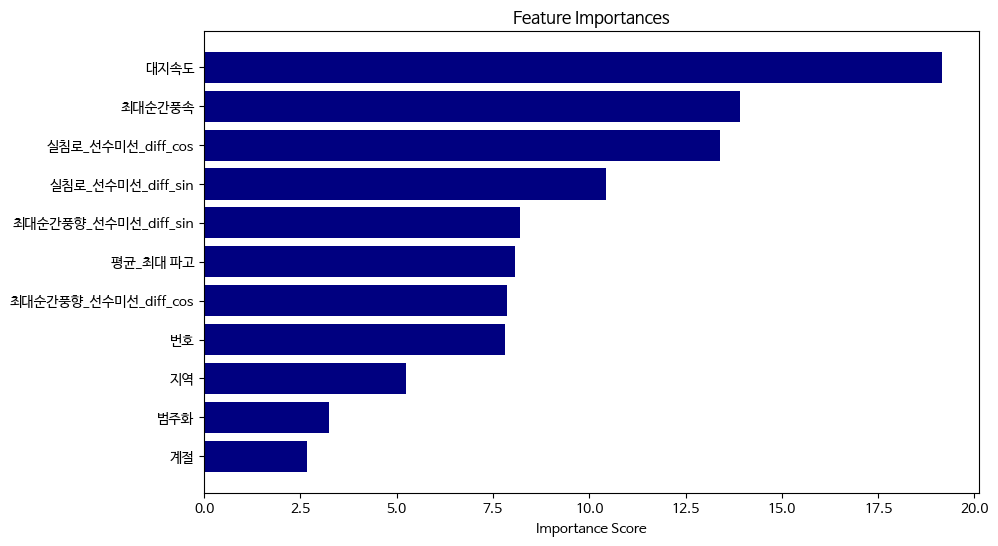

In [174]:
import matplotlib.pyplot as plt

# 모델 훈련 후에
# ...

# 피처 중요도 계산
feature_importances = model.get_feature_importance()

# 피처 이름과 중요도 점수를 튜플로 묶고, 점수를 기준으로 내림차순 정렬
importances = sorted(zip(feature_importances, X_train.columns), reverse=True)

# 피처 이름과 중요도를 별도의 리스트로 분리
scores, names = zip(*importances)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(names, scores, color='navy')
plt.xlabel('Importance Score')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # y축의 순서를 반전하여 가장 중요한 피처가 위쪽에 오도록 함
plt.show()


## LGBM

In [205]:
X = train_data.drop('target', axis=1)
y = train_data['target']

In [209]:
X['지역'] = X['지역'].astype(float)
X['번호'] = X['번호'].astype(float)
X['범주화'] = X['범주화'].astype(float)
X['계절'] = X['계절'].astype(float)


In [210]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix

# 분류 모델 설정
model = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.1
)

# 훈련 세트와 검증 세트로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X ,y, test_size=0.2, random_state=42)

# 모델 훈련
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=100, verbose=200)

# 검증 세트에 대한 예측
y_pred_valid = model.predict(X_valid)

# CSI 점수 계산
tp = ((y_pred_valid == 1) & (y_valid == 1)).sum()
tn = ((y_pred_valid == 0) & (y_valid == 0)).sum()
fp = ((y_pred_valid == 1) & (y_valid == 0)).sum()
fn = ((y_pred_valid == 0) & (y_valid == 1)).sum()

csi_score = tp / (tp + fn + fp)
print("CSI Score:", csi_score)


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


CSI Score: 0.09876543209876543


In [211]:
train_data

,지역,번호,target,대지속도,범주화,계절,평균_최대 파고,최대순간풍속,실침로_선수미선_diff_sin,실침로_선수미선_diff_cos,최대순간풍향_선수미선_diff_sin,최대순간풍향_선수미선_diff_cos
0,0,1,1,0.1,13,1,0.8,5.55,-0.998240,0.059306,-0.139173,-0.990268
1,0,1,0,0.3,12,1,0.6,7.55,0.741976,0.670427,0.414693,-0.909961
2,0,1,0,0.1,12,1,0.6,7.55,0.069756,0.997564,0.414693,-0.909961
3,0,1,0,0.2,12,1,0.6,7.55,-0.252069,-0.967709,0.414693,-0.909961
4,0,1,0,0.1,12,1,0.6,7.55,0.166769,-0.985996,0.414693,-0.909961
...,...,...,...,...,...,...,...,...,...,...,...,...
676562,1,127,0,0.1,0,1,1.0,7.75,0.930418,0.366501,0.515038,-0.857167
676563,1,127,0,0.0,0,1,1.0,7.75,0.353475,0.935444,0.406737,-0.913545
676564,1,127,0,0.3,0,1,1.0,7.75,-0.617036,-0.786935,0.484810,-0.874620
676565,1,127,0,0.2,0,1,1.0,7.75,-0.297375,0.954761,0.656059,-0.754710


In [212]:
# 'target' 열에 따라 그룹화하고, '대지속도' 열의 평균을 계산
mean_ground_speed_by_target = train_data.groupby('target')['대지속도'].mean()

# 결과 출력
print(mean_ground_speed_by_target)


target
0    0.252809
1    0.426000
Name: 대지속도, dtype: float64


In [213]:
# 'target' 열에 따라 그룹화하고, '대지속도' 열의 평균을 계산
mean_ground_speed_by_target = train_data.groupby('target')['최대순간풍속'].mean()

# 결과 출력
print(mean_ground_speed_by_target)

target
0     6.430029
1    10.990000
Name: 최대순간풍속, dtype: float64
